In [7]:
#source('functions.R')
source('utils_preprocess.R')




MYLIBRARIES<-c("outliers",
               "corrplot",
               "MASS",
               "formattable",
               "stats",
               "caret",
               "PerformanceAnalytics",
               "smotefamily",
               "tidyverse",
               #"ElemStatLearn",
               #"imputation",
               "naivebayes",
               'dplyr',
               "stringr",
               "partykit",
               "C50",
               "randomForest",
               "keras"
               #"h2o"
               #'ggplot2'
               #"KODAMA"
              )
#install.packages("KODAMA")
#install.packages('lattice')
#install.packages('caret')
#install.packages('e1071')
install.packages('pacman')
#install.packages('ggplot')
# library(dplyr) # for transforming to tibble object
# library(caret)
#library(e1071)

# ************************************************
# This is where R starts execution

# Automatically release memory
gc()

# Tries to clear plots and other graphics in RStudio output
if(!is.null(dev.list())) dev.off()
graphics.off()

# This clears all warning messages
#assign("last.warning", NULL, envir = baseenv())

# clears the RStudio console area
cat("\014")

# If library not already on your computer this will download and
# install the library. Each library is activated.
library(pacman)
pacman::p_load(char=MYLIBRARIES,install=TRUE,character.only=TRUE)
library(dplyr) # for transforming to tibble object
library(caret)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,654440,35.0,1340632,71.6,1340632,71.6
Vcells,1289715,9.9,8388608,64.0,4601408,35.2


null device 
          1

## ***conda install -c r r-tidyverse***

# Data  Understanding

## Load a passenger satisfaction dataset 

### Load 2 version of a Airline passenger satisfaction dataset

In this project we will be using 2 version of datset to analyse the passenger satisfaction to the airline.
Starting from combinding both version together.

 

In [9]:
dataset1<-NreadDataset('./dataset/satisfaction.csv')
dataset2<-NreadDataset('./dataset/satisfaction_2015.csv')

[1] "CSV dataset ./dataset/satisfaction.csv has been read. Records= 129880"
[1] "CSV dataset ./dataset/satisfaction_2015.csv has been read. Records= 129880"




### Check the similar field in both dataset 

Before merging both datasets together, It is necessary for both dataset to have same number of columns with the same name and attribute.


In [10]:
# remove ID field which index is at 1 (-1 will remove index at position 1 )
dataset1 = dataset1[, -which(names(dataset1) %in% c('id'))]
dataset2 = dataset2[, -which(names(dataset2) %in% c('id'))]

print(paste("Names of Similar fields : ",names(dataset1[,(names(dataset1) %in% names(dataset2))])))

 [1] "Names of Similar fields :  satisfactionv2"                
 [2] "Names of Similar fields :  Gender"                        
 [3] "Names of Similar fields :  CustomerType"                  
 [4] "Names of Similar fields :  Age"                           
 [5] "Names of Similar fields :  TypeofTravel"                  
 [6] "Names of Similar fields :  Class"                         
 [7] "Names of Similar fields :  FlightDistance"                
 [8] "Names of Similar fields :  Seatcomfort"                   
 [9] "Names of Similar fields :  DepartureArrivaltimeconvenient"
[10] "Names of Similar fields :  Foodanddrink"                  
[11] "Names of Similar fields :  Gatelocation"                  
[12] "Names of Similar fields :  Inflightwifiservice"           
[13] "Names of Similar fields :  Inflightentertainment"         
[14] "Names of Similar fields :  EaseofOnlinebooking"           
[15] "Names of Similar fields :  Onboardservice"                
[16] "Names of Similar fi

### Check different in both Dataframe



In [11]:
# Field that dataset 1 have but dataset 2 doesnt have
diff1<-names(dataset1)[-which(names(dataset1) %in% names(dataset2))]

# Field that dataset 2 have but dataset 1 doesnt have 
diff2<-names(dataset2)[-which(names(dataset2) %in% names(dataset1))]
differ <-c(diff1,diff2)
print(paste("Name of different fields : ",differ))

[1] "Name of different fields :  Onlinesupport"  
[2] "Name of different fields :  Inflightservice"


We can see that both of version of dataset contains 1 different fields each that are ***('Onlinesupport')*** and ***('Inflightservice')*** and other remaining 22 fields are simlar to each others with the same name and attributes.


### Field a different with NA and combine both dataset

Since both dataset different columns, we decide to fill a NA values to a columns in a does not exist in each dataset. So that both dataset have same number of columns and be able to merge.

In [12]:
dataset1[setdiff(names(dataset2), names(dataset1))] <- NA
dataset2[setdiff(names(dataset1), names(dataset2))] <- NA
# combine both tables
combined<-rbind(dataset1, dataset2)
# Visualize combined dataset
print(paste("Number of columns after combined: ", ncol(combined)))
print(paste("Number of rows after combined: ",nrow(combined)))
head(combined)

[1] "Number of columns after combined:  24"
[1] "Number of rows after combined:  259760"


,satisfactionv2,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Seatcomfort,DepartureArrivaltimeconvenient,Foodanddrink,⋯,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding,DepartureDelayinMinutes,ArrivalDelayinMinutes,Inflightservice
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,⋯,3,3,0,3,5,3,2,0,0,NA
2,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,⋯,3,4,4,4,2,3,2,310,305,NA
3,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,⋯,2,3,3,4,4,4,2,0,0,NA
4,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,⋯,1,1,0,1,4,1,3,0,0,NA
5,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,⋯,2,2,0,2,4,2,5,0,0,NA
6,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,⋯,2,5,4,5,5,4,2,0,0,NA


After the dataset merged together, its contains 24 columns and 259760 rows.

# Data cleaning

Next step, we first visualize a summary of combined dataset to see the its details and statistic 

In [13]:
summary(combined)

 satisfactionv2        Gender          CustomerType            Age       
 Length:259760      Length:259760      Length:259760      Min.   : 7.00  
 Class :character   Class :character   Class :character   1st Qu.:27.00  
 Mode  :character   Mode  :character   Mode  :character   Median :40.00  
                                                          Mean   :39.43  
                                                          3rd Qu.:51.00  
                                                          Max.   :85.00  
                                                                         
 TypeofTravel          Class           FlightDistance  Seatcomfort  
 Length:259760      Length:259760      Min.   :  31   Min.   :0.00  
 Class :character   Class :character   1st Qu.: 606   1st Qu.:2.00  
 Mode  :character   Mode  :character   Median :1510   Median :3.00  
                                       Mean   :1586   Mean   :3.14  
                                       3rd Qu.:2297   3rd Qu.:4

After look in through a details of dataset we can see that three columns have a missing values, that are ***('ArrivalDelayinMinutes'), ('Onlinesupport') and ('Inflight')***. The missing values in ***('Onlinesupport')*** and ***('Inflightservice')*** are value that was filled because these two fields were a field that each dataset uniquely has. The amount of missing value in both of these field are 129880 rows which is 50 % of totak number of rows. We decide not filling a missing value by imputation process nor taking mean or meadian of each columns and remove both of these field. Since the number of missing value is 50 % of dataset the value fill might be inaccurate. But for field ***('ArrivalDelayMinutes')***, the missing value were filling by using median value in that field


In [14]:
#remove colums which field which have more that 50 % is NA value. Inflightservice and Onlinesupport

rm_combined<-combined[, -which(names(combined) %in% c('Inflightservice','Onlinesupport'))]

# Filling a Null value with median value of that field which is 0
# the reseason of choosing median over mean of the field to prevent a chance of creating new outlier
rm_combined$ArrivalDelayinMinutes[is.na(rm_combined$ArrivalDelayinMinutes)] <- 0 

In [15]:
summary(rm_combined)

 satisfactionv2        Gender          CustomerType            Age       
 Length:259760      Length:259760      Length:259760      Min.   : 7.00  
 Class :character   Class :character   Class :character   1st Qu.:27.00  
 Mode  :character   Mode  :character   Mode  :character   Median :40.00  
                                                          Mean   :39.43  
                                                          3rd Qu.:51.00  
                                                          Max.   :85.00  
 TypeofTravel          Class           FlightDistance  Seatcomfort  
 Length:259760      Length:259760      Min.   :  31   Min.   :0.00  
 Class :character   Class :character   1st Qu.: 606   1st Qu.:2.00  
 Mode  :character   Mode  :character   Median :1510   Median :3.00  
                                       Mean   :1586   Mean   :3.14  
                                       3rd Qu.:2297   3rd Qu.:4.00  
                                       Max.   :6951   Max.   :5.00  

In [16]:
dataset<-rm_combined

### Display Summary of dataset
Checking a type of each fields (numeric or symbolic) and also checking for missing value

In [17]:
# displat summary of dataset 
summary(dataset)

 satisfactionv2        Gender          CustomerType            Age       
 Length:259760      Length:259760      Length:259760      Min.   : 7.00  
 Class :character   Class :character   Class :character   1st Qu.:27.00  
 Mode  :character   Mode  :character   Mode  :character   Median :40.00  
                                                          Mean   :39.43  
                                                          3rd Qu.:51.00  
                                                          Max.   :85.00  
 TypeofTravel          Class           FlightDistance  Seatcomfort  
 Length:259760      Length:259760      Min.   :  31   Min.   :0.00  
 Class :character   Class :character   1st Qu.: 606   1st Qu.:2.00  
 Mode  :character   Mode  :character   Median :1510   Median :3.00  
                                       Mean   :1586   Mean   :3.14  
                                       3rd Qu.:2297   3rd Qu.:4.00  
                                       Max.   :6951   Max.   :5.00  

In [18]:
# Visualize a summary with different function
prettydataset<-NPREPROCESSING_prettyDataset(dataset)
prettydataset

HTML widgets cannot be represented in plain text (need html)

In [19]:
# assigning a field type to each fields in Dataset

TYPE_DISCRETE     <- "DISCRETE"           # field is discrete (numeric)
TYPE_ORDINAL      <- "ORDINAL"            # field is continuous numeric
TYPE_SYMBOLIC     <- "SYMBOLIC"           # field is a string
TYPE_NUMERIC      <- "NUMERIC"            # field is initially a numeric
TYPE_IGNORE       <- "IGNORE"             # field is not encoded

# This function will differentiate between Numeric and Symbolic
field_types<-NPREPROCESSING_initialFieldType(dataset)

In [20]:
# Total number of fields
print(paste('Total columns ',ncol(dataset)))
# index of numeric fields
numeric_index<-field_types=="NUMERIC"
# index of symbolic fields
symbolic_index<-field_types=="SYMBOLIC"
# names of colums that are numeric
numeric_fields<-names(dataset[,numeric_index])
# names of colums that are symbolic 
symbolic_fields<-names(dataset[,symbolic_index])
print("**************************************************")
print(paste("Numeric Fields : ", length(numeric_fields)))
print(numeric_fields)
print("**************************************************")
print(paste("Symbolic Fields :", length(symbolic_fields)))
print(symbolic_fields)
print("**************************************************")

###############################################################################################################

print(paste("Type of attribute in Numeric Fields"))

# Statisfaction Scale Fields
sat_cols<- c("Inflightwifiservice" ,"DepartureArrivaltimeconvenient",
            "EaseofOnlinebooking","Gatelocation","Foodanddrink",
            "Onlineboarding","Seatcomfort","Inflightentertainment",
            "Onboardservice","Legroomservice","Baggagehandling",
            "Checkinservice","Cleanliness")
print(paste("Satisfy scale Fields : ",length(sat_cols)))

print(sat_cols)
print("**************************************************")
# Other numeric fields that is not satisfaction scale fields
pure_numerical_val<-c('Age', 'FlightDistance', 'DepartureDelayinMinutes','ArrivalDelayinMinutes')
time_field<-c('DepartureDelayinMinutes','ArrivalDelayinMinutes')
distance_field<-c('FlightDistance')
print(paste("others numercial Fields : ",length(pure_numerical_val)))

print(pure_numerical_val)

[1] "Total columns  22"
[1] "**************************************************"
[1] "Numeric Fields :  17"
 [1] "Age"                            "FlightDistance"                
 [3] "Seatcomfort"                    "DepartureArrivaltimeconvenient"
 [5] "Foodanddrink"                   "Gatelocation"                  
 [7] "Inflightwifiservice"            "Inflightentertainment"         
 [9] "EaseofOnlinebooking"            "Onboardservice"                
[11] "Legroomservice"                 "Baggagehandling"               
[13] "Checkinservice"                 "Cleanliness"                   
[15] "Onlineboarding"                 "DepartureDelayinMinutes"       
[17] "ArrivalDelayinMinutes"         
[1] "**************************************************"
[1] "Symbolic Fields : 5"
[1] "satisfactionv2" "Gender"         "CustomerType"   "TypeofTravel"  
[5] "Class"         
[1] "**************************************************"
[1] "Type of attribute in Numeric Fields"
[1] "Satisf

### This summary show that 5 fields in a dataset are symbolic and remaining are numeric

### Symbolic fields are :-

 ***Satifactionv2 , Gender, Customer , TypeofTravel and Class***

### Numeric fields are :-

***Age, FlightDistance, Seatcomfort, DepartureArrivaltimeconvenient, Foodanddrink, Gatelocation, Inflightwifiservice, Inflightentertainment, EaseofOnlinebooking, Onboardservice, Legroomservice, Baggagehandling, Checkinservice, Cleanliness, Onlineboarding, DepartureDelayinMinutes,  and ArrivalDelayinMinutes***

Where 13 numeric fields are the columns containing satifaction level provided from a customer from a scaling 0 to 5  and other 4 numeric field are age of customer , travel distance of a flight and last two fields are time delay in minute



# Data Analysis 


## Visualizing Numeric fields

### Visualizing a correlation of numeric fields

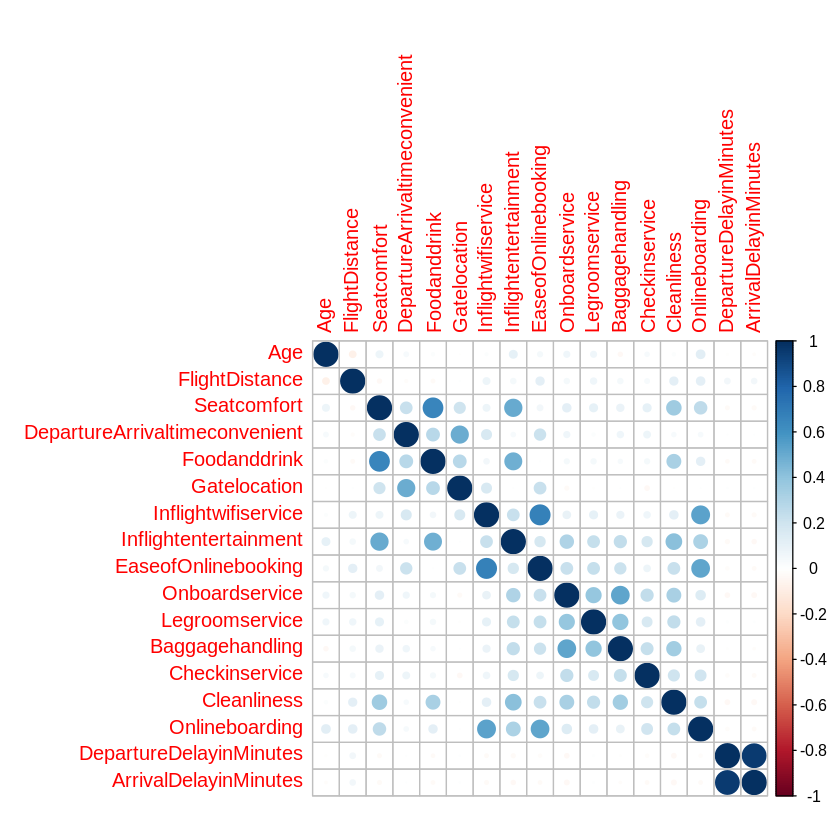

In [21]:
# Visualizing a correlation of numeric fields
library(corrplot)
correlations <- cor(dataset[,numeric_fields])
corrplot(cor(dataset[,numeric_fields]), method="circle")

### Visualzing a Box Plot of a fields containing statisfaction level

We can see that most of the fields containing statisfaction level have a good balance normal distribution but some still have a some outliers and also positive and negative skewing such in ***("Onboard service"), ("Baggehandling"), ("Checkinservice") and ("Cleanliness")***

Also, The satisfaction scale is rating between 0-5 but in Baggagehandling the range of value dataset contains in that field is 1-5

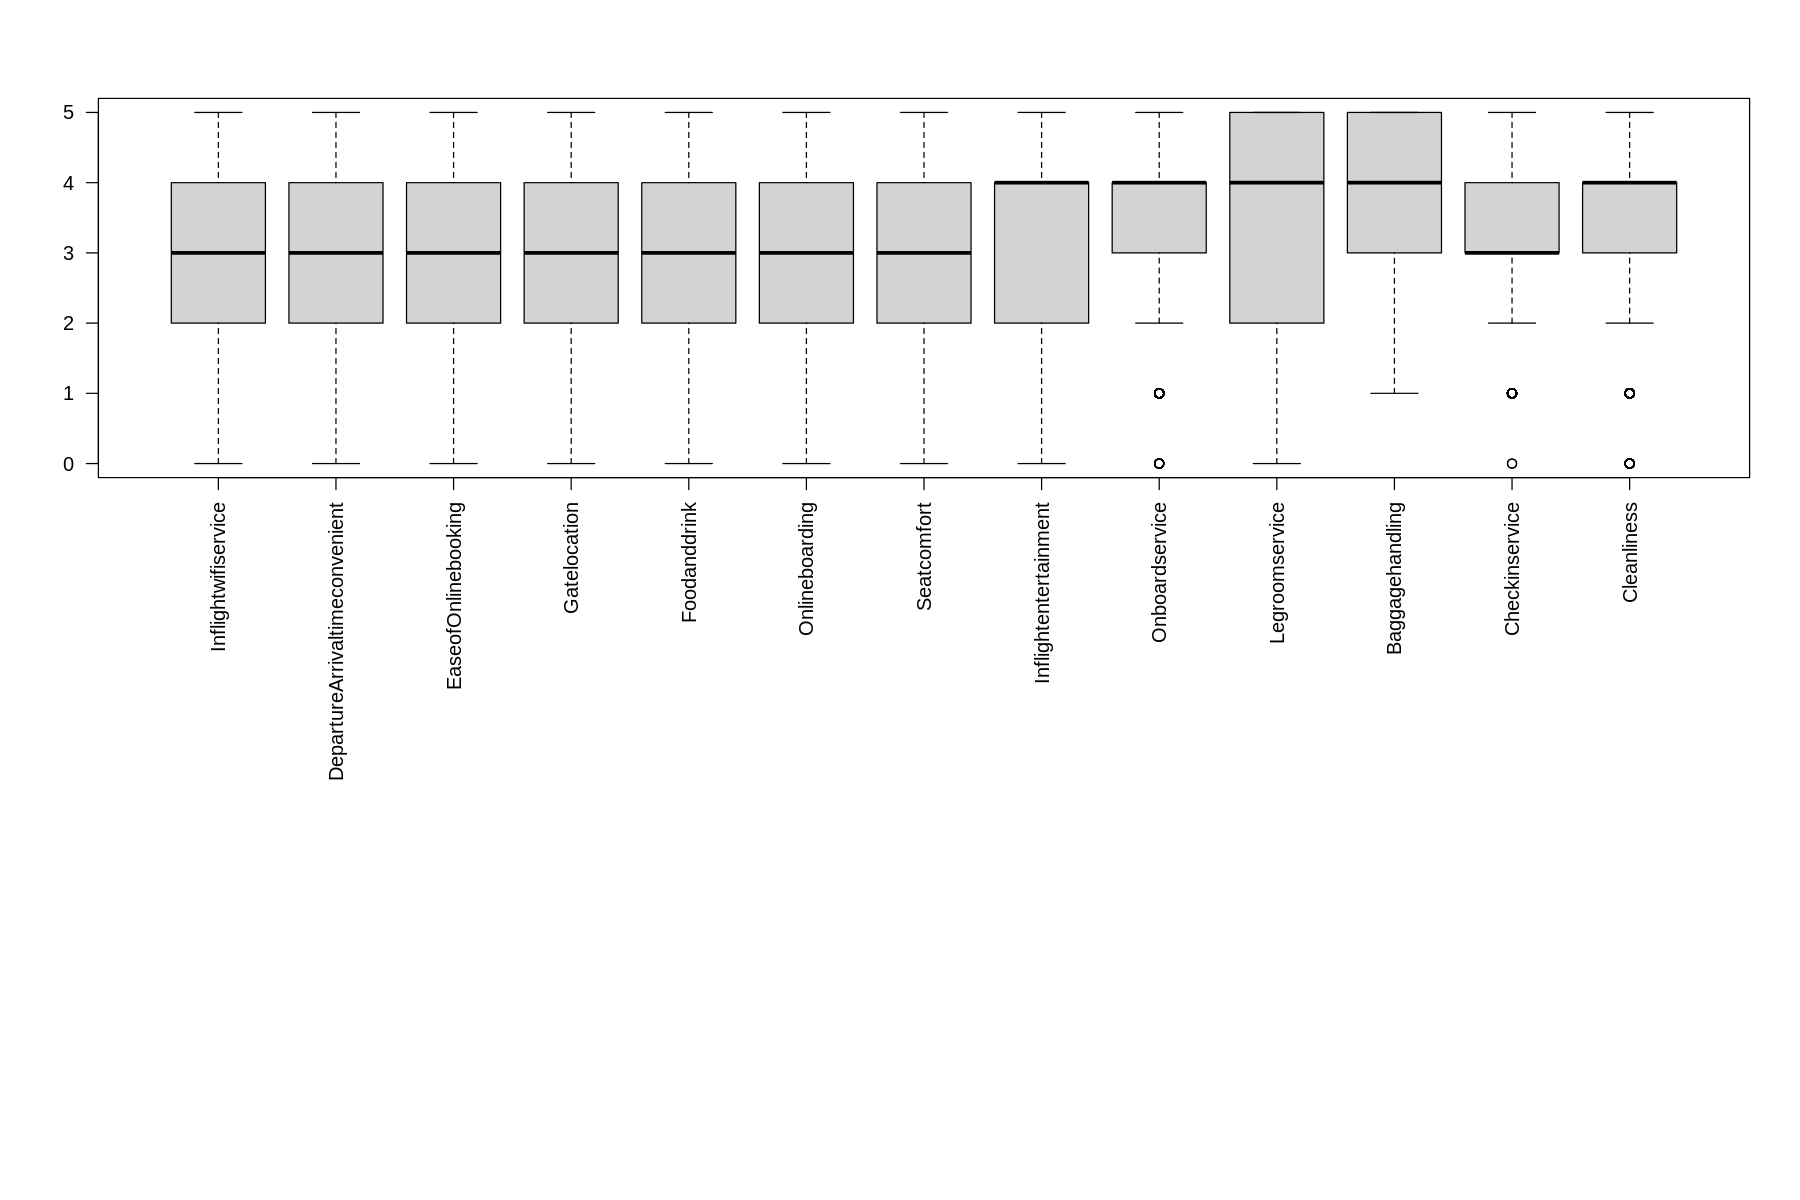

In [22]:
# Box plot
par(mfrow=c(2,1))
options(repr.plot.width = 15, repr.plot.height = 10)
# satisfaction data

satis_data<-dataset[,sat_cols]

boxplot(satis_data, las = 2)


### Visualizing a Historgram in in other numeric fields'

For visualizing other numeric fields, using Histogram are suitable for visualizing a distribution of data in those field.

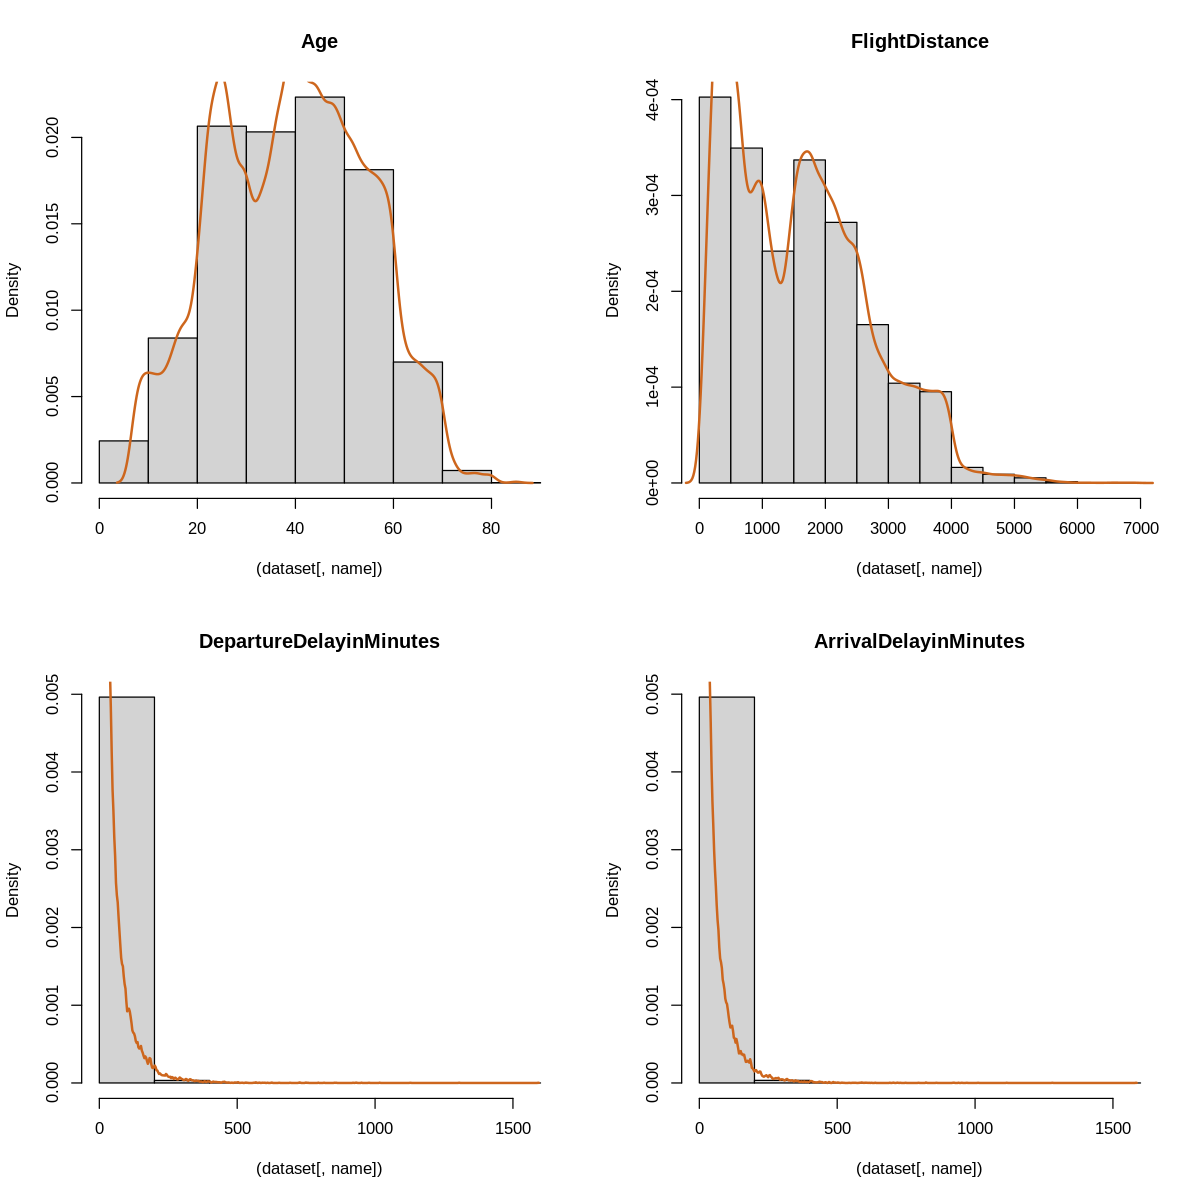

In [23]:
# Box plot
# satisfaction data

other_num<-dataset[,pure_numerical_val]

par(mfrow=c(2,2))
options(repr.plot.width = 10, repr.plot.height = 10)
for (name in pure_numerical_val){
    
    hist((dataset[,name]), main=name,breaks=10,prob=TRUE)
    lines(density(dataset[,name]),
      lwd = 2,
      col = "chocolate3")
}


Histrogram show that in columns ***('Age')*** has a perfect normal distribution where in ***('Flightdistance')*** the distribution of a data is skew to the left and have small number which means the frequency of a data  passenger short flight distance is more than longer flight distance. After looking through distibution of these columns, ***("Age")*** can be treat as ordinal value and use Linear normalization to normalize a value in a range of 0.0 to 1.0 in the processing part. 

For others 2 columns, the DepatureDelayinMinutes and ArrivalDelayinMinutes are clearly have distribution skew to the left and large value of outlier in a columns. Both of these need to be treat as a Discrete value and will be preprocess using one hot encoding.



## Visualize Symbolic Fields

### Use BarChart to display a distribution of each categories in each fields

Barchar is suitable for visualizing distribution of a symbolic fields. For example we can cleary visualize the number of a satisfy passenger and unsatisfy

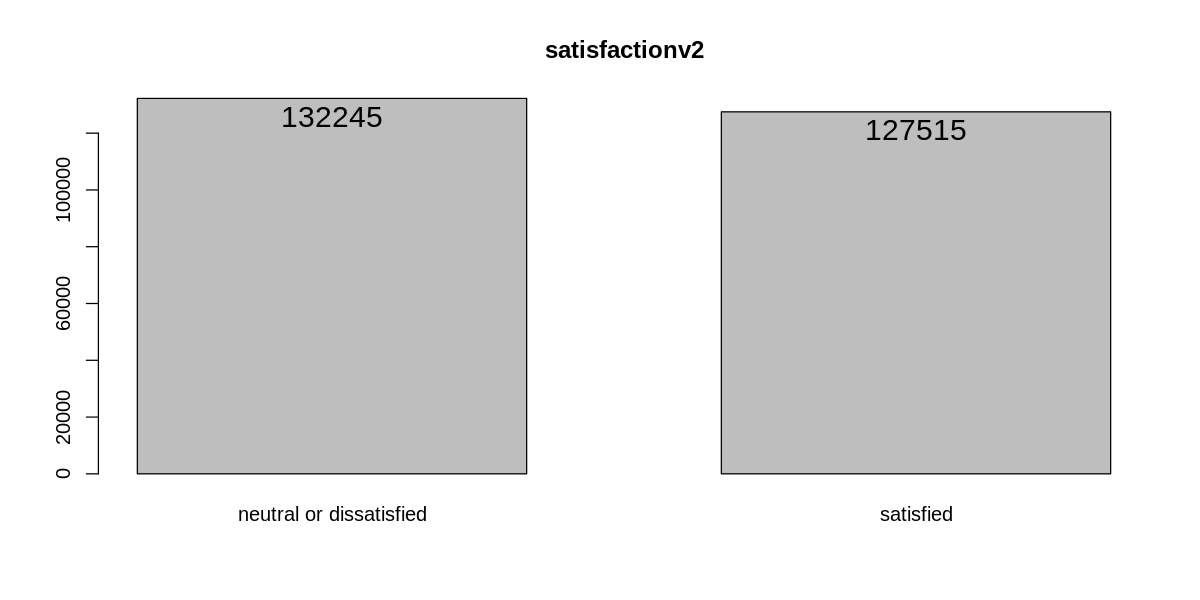

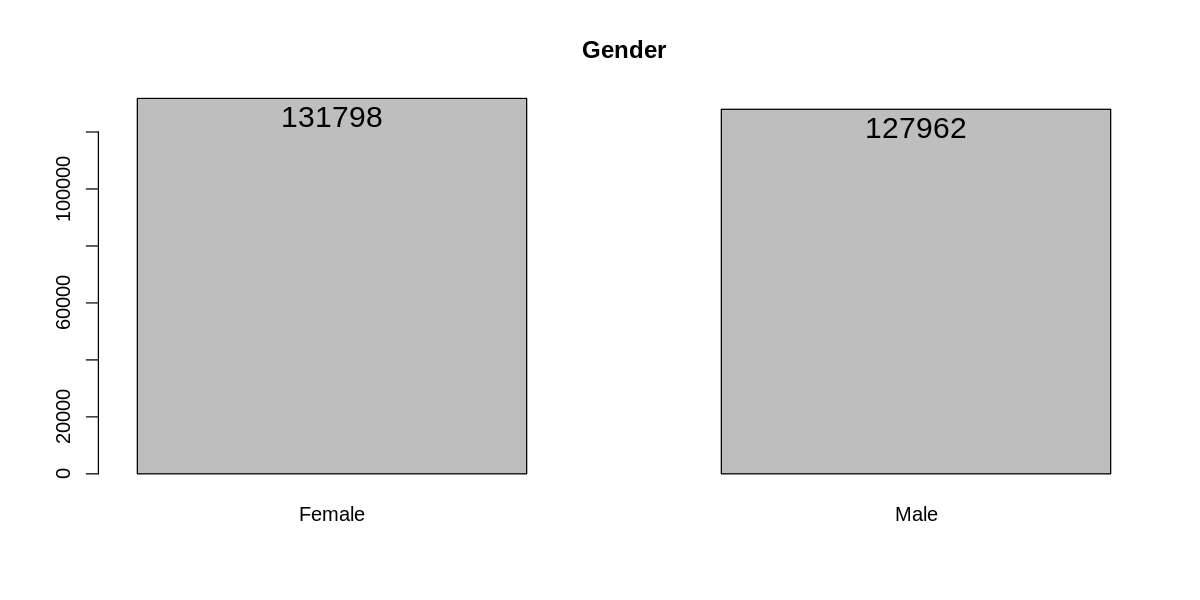

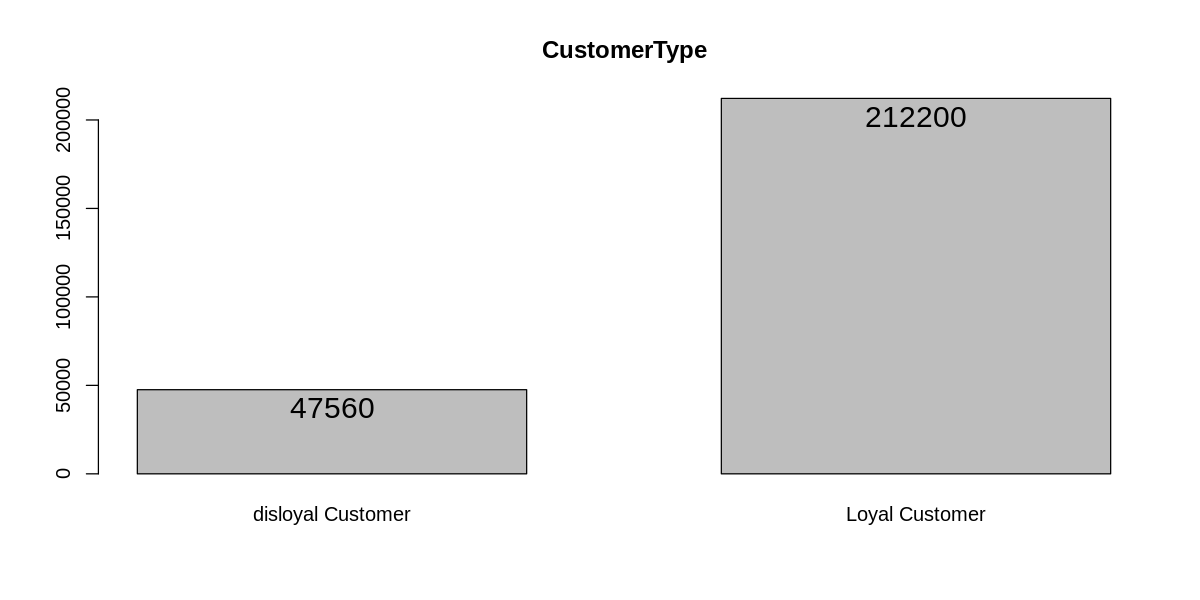

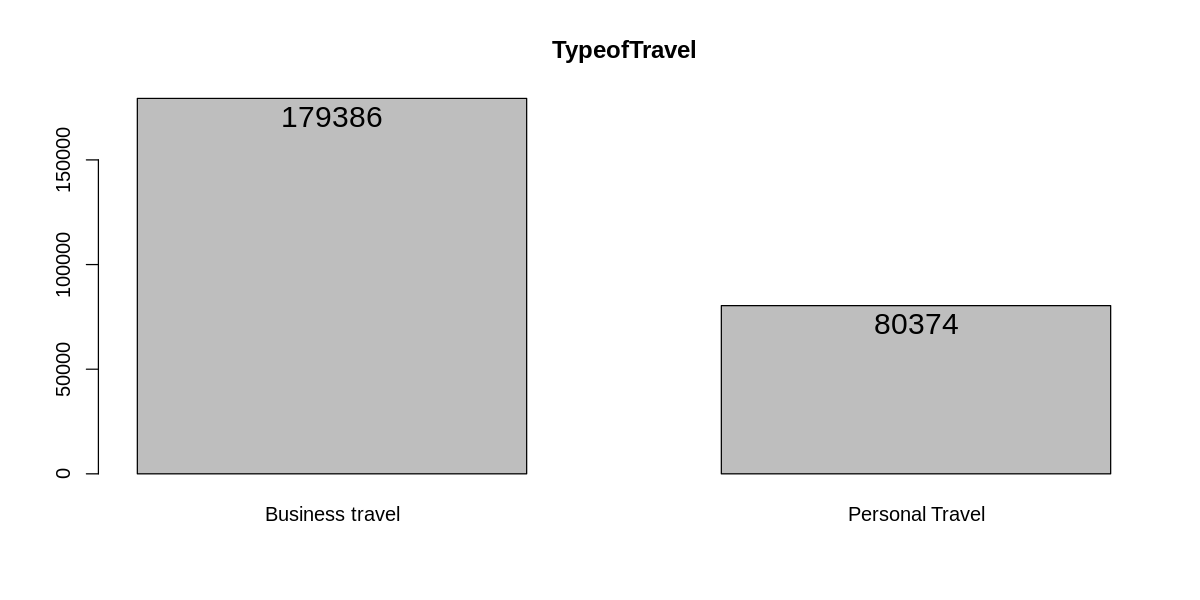

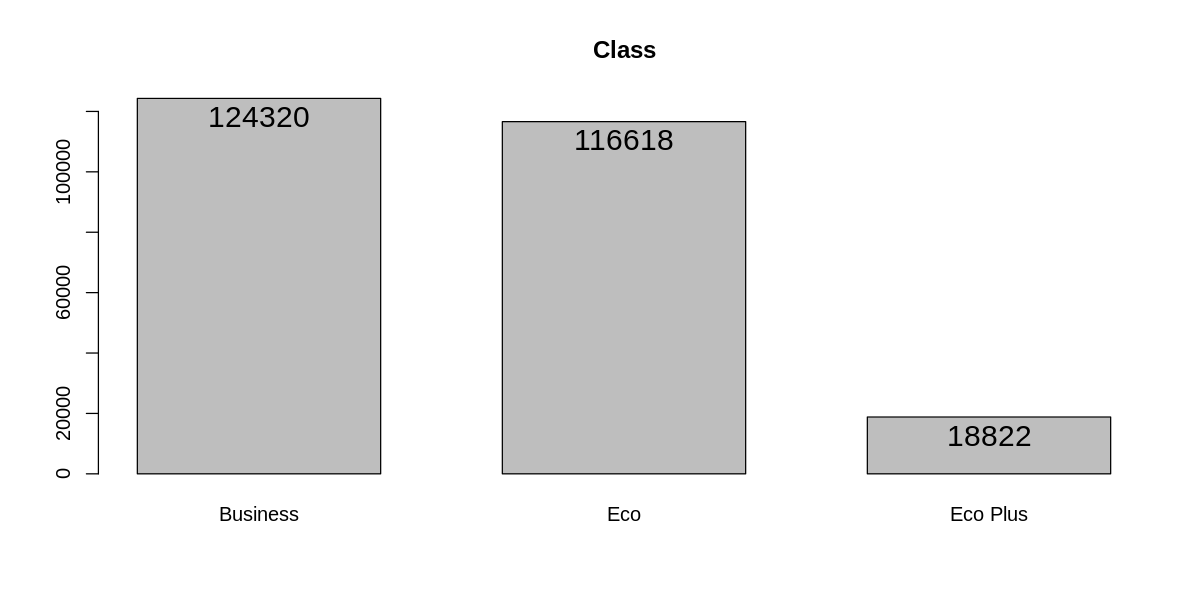

In [24]:
par(mfrow=c(1,1),pty = "m")
options(repr.plot.width = 10, repr.plot.height = 5)
for (name in symbolic_fields){
    counts <- table(dataset[,name])
    xx<-barplot(counts, main=name,space=0.5) 
    text(x = xx, y = counts, label = counts , pos = 1, cex = 1.5, col = "black")     
}



### Visualizing Relationship between a symbolic fields

Here we are using a barchart to visualize a relationship of satiscation fields on other symbolic fields.

                         Class
satisfactionv2            Business   Eco Eco Plus
  neutral or dissatisfied    37059 82702    12484
  satisfied                  87261 33916     6338

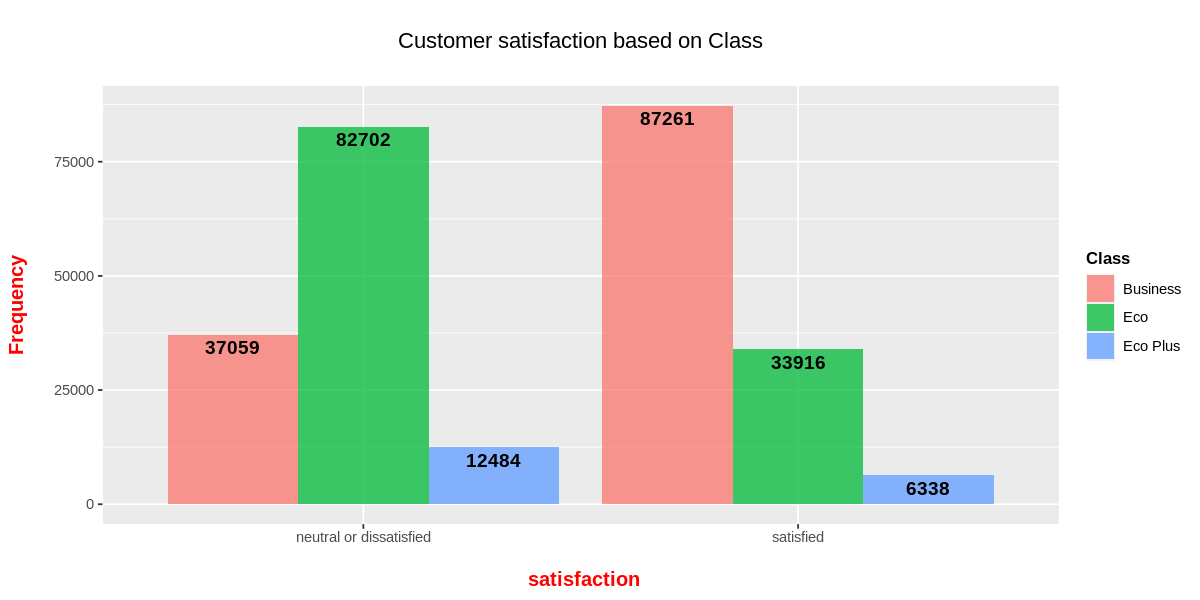

In [25]:
library("ggplot2")
sat_class = dataset[,c('satisfactionv2','Class')]
table(sat_class)
results <- data.frame(table(sat_class))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Class)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Class \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

                         Gender
satisfactionv2            Female  Male
  neutral or dissatisfied  60601 71644
  satisfied                71197 56318

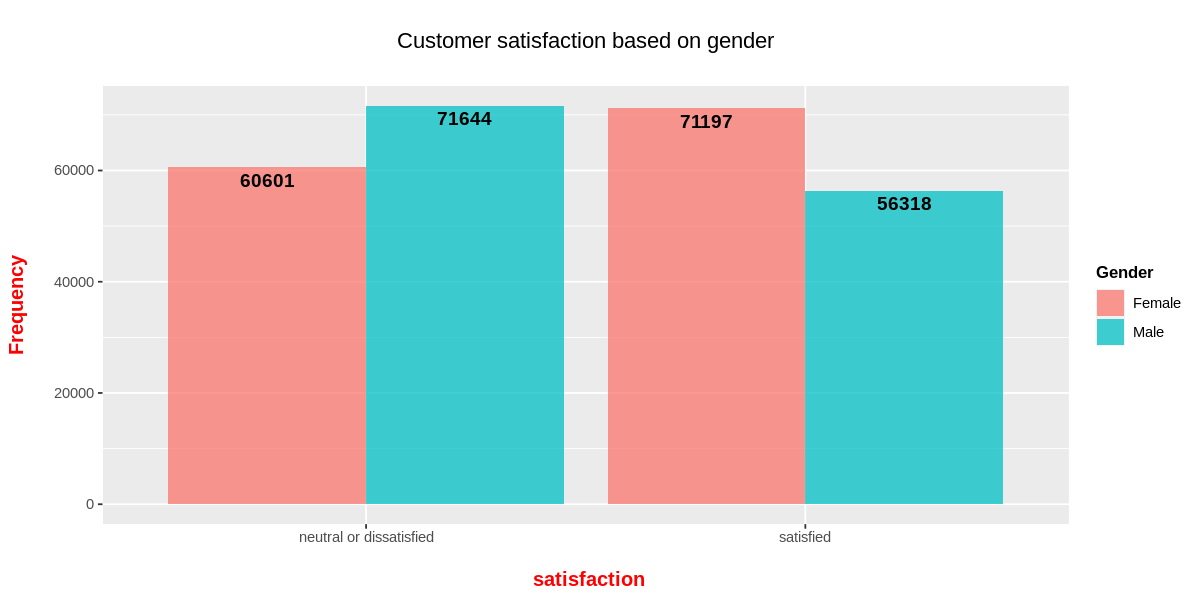

In [26]:
library("ggplot2")
sat_gender = dataset[,c('satisfactionv2','Gender')]
table(sat_gender)
results <- data.frame(table(sat_gender))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Gender)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on gender \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

                         CustomerType
satisfactionv2            disloyal Customer Loyal Customer
  neutral or dissatisfied             36160          96085
  satisfied                           11400         116115

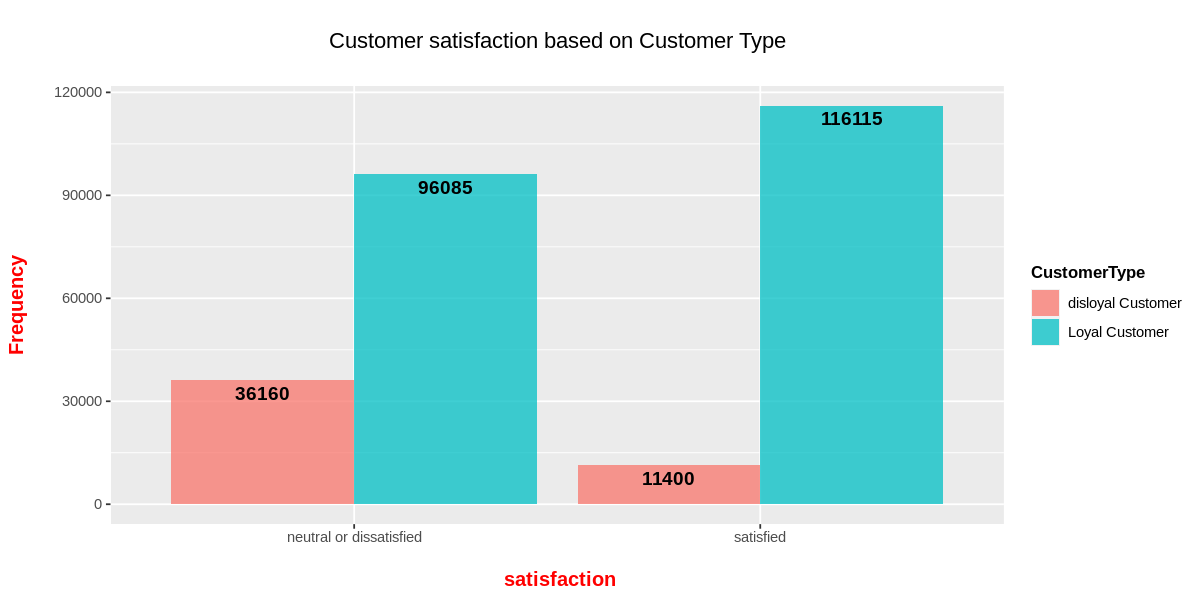

In [27]:

sat_type = dataset[,c('satisfactionv2','CustomerType')]
table(sat_type)
results <- data.frame(table(sat_type))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = CustomerType)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Customer Type \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

                         TypeofTravel
satisfactionv2            Business travel Personal Travel
  neutral or dissatisfied           74674           57571
  satisfied                        104712           22803

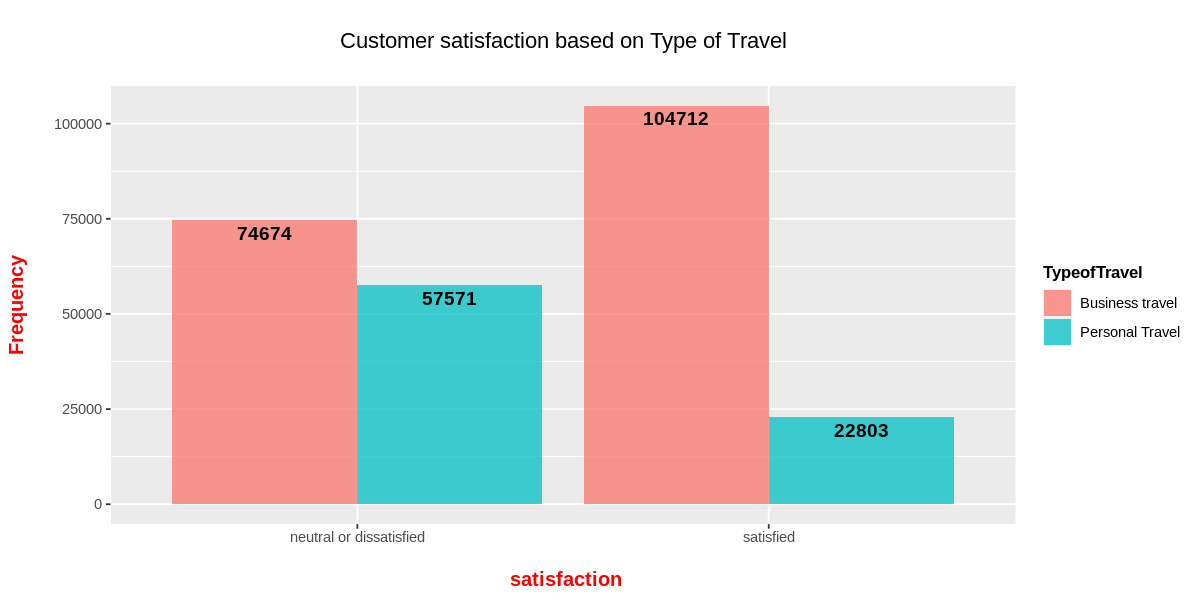

In [28]:
sat_type = dataset[,c('satisfactionv2','TypeofTravel')]
table(sat_type)
results <- data.frame(table(sat_type))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill =TypeofTravel)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Type of Travel \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

### Visualizing Relationship between a Cusomter Satisfaction fields with fields containing Satisfaction scale


Here again, we are using a barchart to visualize a relationship of satiscation fields with all a fields containing a rating of customer satisfaction in each categories.

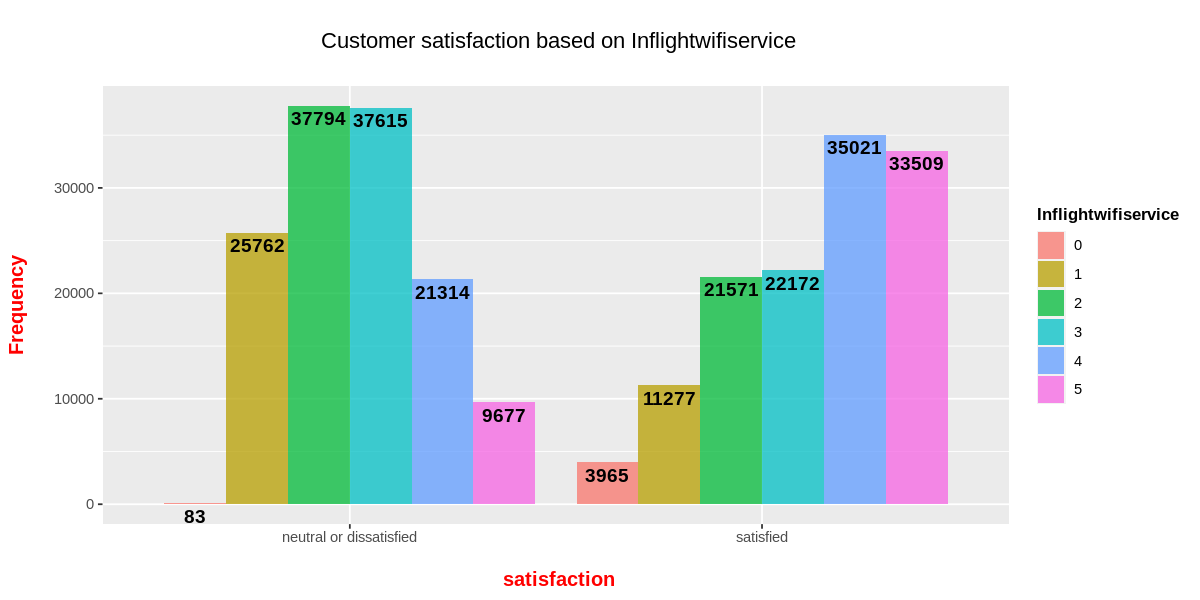

In [29]:

par(mfrow=c(2,4),pty = "m")
options(repr.plot.width = 10,epr.plot.height = 5)

temp_df<-cbind(dataset[,c('satisfactionv2','Inflightwifiservice')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill =Inflightwifiservice)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Inflightwifiservice\n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

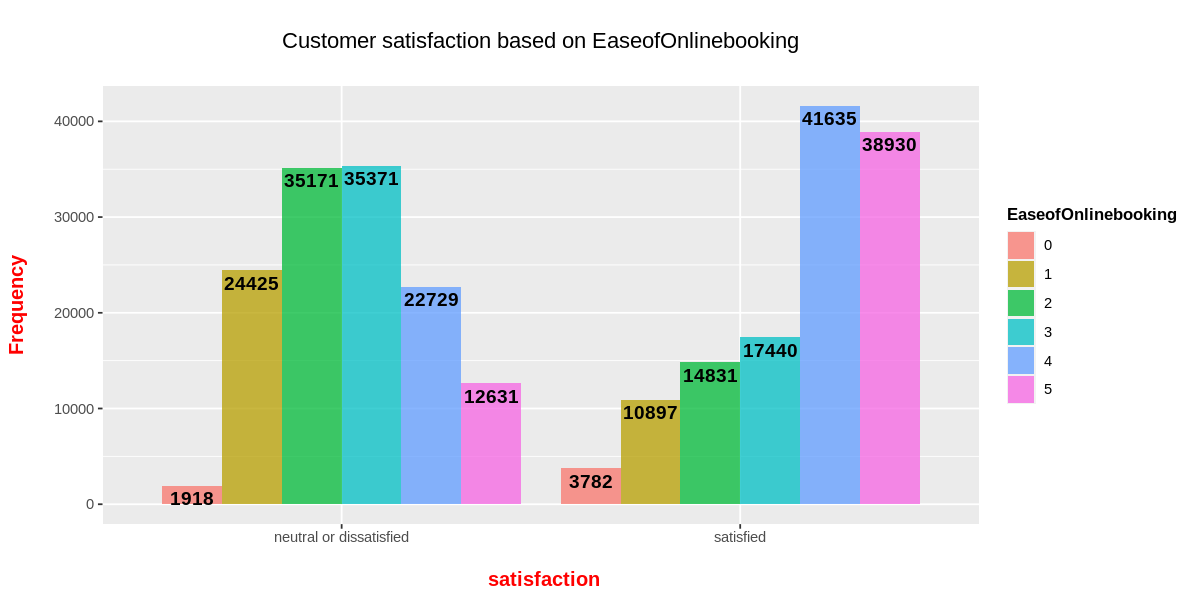

In [30]:
temp_df<-cbind(dataset[,c('satisfactionv2','EaseofOnlinebooking')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill =EaseofOnlinebooking)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on EaseofOnlinebooking \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

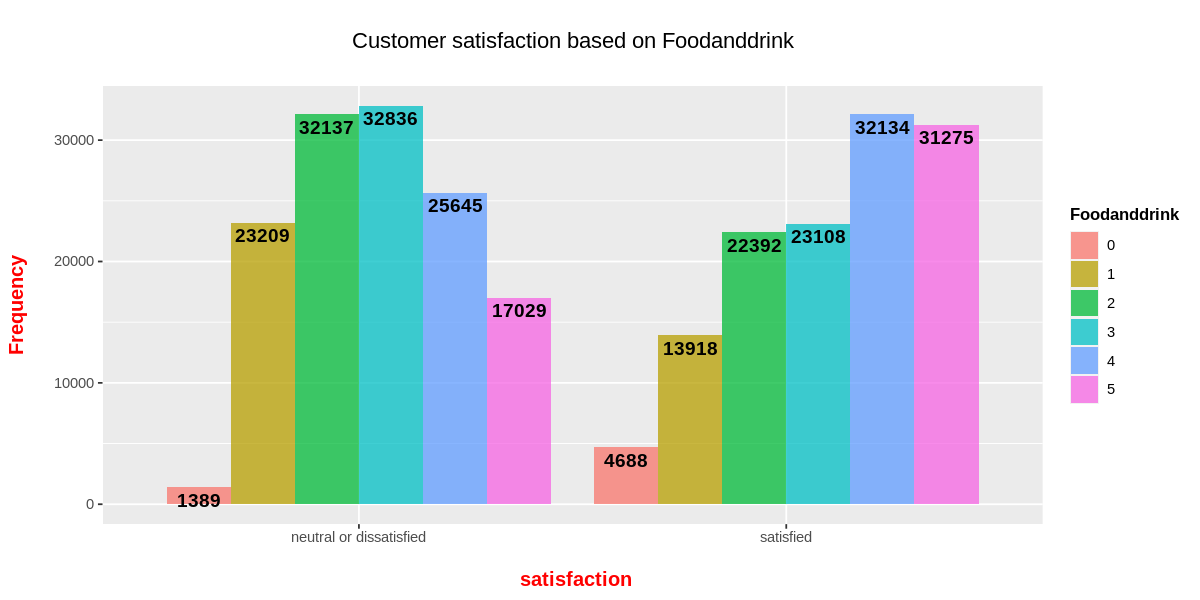

In [31]:
temp_df<-cbind(dataset[,c('satisfactionv2','Foodanddrink')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Foodanddrink)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Foodanddrink \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

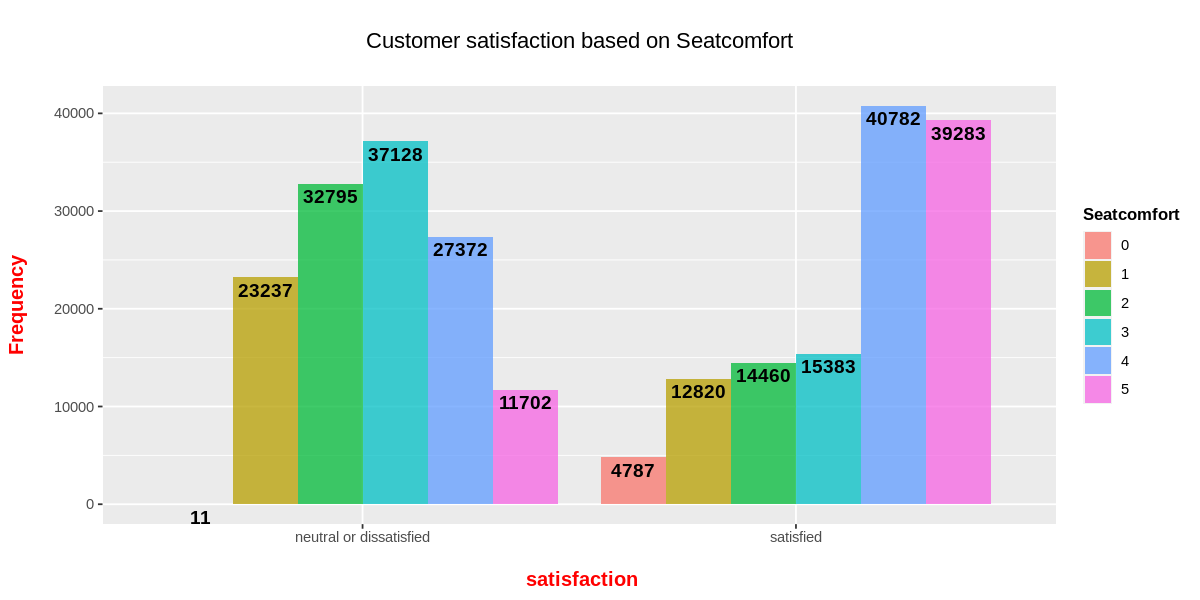

In [32]:
temp_df<-cbind(dataset[,c('satisfactionv2','Seatcomfort')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Seatcomfort)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Seatcomfort \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

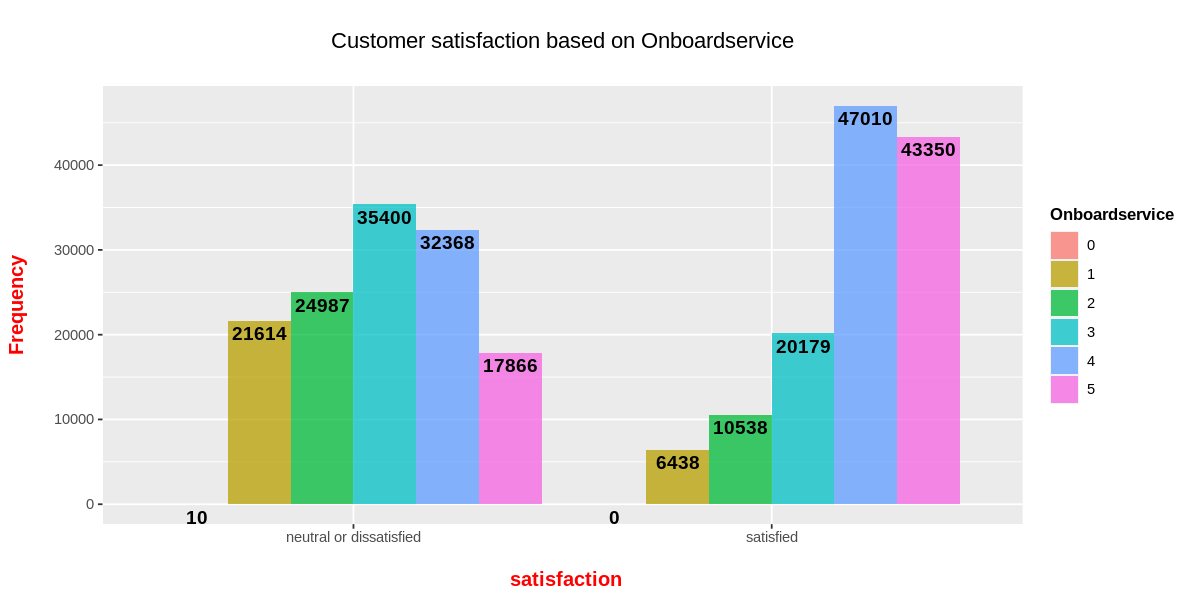

In [33]:
temp_df<-cbind(dataset[,c('satisfactionv2','Onboardservice')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Onboardservice)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Onboardservice \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

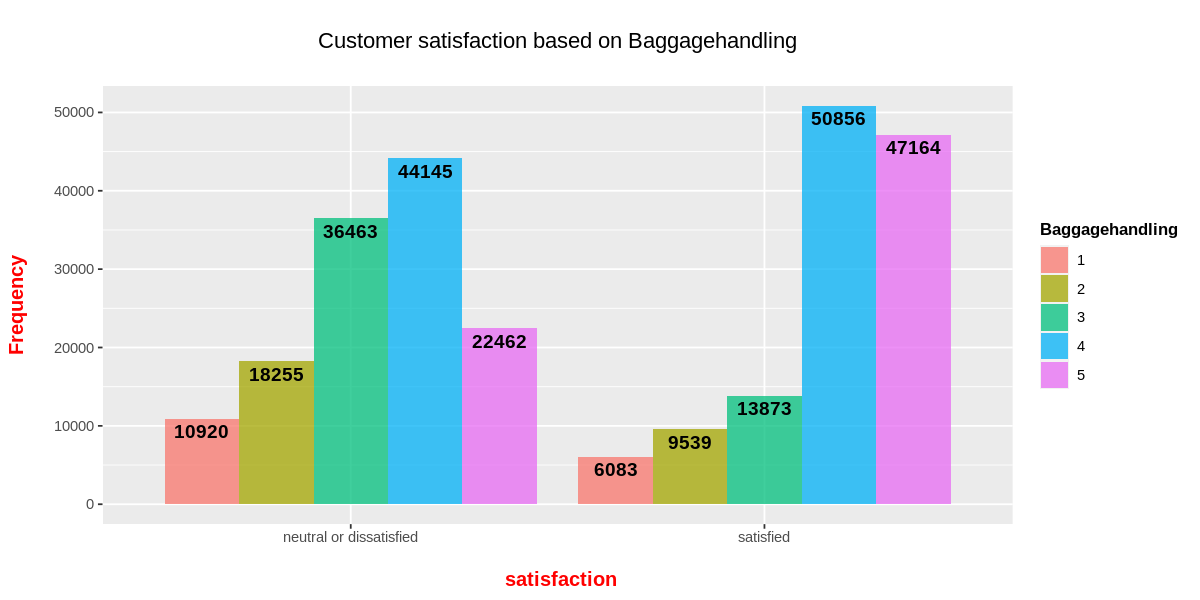

In [34]:
temp_df<-cbind(dataset[,c('satisfactionv2','Baggagehandling')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Baggagehandling)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Baggagehandling \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

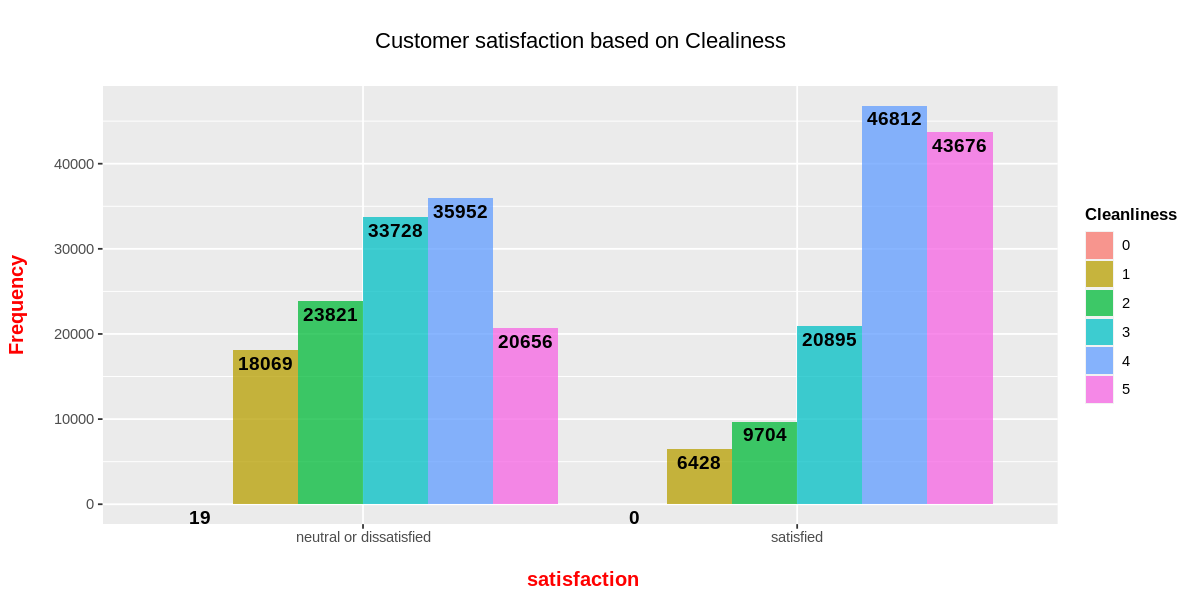

In [35]:
temp_df<-cbind(dataset[,c('satisfactionv2','Cleanliness')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Cleanliness)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Clealiness \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

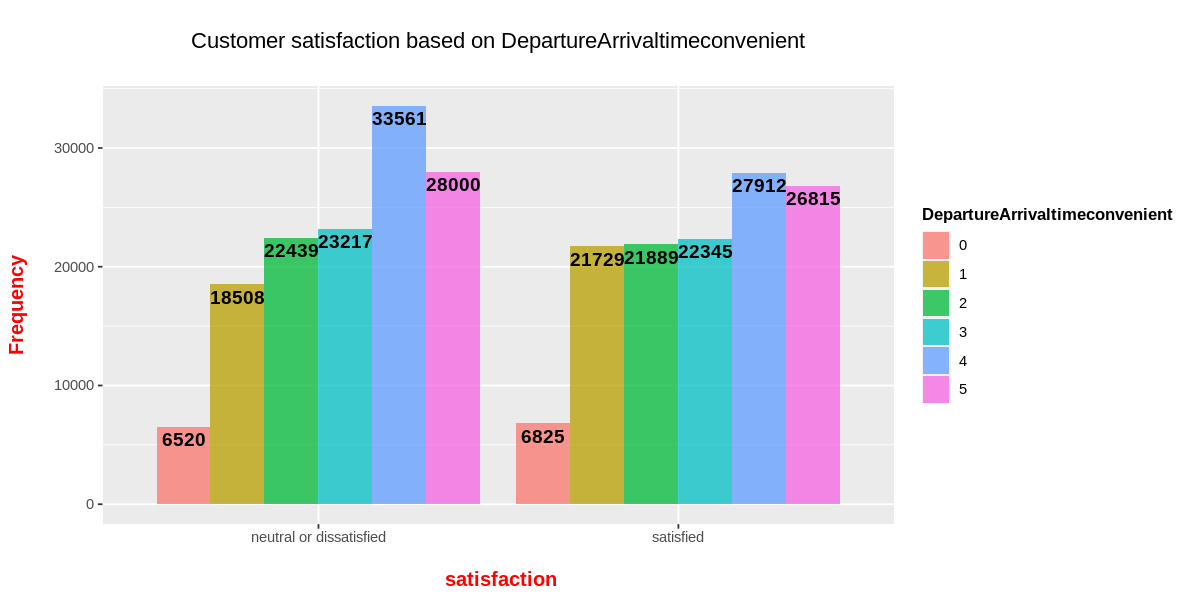

In [36]:
temp_df<-cbind(dataset[,c('satisfactionv2','DepartureArrivaltimeconvenient')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = DepartureArrivaltimeconvenient)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on DepartureArrivaltimeconvenient \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

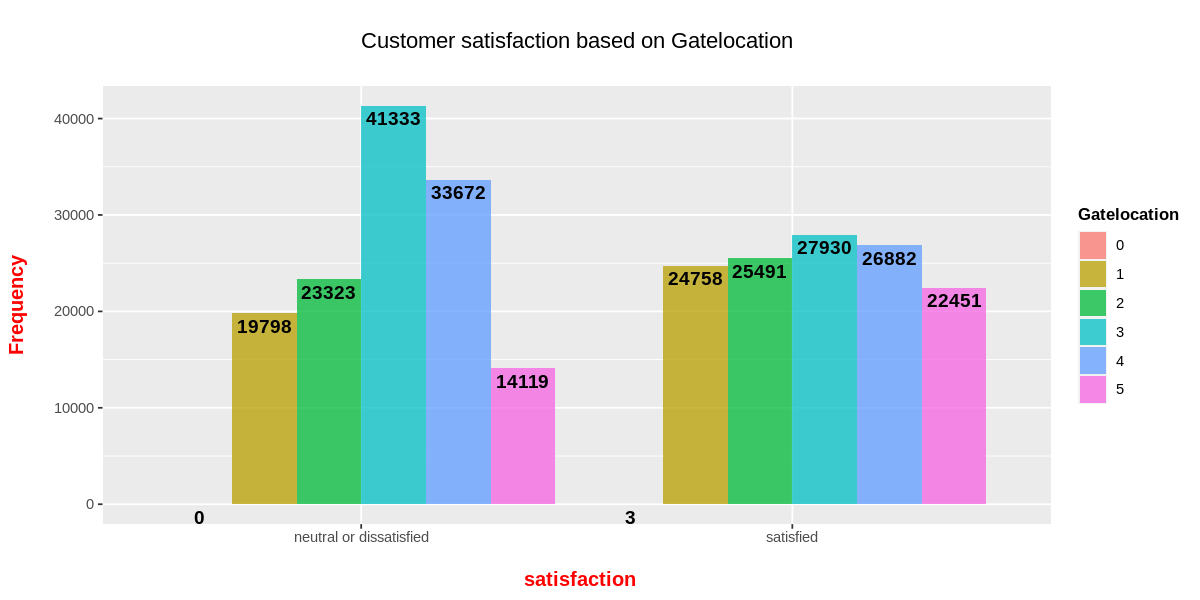

In [37]:
temp_df<-cbind(dataset[,c('satisfactionv2','Gatelocation')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Gatelocation)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Gatelocation \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

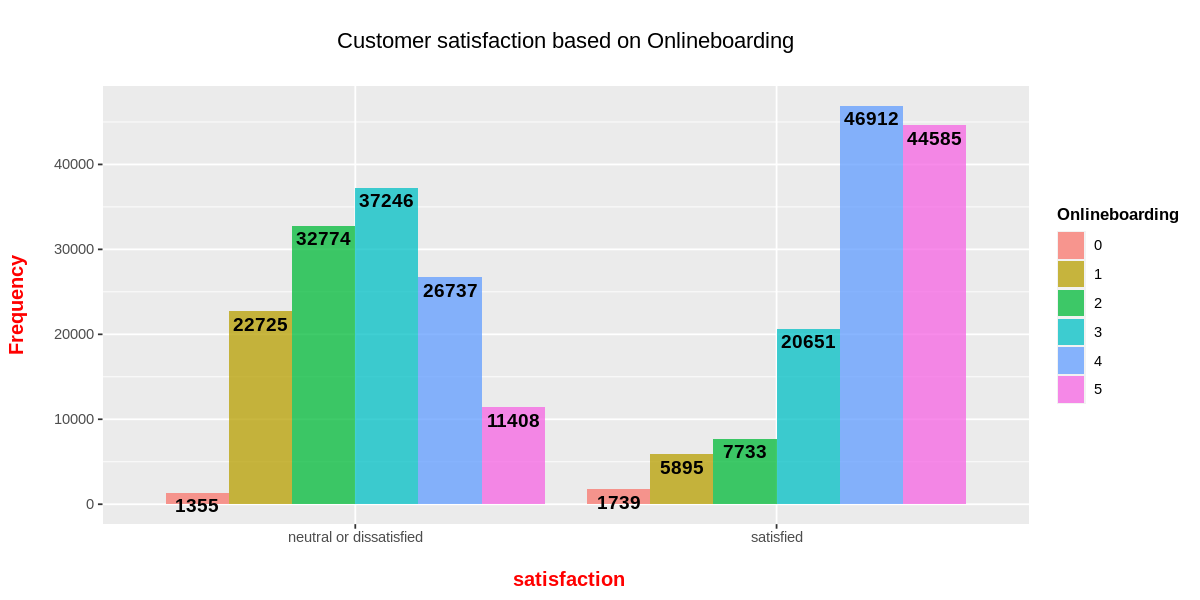

In [38]:
temp_df<-cbind(dataset[,c('satisfactionv2','Onlineboarding')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Onlineboarding)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Onlineboarding \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

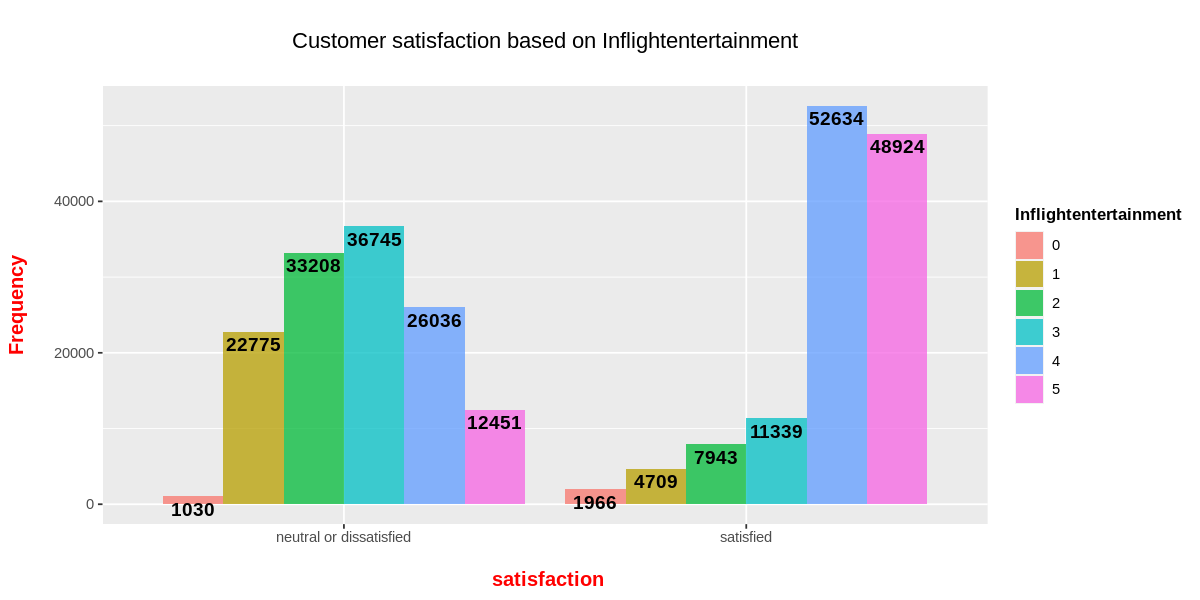

In [39]:
temp_df<-cbind(dataset[,c('satisfactionv2','Inflightentertainment')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill =Inflightentertainment)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Inflightentertainment \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

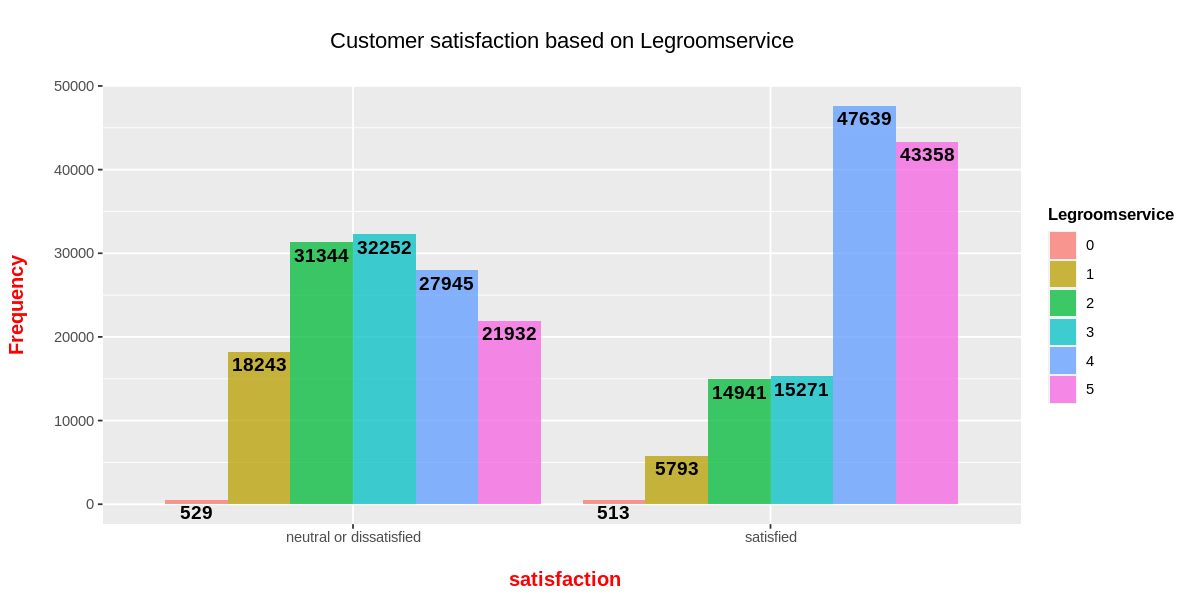

In [40]:
temp_df<-cbind(dataset[,c('satisfactionv2','Legroomservice')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Legroomservice)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Legroomservice \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

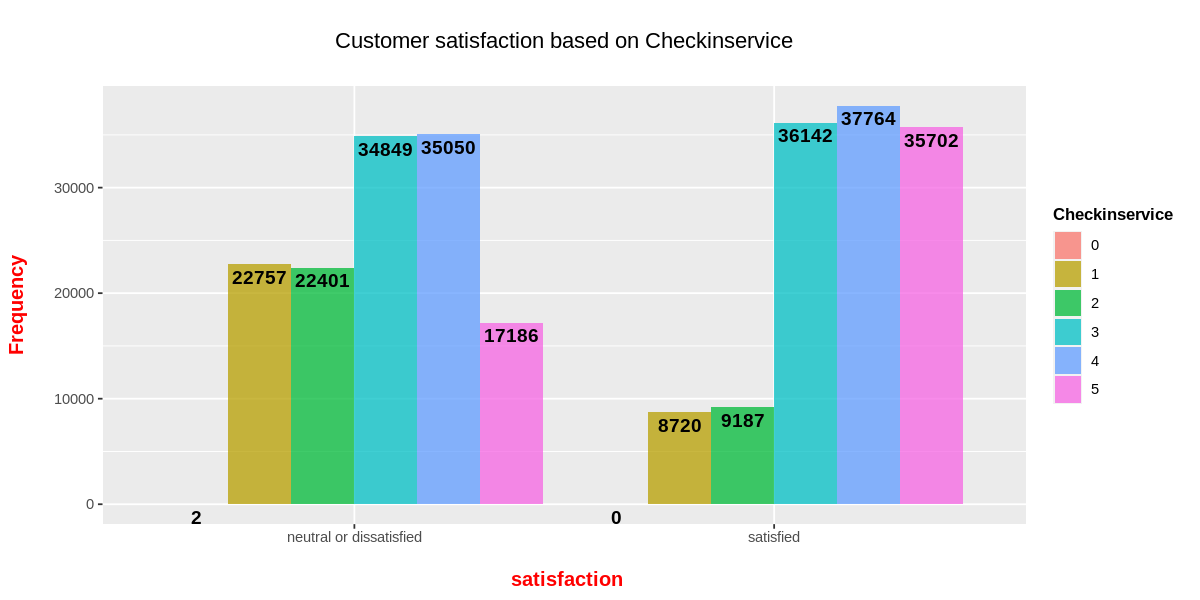

In [41]:
temp_df<-cbind(dataset[,c('satisfactionv2','Checkinservice')])
results <- data.frame(table(temp_df))
ggplot(data = results, aes(x = satisfactionv2, y = Freq, fill = Checkinservice)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Checkinservice \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

### Visualizing Relationship between a Cusomter Satisfaction fields with maximum occurance of a rating from all satisfation scale for each passenger

Looking at the a plot of relationship individually might be too difficult to understand the relationship and satisfaction rating in each categories to passenger satisfation. Instead, we count the occurance of customers' rating and take the maximum rating occur for each customer and use barchart to visualize a relationship with final satisfaction

In [42]:
sat_data=dataset[,sat_cols]

# Calculate a maximum occurance from all satisfation scale for each customer  
max_occurance<-apply(sat_data,1,function(x) names(which.max(table(x))))

In [43]:
# create dataframe of max occurance scale
max_occur<-data.frame( max_occur = max_occurance)

sat=dataset[,c("satisfactionv2")]
# combine dataframe of max occurance and final statisfaction
max_sat<-cbind(max_occur,sat)


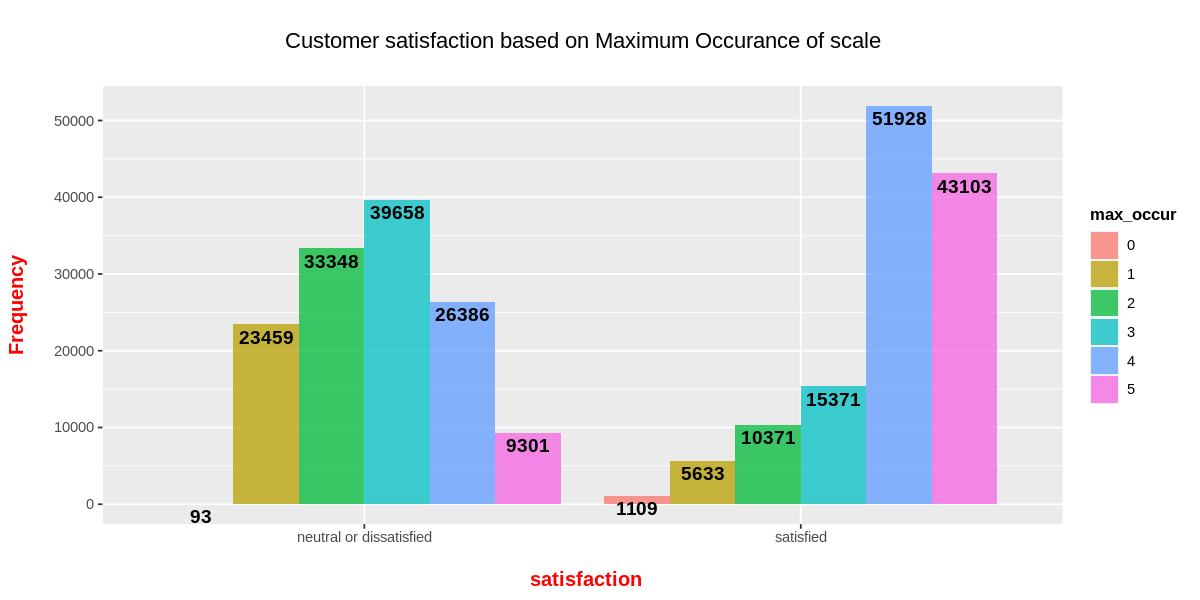

In [44]:
results <- data.frame(table(max_sat))
ggplot(data = results, aes(x = sat, y = Freq, fill =max_occur)) +
geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)  +

  geom_text(aes(label = Freq), fontface = "bold", vjust = 1.5,
             position = position_dodge(.9), size = 4) +
  labs(x = "\n satisfaction", y = "Frequency\n", title = "\n Customer satisfaction based on Maximum Occurance of scale \n") +
  theme(plot.title = element_text(hjust = 0.5), 
        axis.title.x = element_text(face="bold", colour="red", size = 12),
        axis.title.y = element_text(face="bold", colour="red", size = 12),
        legend.title = element_text(face="bold", size = 10))

From this visualization we can see that statiscally passengers that have neutral or disstasified to a service of an airlines mostly have a maximum occurance of rating from 1 to 3. While on the other hand for a passenger with who satisfied a service has maximum occurance from 4 to 5.

# Data preparation or Data preprocessing

Data preprocessing is a crucial process before feeding a data into a models

In [45]:
dataset

satisfactionv2,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Seatcomfort,DepartureArrivaltimeconvenient,Foodanddrink,⋯,Inflightentertainment,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding,DepartureDelayinMinutes,ArrivalDelayinMinutes
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,⋯,4,3,3,0,3,5,3,2,0,0
satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,⋯,2,3,4,4,4,2,3,2,310,305
satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,⋯,0,2,3,3,4,4,4,2,0,0
satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,⋯,4,1,1,0,1,4,1,3,0,0
satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,⋯,3,2,2,0,2,4,2,5,0,0
satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,⋯,0,2,5,4,5,5,4,2,0,0
satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,⋯,5,5,5,0,5,5,5,3,17,15
satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,⋯,0,2,3,3,4,5,4,2,0,0
satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,⋯,3,4,4,0,1,5,4,4,0,0


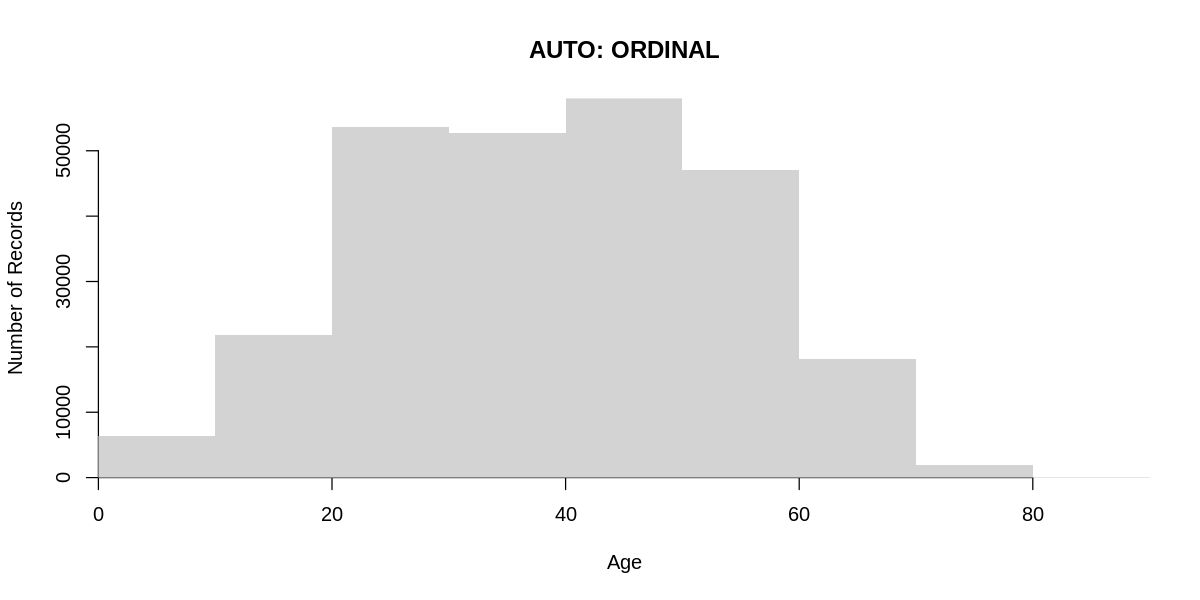

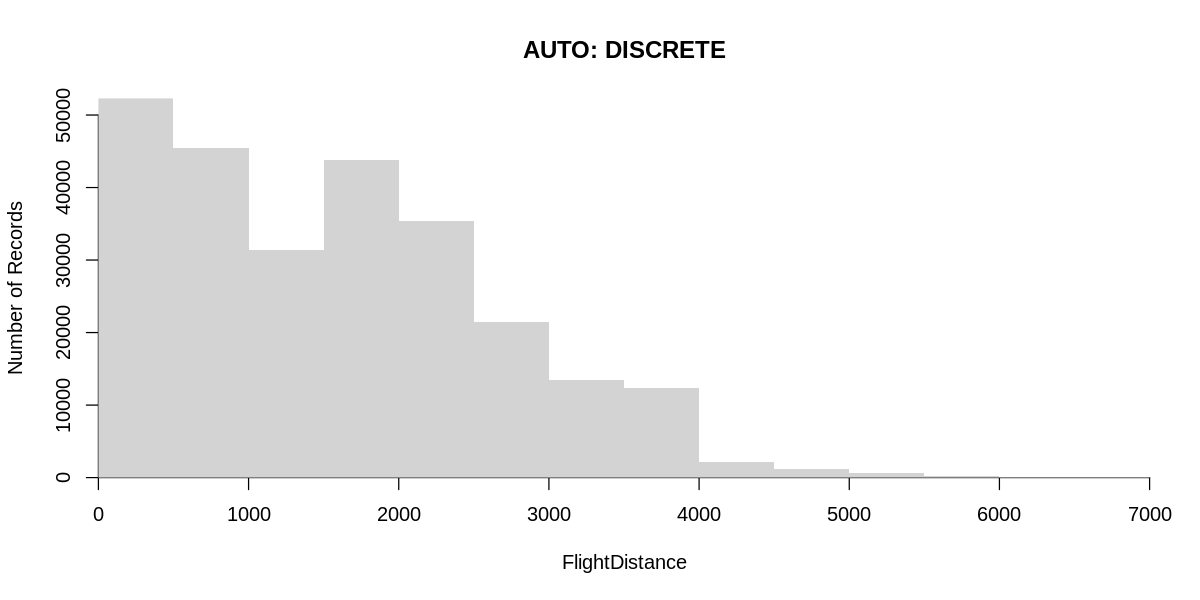

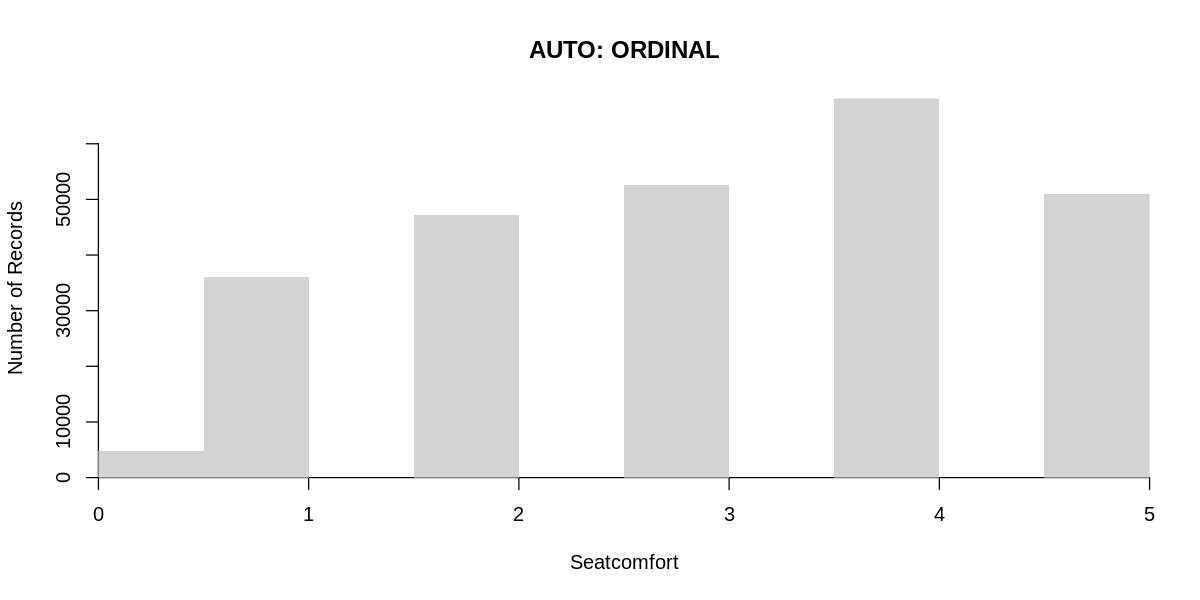

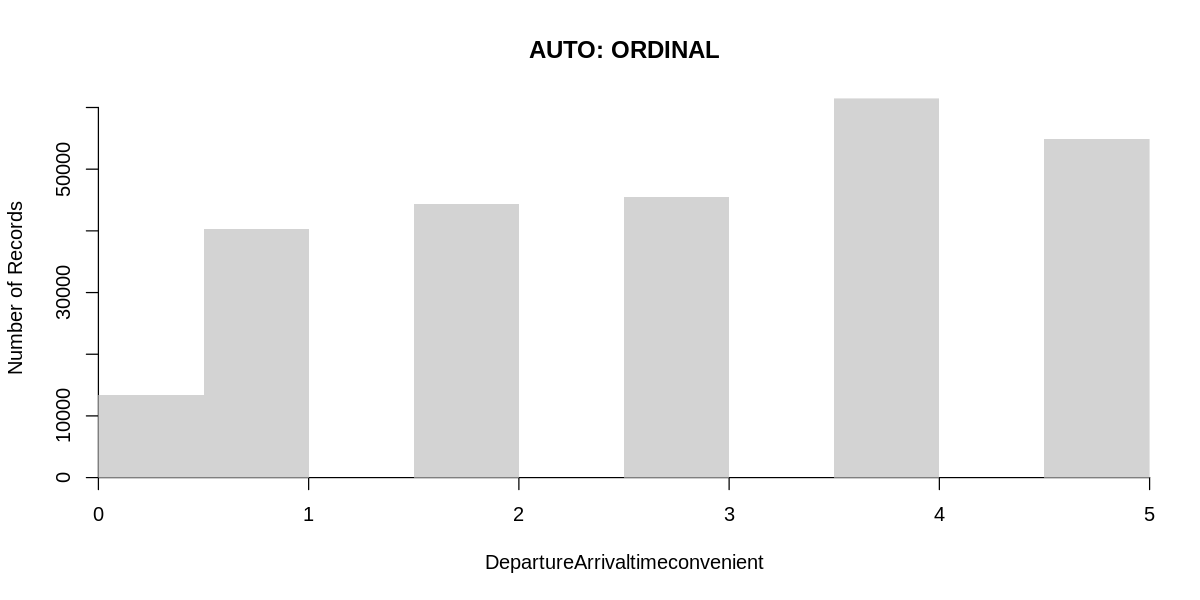

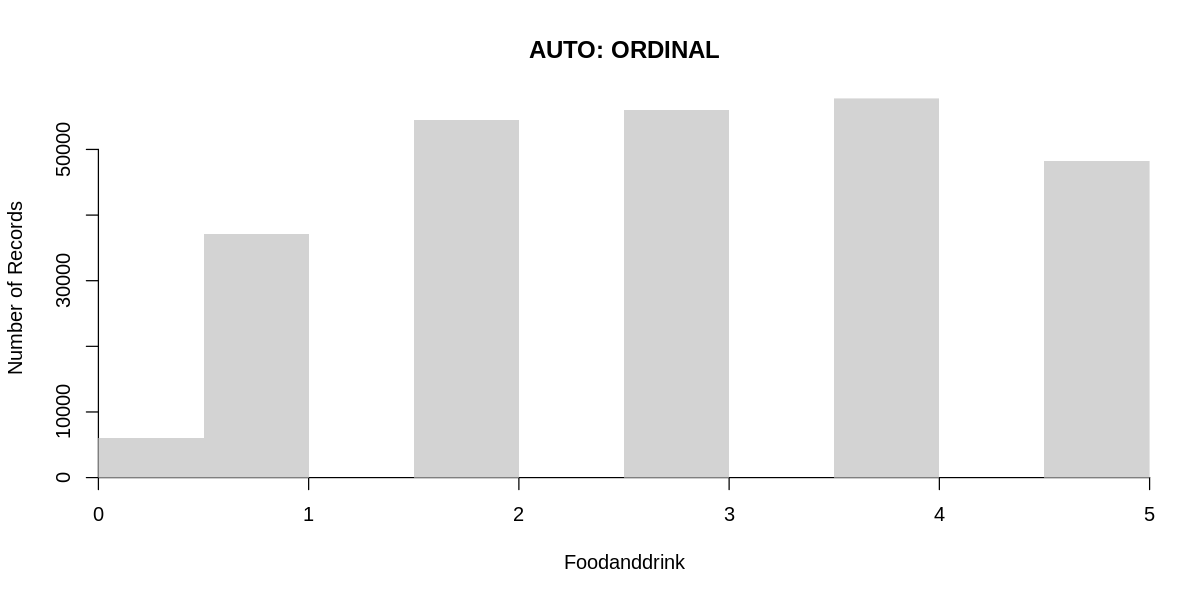

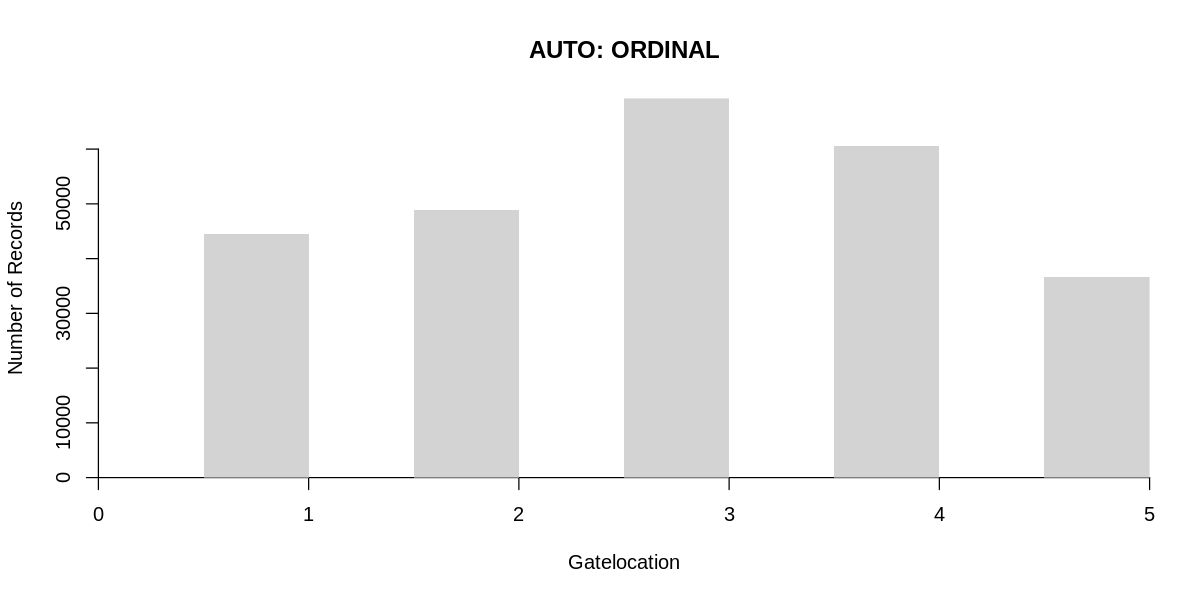

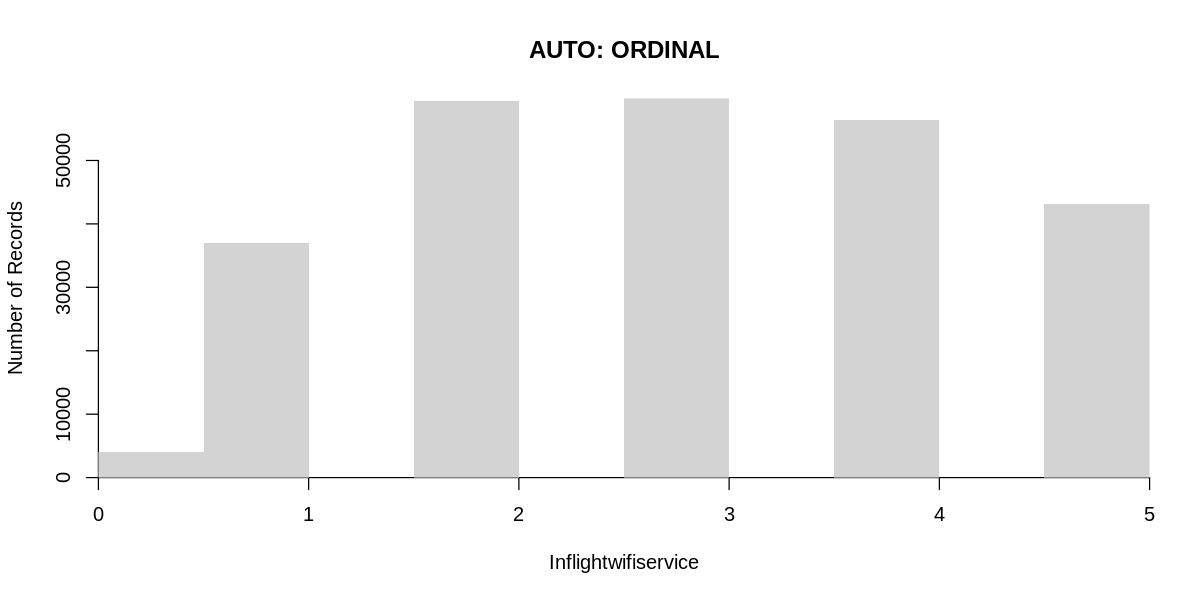

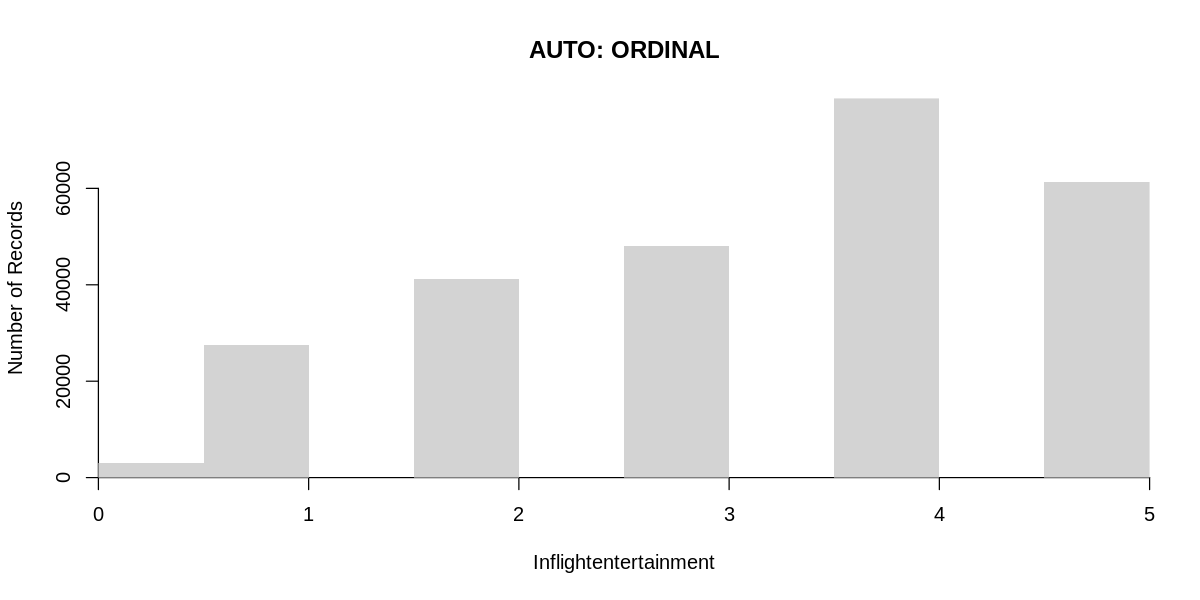

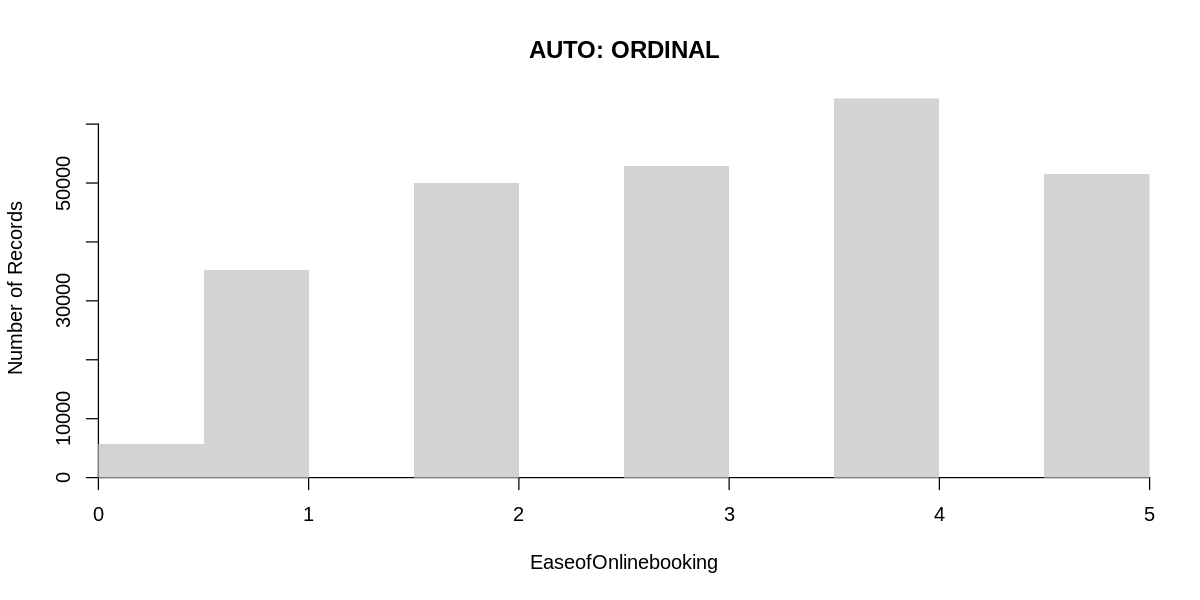

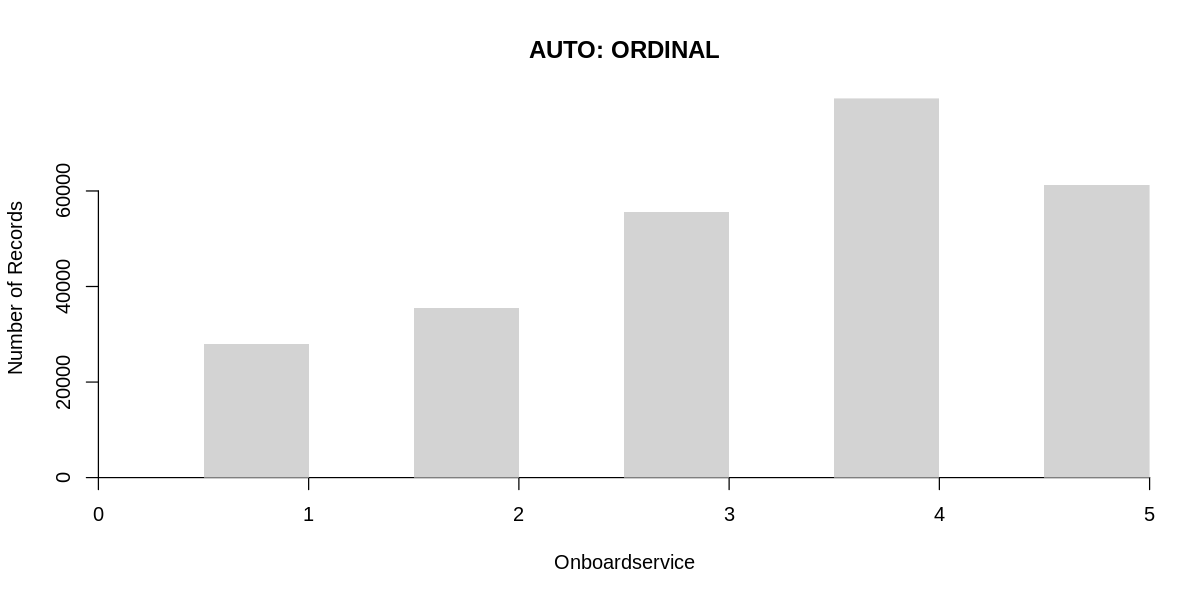

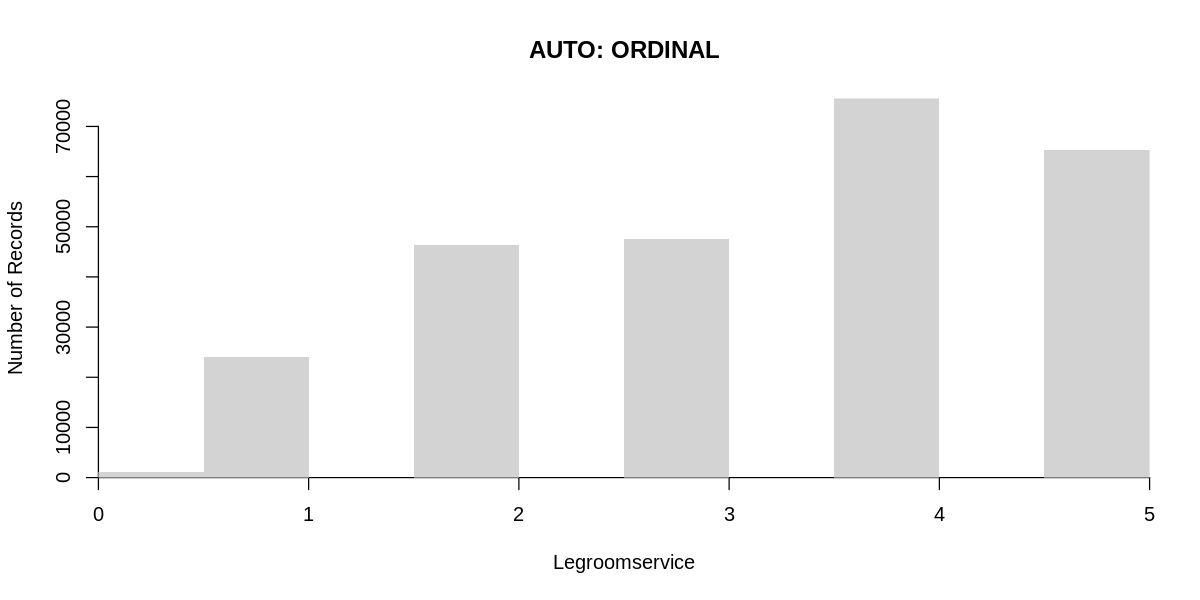

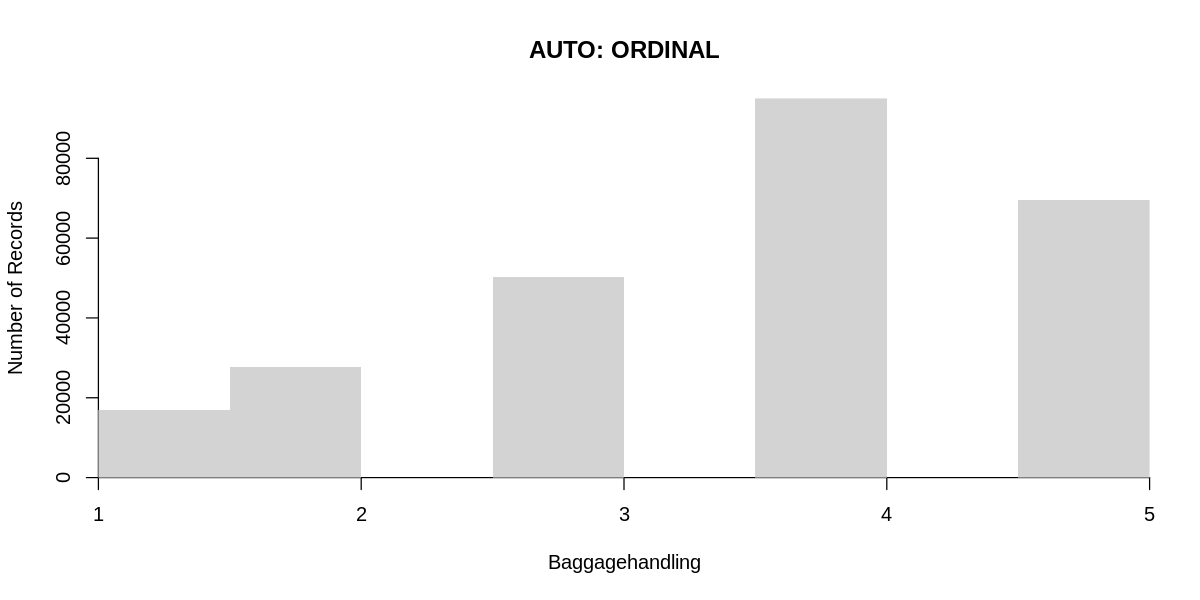

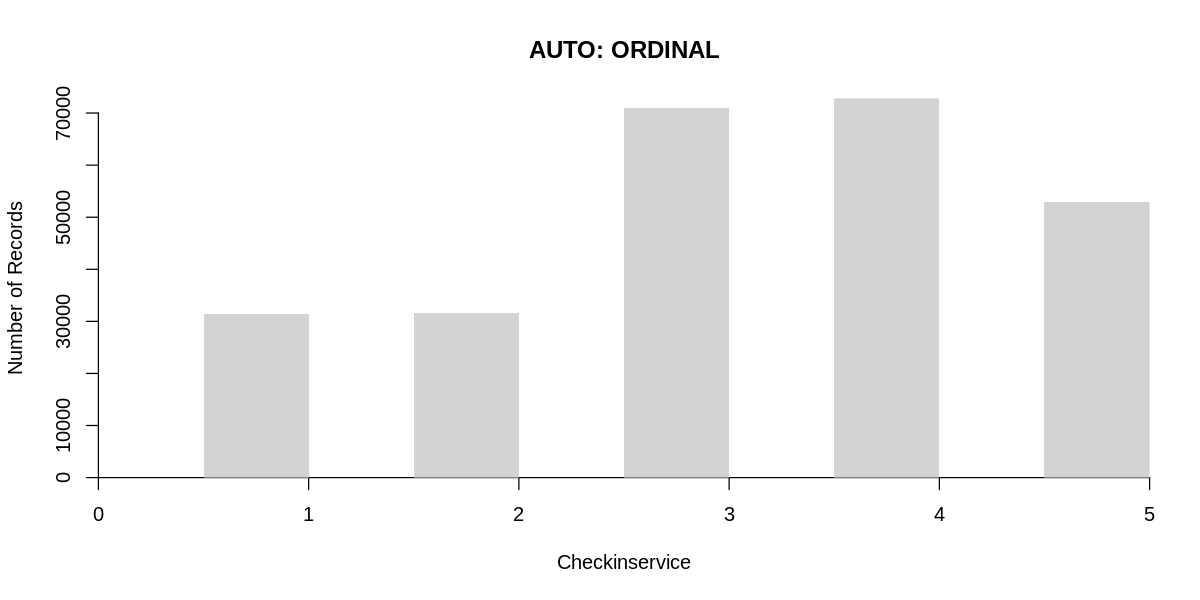

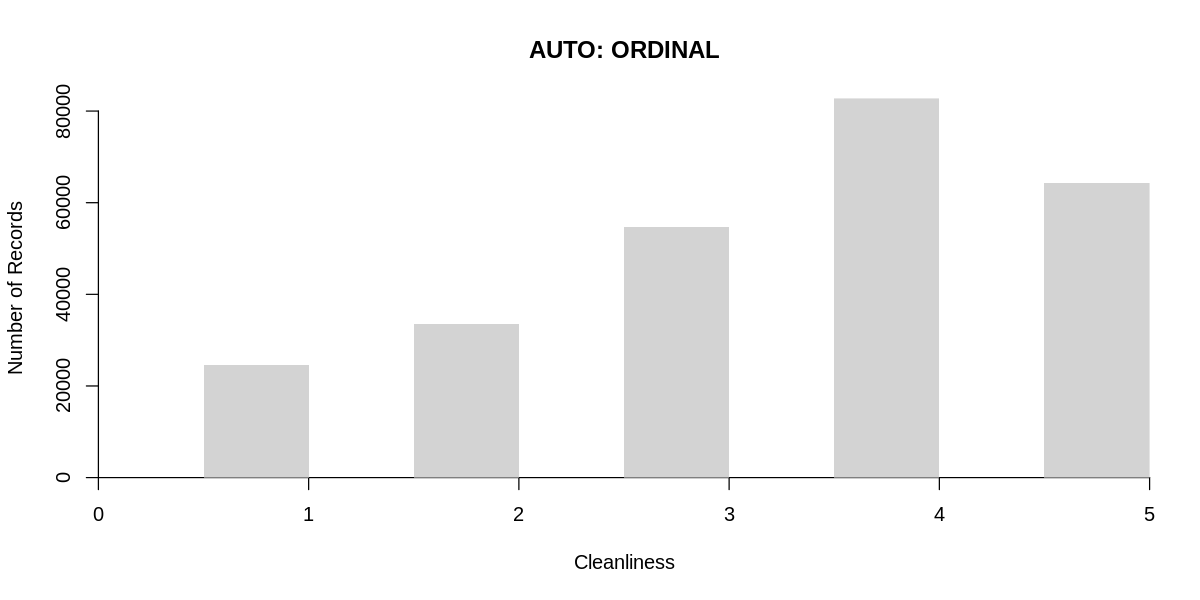

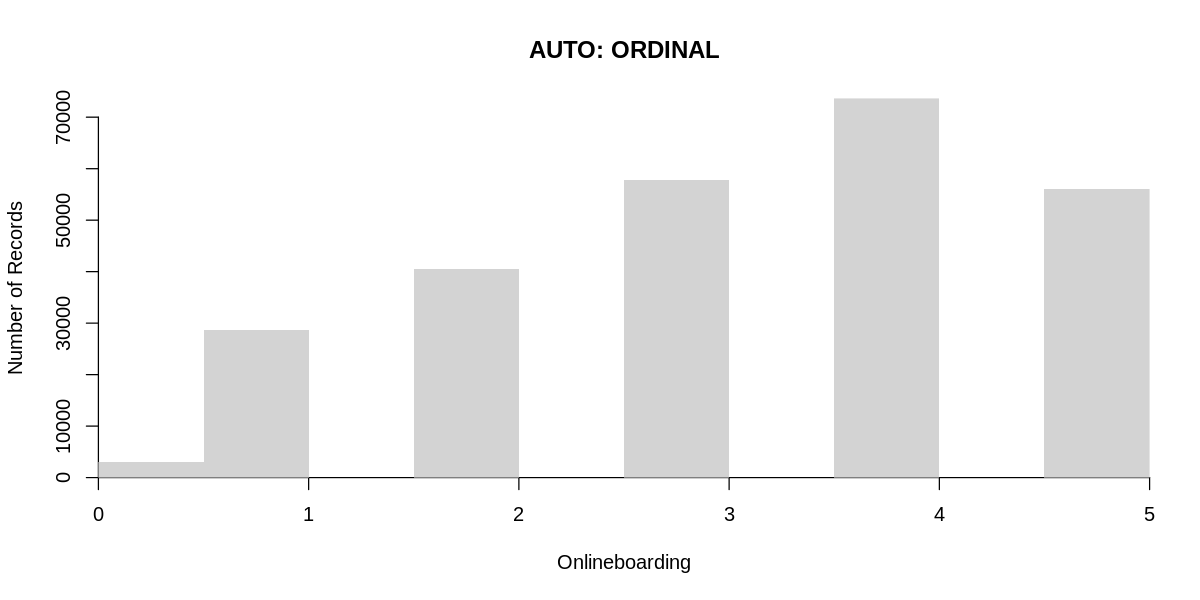

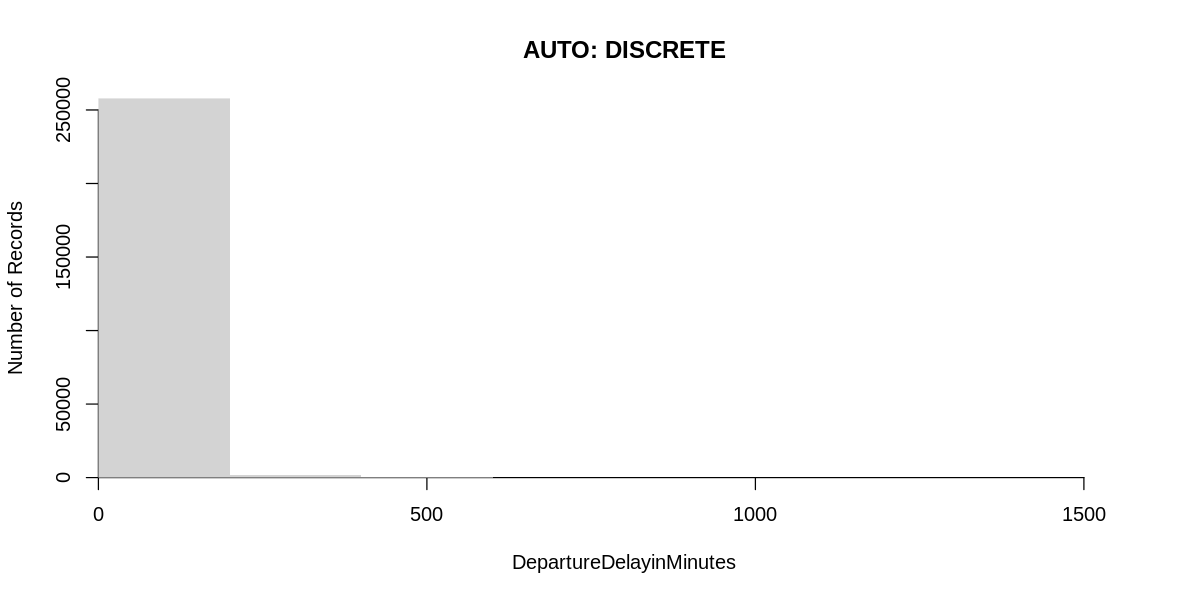

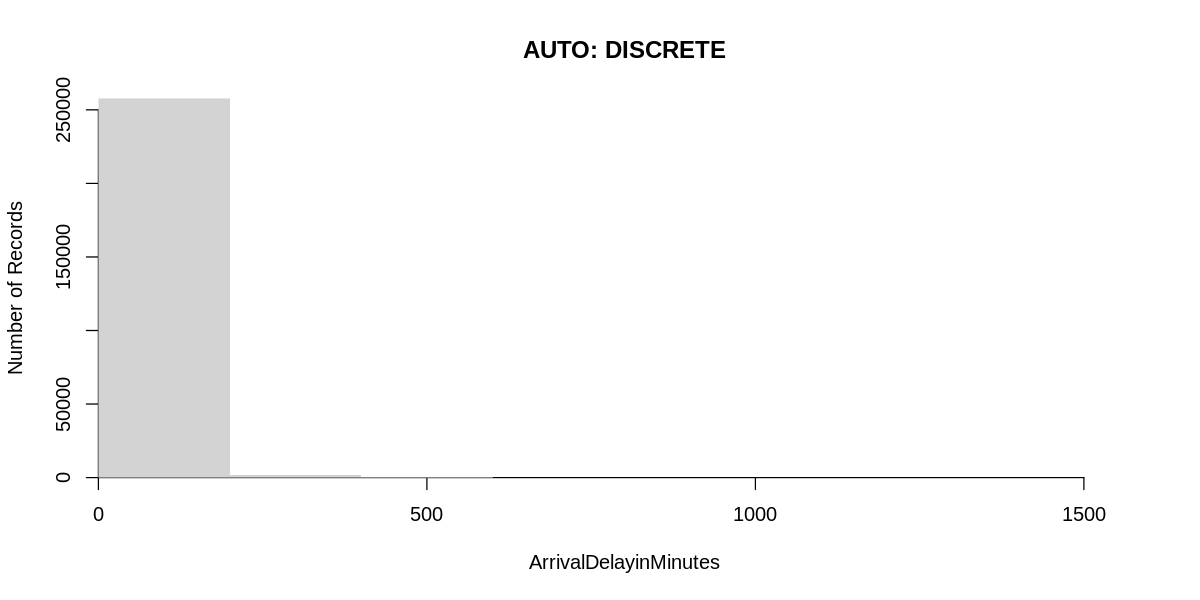

In [46]:
# Number of empty bins to determine discrete
DISCRETE_BINS = 5
field_types_ord_dis<-NPREPROCESSING_discreteNumeric(dataset=dataset,field_types=field_types, cutoff=DISCRETE_BINS)

In [47]:
is_sat<-  ifelse(names(dataset)%in%sat_cols , "SAT", "NOTSAT")
is_time <- ifelse(names(dataset)%in%time_field,"TIME", "NOTTIME")
is_dis <- ifelse(names(dataset)%in%distance_field,'DIS','NOTDIS')
types_table<-data.frame(field=names(dataset),
                        initial=field_types,
                        types=field_types_ord_dis, 
                        is_sat=is_sat,
                        is_time=is_time,
                        is_dis = is_dis)
print(formattable::formattable(types_table))

types_table

field,initial,types,is_sat,is_time,is_dis
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
satisfactionv2,SYMBOLIC,SYMBOLIC,NOTSAT,NOTTIME,NOTDIS
Gender,SYMBOLIC,SYMBOLIC,NOTSAT,NOTTIME,NOTDIS
CustomerType,SYMBOLIC,SYMBOLIC,NOTSAT,NOTTIME,NOTDIS
Age,NUMERIC,ORDINAL,NOTSAT,NOTTIME,NOTDIS
TypeofTravel,SYMBOLIC,SYMBOLIC,NOTSAT,NOTTIME,NOTDIS
Class,SYMBOLIC,SYMBOLIC,NOTSAT,NOTTIME,NOTDIS
FlightDistance,NUMERIC,DISCRETE,NOTSAT,NOTTIME,DIS
Seatcomfort,NUMERIC,ORDINAL,SAT,NOTTIME,NOTDIS
DepartureArrivaltimeconvenient,NUMERIC,ORDINAL,SAT,NOTTIME,NOTDIS


## Remove outlier in ordinals fields

The next step before starting a preprocessing a dataset is removing an outlier from  ordinals fields and replace it with mean of each fields

[1] "Outlier field= Age Records= 12 Replaced with MEAN"


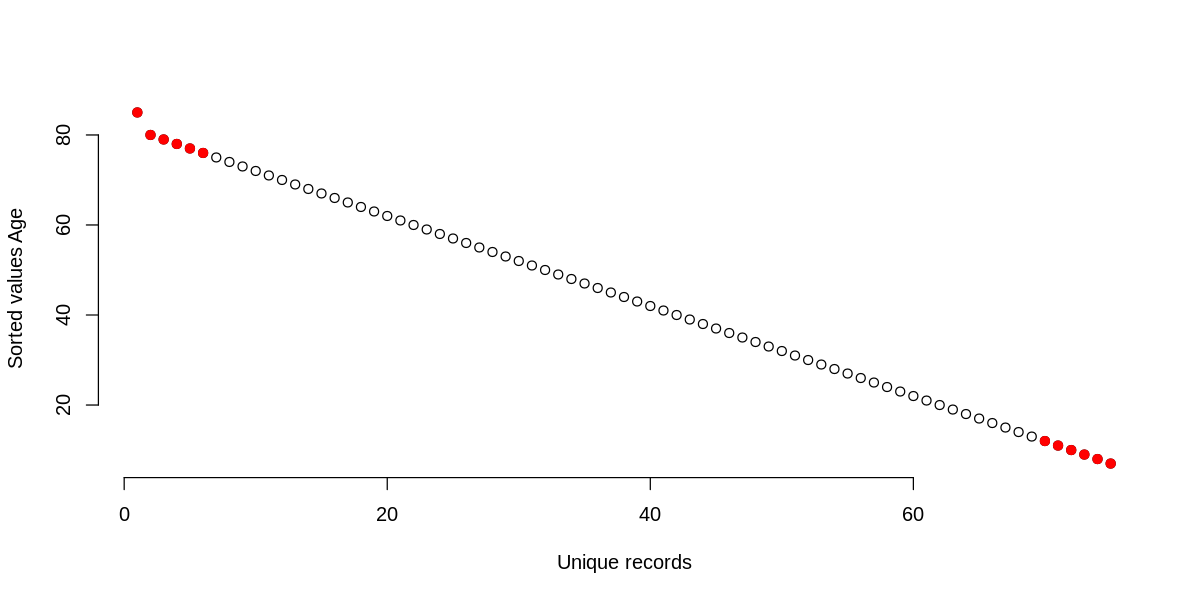

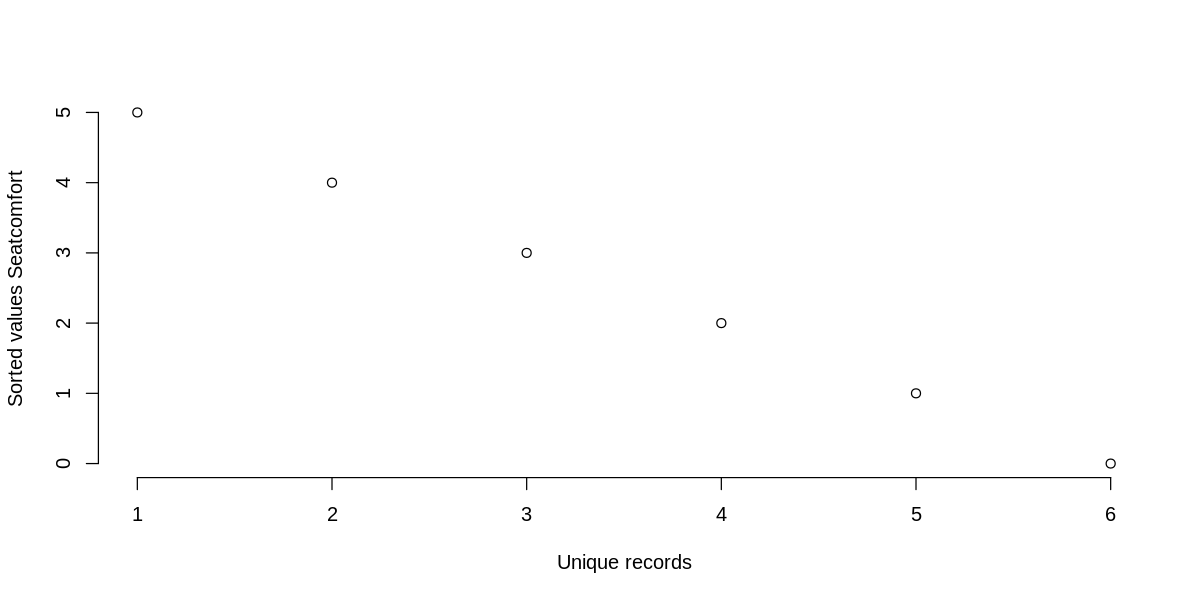

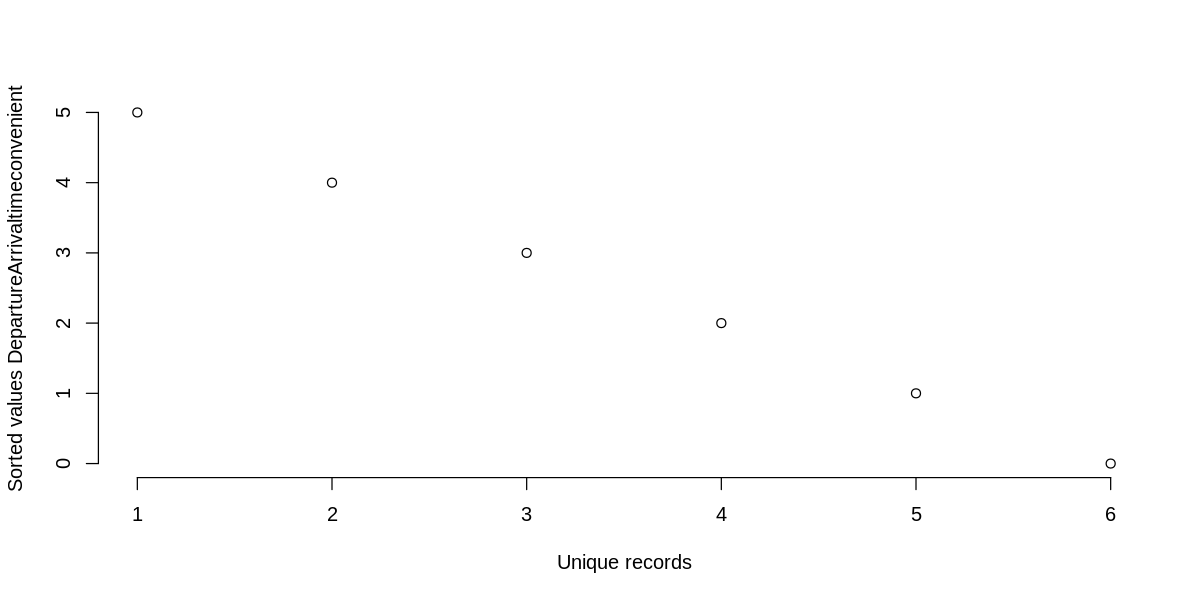

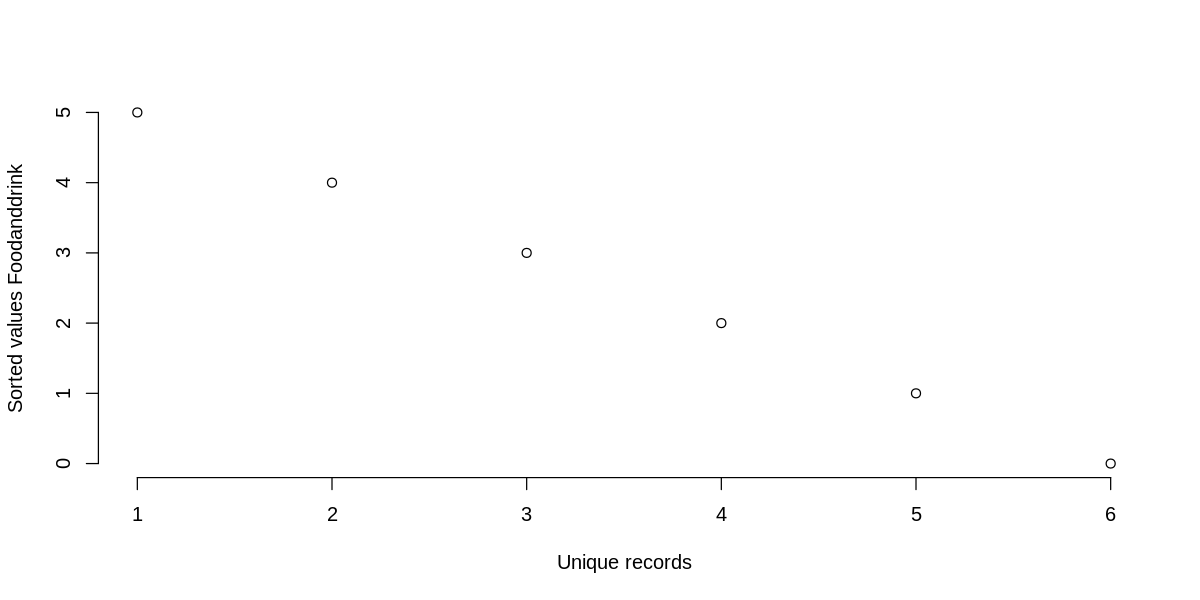

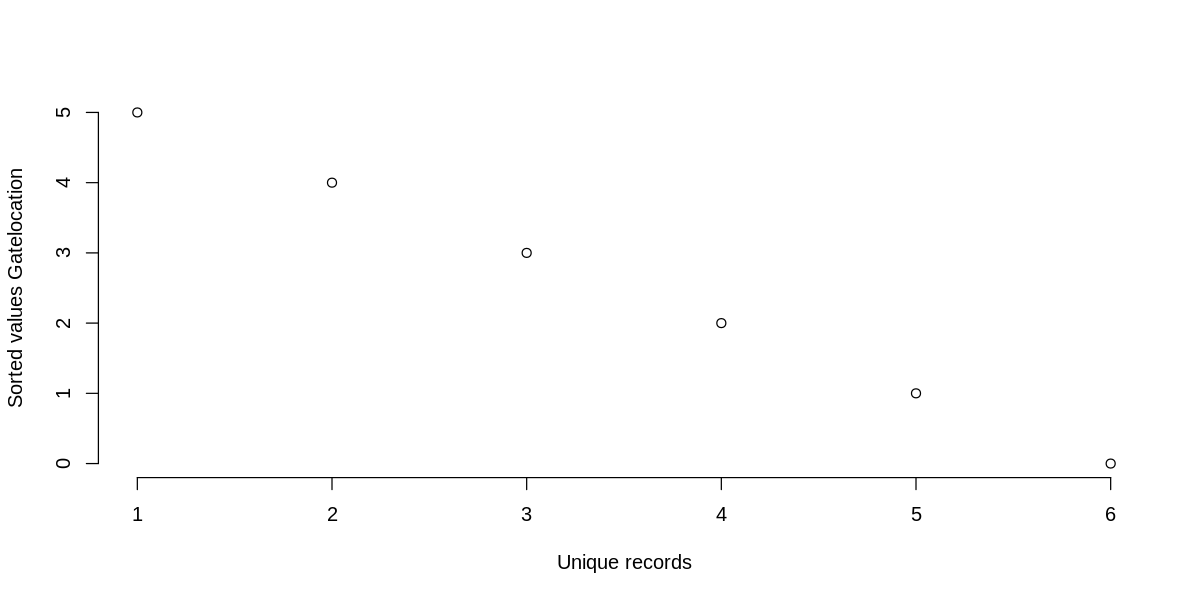

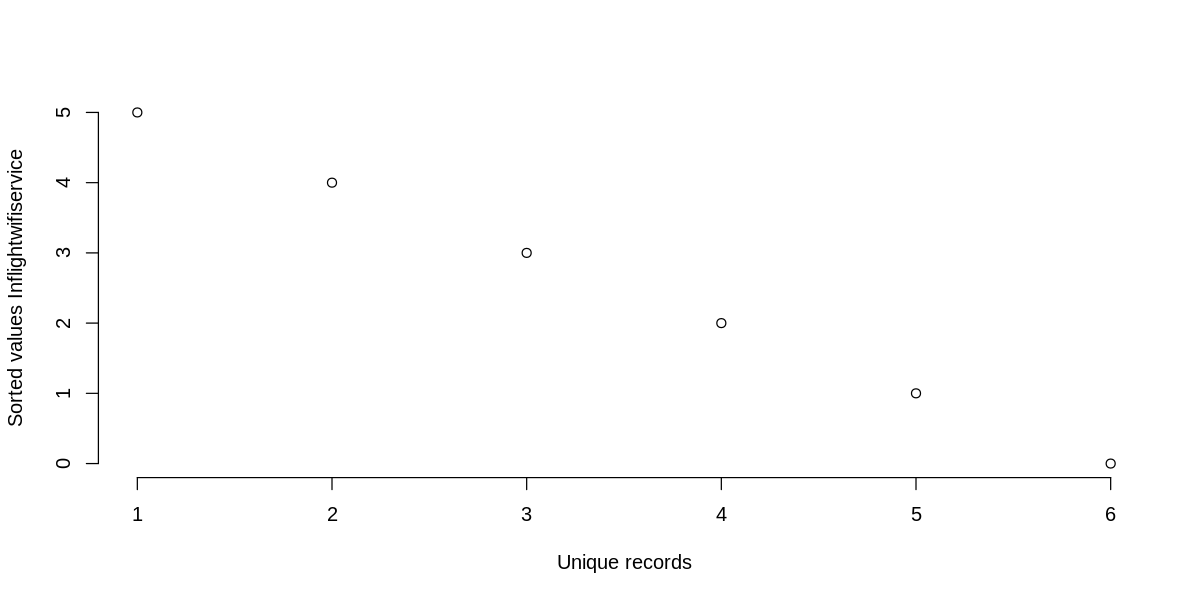

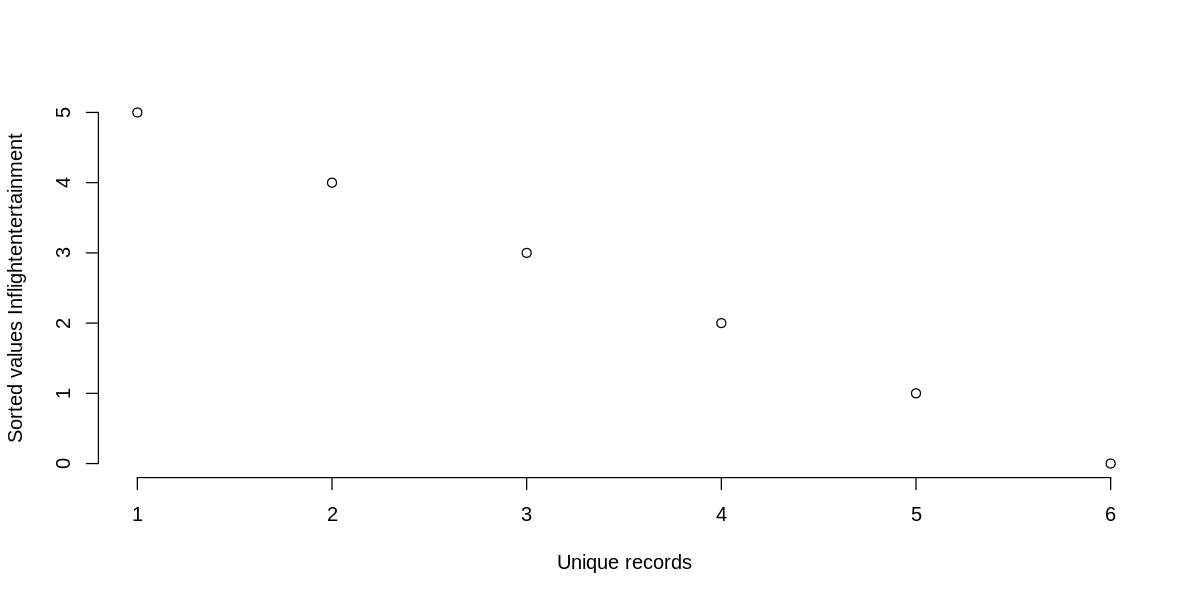

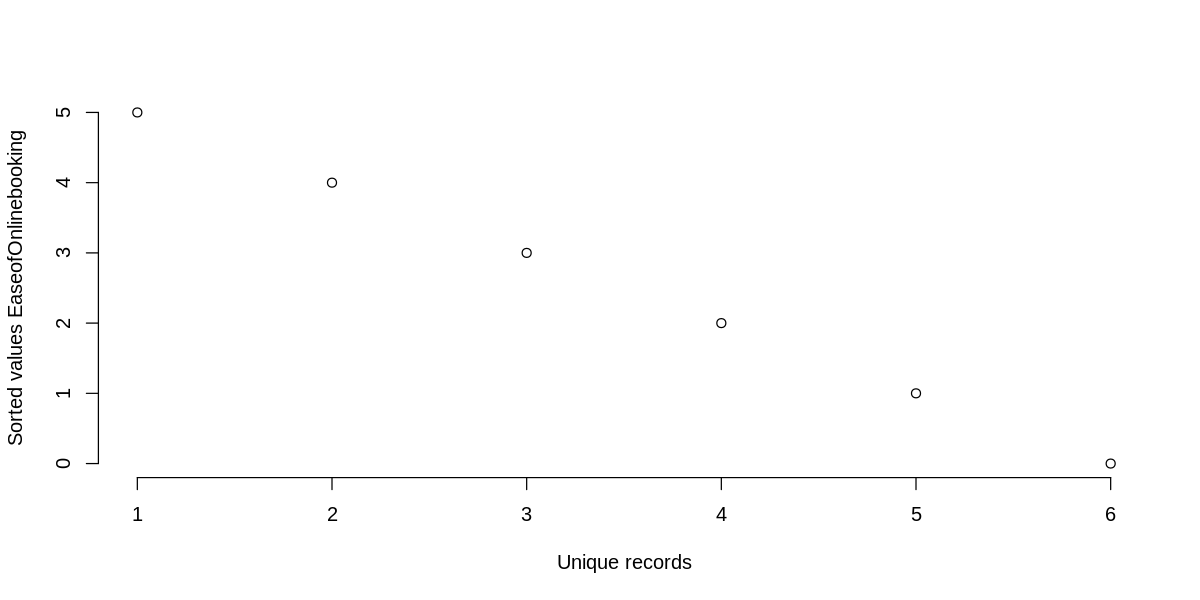

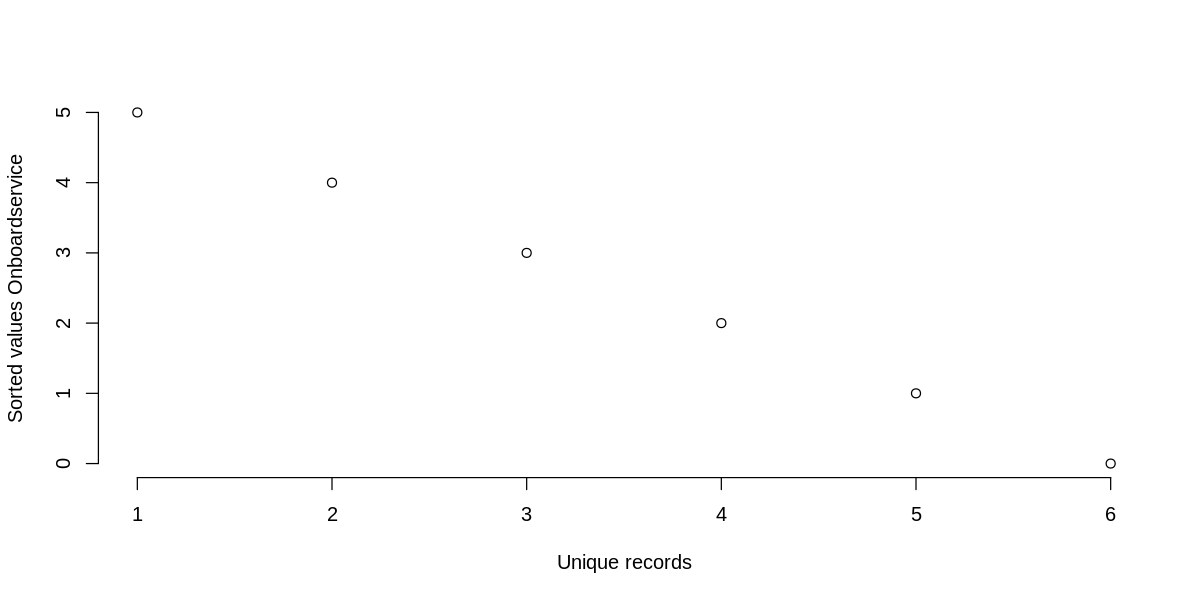

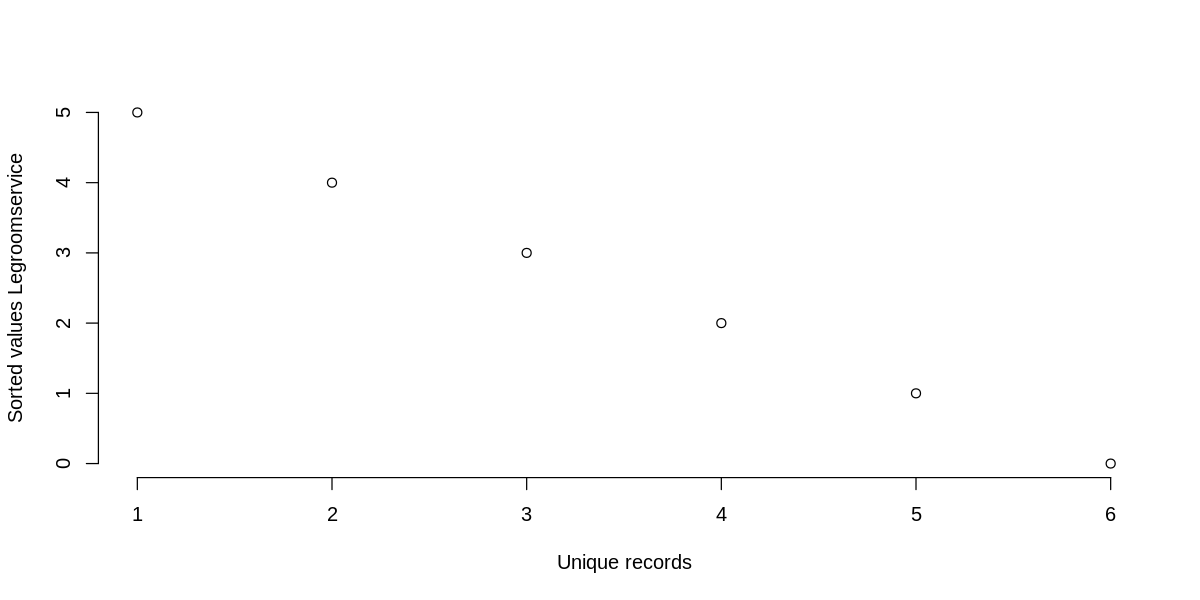

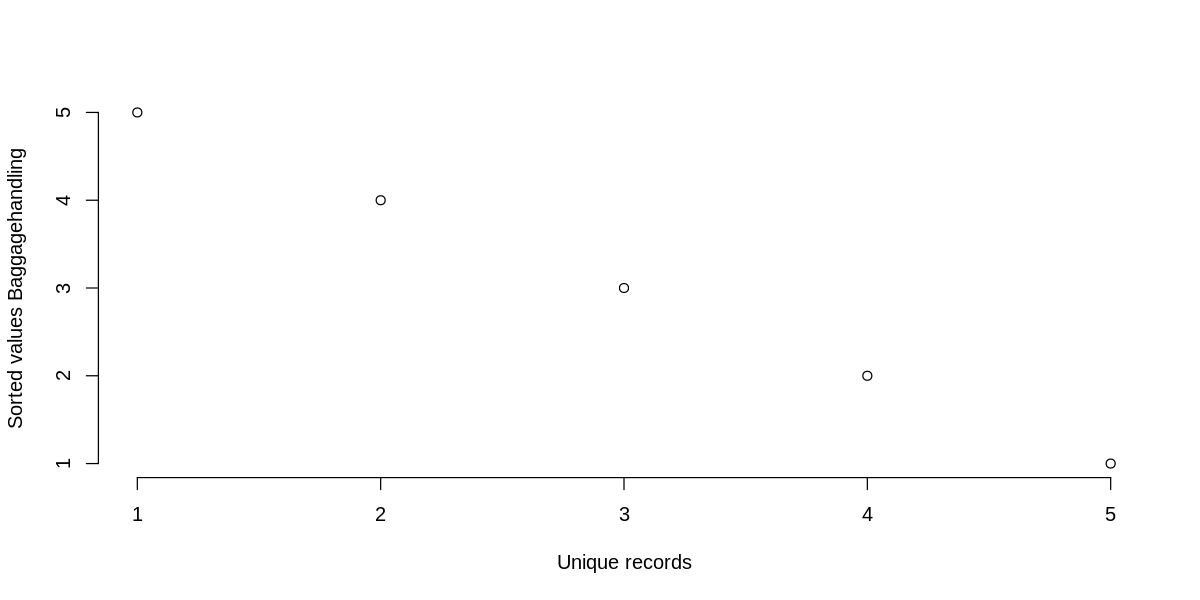

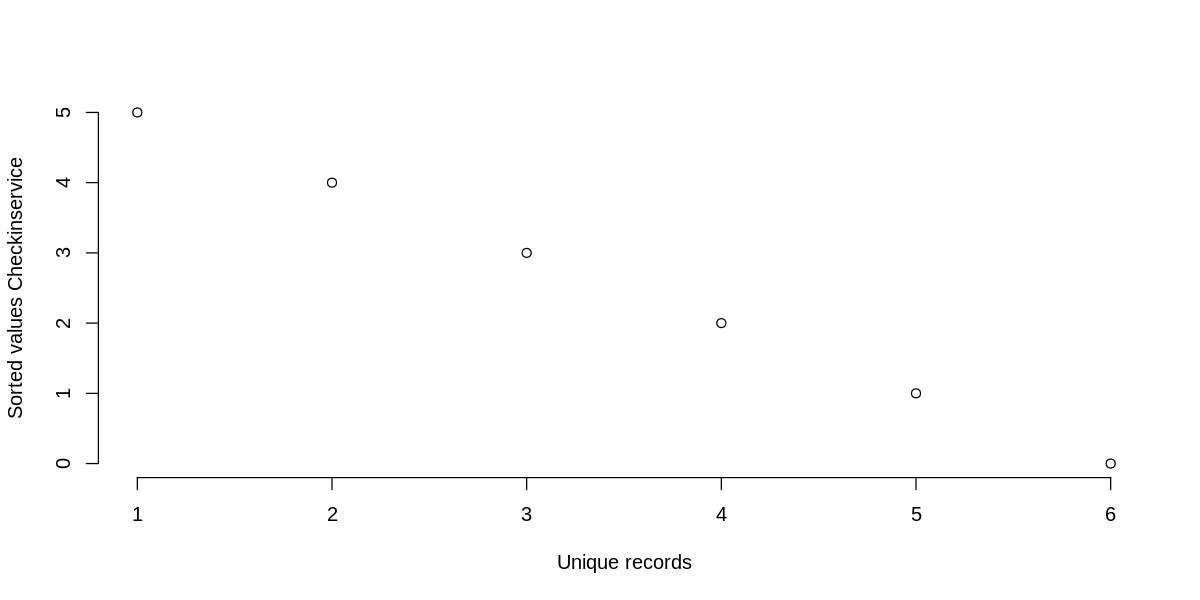

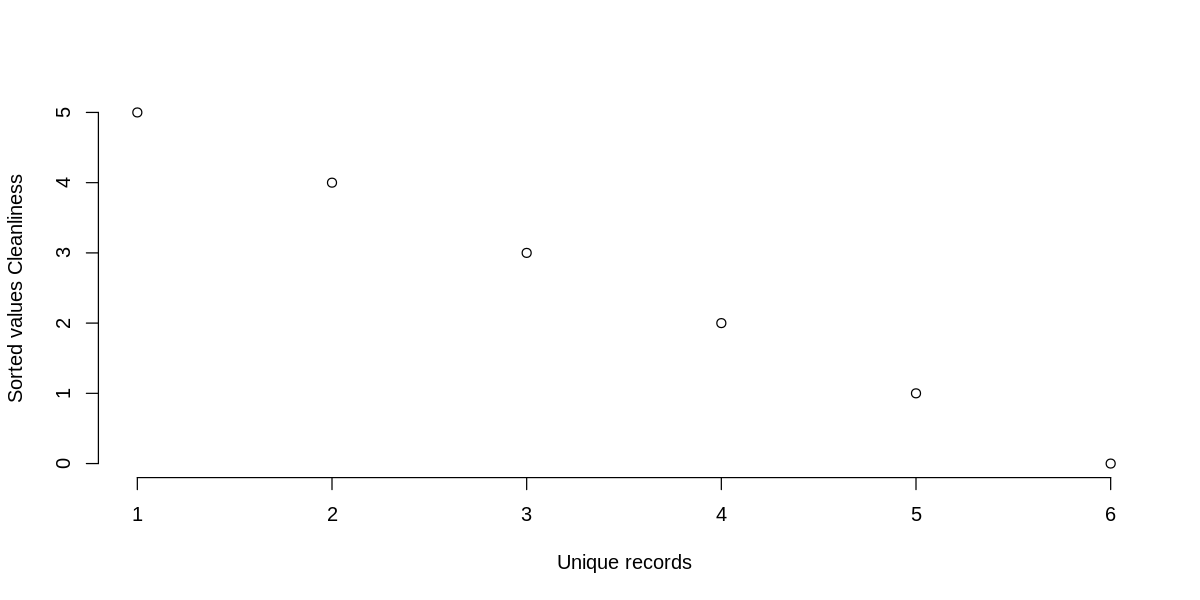

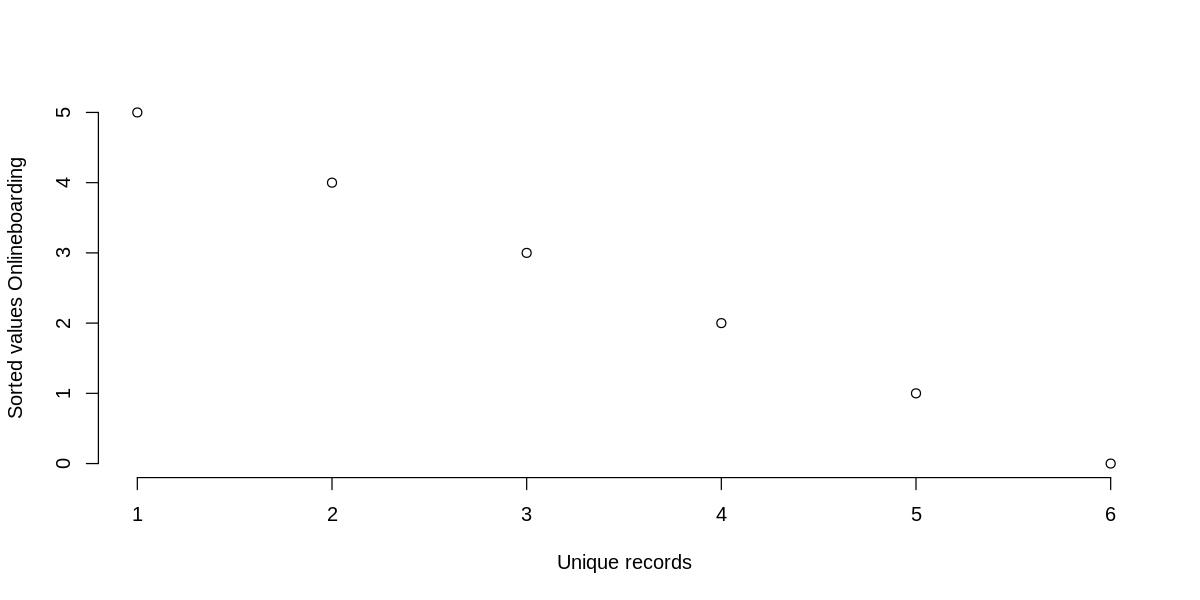

In [48]:
OUTLIER_CONF = 0.85
# get a dataframe contains only ordinals fields
ordinals<-dataset[,which(field_types_ord_dis=='ORDINAL')]
# remove outlier and replace it with means value
ordinals<-NPREPROCESSING_outlier(ordinals=ordinals,confidence=OUTLIER_CONF)

In [49]:
# replace an old ordinal field with new ordinal value after remove outlier
dataset[,names(ordinals)]<-ordinals

In [50]:
# function 

## Preprocess ordinals values


### Satisfaction fields


##### Normalization (satisfaction fields) : $ Xnormalize = \frac{X}{5}$

For ordinal fields which contains a rating of a passenger satisfaction, these field will be normalize by value of 5 which is the different between maximum rating (5) and minimum rating(0). Instead of normalize by a maximum and minimum value in each colums since some fill its does not contains a minimum rating but we want to normalize in a same scale for all the field containing rating information. The range of the value after normalize will be in a range of 0.0 to 1.0. 

### Others Ordinal fields

##### Normalization (satisfaction fields) :  $ Xnormalize = \frac{X-X\min}{X\max -X\min} $

For others ordinal fields, each colums will be normalize by substract the value with the minimum vaue and divide by the different between maximum and minimum values. The range of the value after normalize will be in a range of 0.0 to 1.0. 

In [51]:
# call function Preprocess ordinal which will normalize a value according to type of its fields
processed_ordinal<-Preprocess_ordinal(dataset,types_table)
head(processed_ordinal)

Age,Seatcomfort,DepartureArrivaltimeconvenient,Foodanddrink,Gatelocation,Inflightwifiservice,Inflightentertainment,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding
0.7945205,0,0,0,0.4,0.4,0.8,0.6,0.6,0.0,0.6,1.0,0.6,0.4
0.5479452,0,0,0,0.6,0.0,0.4,0.6,0.8,0.8,0.8,0.4,0.6,0.4
0.1095890,0,0,0,0.6,0.4,0.0,0.4,0.6,0.6,0.8,0.8,0.8,0.4
0.7260274,0,0,0,0.6,0.6,0.8,0.2,0.2,0.0,0.2,0.8,0.2,0.6
0.8630137,0,0,0,0.6,0.8,0.6,0.4,0.4,0.0,0.4,0.8,0.4,1.0
0.3150685,0,0,0,0.6,0.4,0.0,0.4,1.0,0.8,1.0,1.0,0.8,0.4


## Preprocess Categorical (Symbolic and Discrete values)

For preprocessing a Symbolic and Discrete values, symbolic values will be transform from symbolic value to on hot encoding directly. And for discrete values, it will be convert to a symbolic values first then transform those value to a form of on hot encoding. 

### Convert Discrete values to symbolic 

The fields ***('DepatureDelayinMinutes'), ('ArrivalDelayinMinutes') and ('FlightDistance')*** are discrete fields that need to be convert to symbolic value before tranforming it to one hot encoding.


For ***('DepatureDelayinMinutes') and  ('ArrivalDelayinMinutes')*** fields, we convert a delay to 4 symbolic values

- Value 0 for a delay time equal to 0 minutes or no delay
- Value 1 for a delay time from 1 to 29 minutes
- Value 2 for a delay time from 30 to 59 minutes
- Value 3 for a delay time from 60 minutes above

For ***('Flightdistance')*** fiedls, according to information from commercial flight duration. The distance of a flight are classified into three categories.

- Short Haul for distance from 600 to 800 miles or less than  
- Long Haul for distance from 2,200 to 2,600 or more than
- Medium Haul for a distance in between Short and Long Haul which are distance from 800 to 2200 miles 




In [52]:
time_data<-dataset[,time_field]
head(time_data)
time_data<-Process_timeDelay(time_data)
head(time_data)


,DepartureDelayinMinutes,ArrivalDelayinMinutes
,<int>,<dbl>
1,0,0
2,310,305
3,0,0
4,0,0
5,0,0
6,0,0


DepartureDelayinMinutes,ArrivalDelayinMinutes
0,0
3,3
0,0
0,0
0,0
0,0


In [53]:
distance_data<-dataset[, grepl(distance_field, names(dataset)), drop = FALSE]
head((distance_data))
distance_data<-Process_distance(distance_data)
head(distance_data)

,FlightDistance
,<int>
1,265
2,2464
3,2138
4,623
5,354
6,1894


FlightDistance
short
long
medium
short
short
medium


In [54]:
# get symbolic and discrete data 
categor_data<-dataset[,symbolic_index]



# convert a discrete value to symbolic values



# combine symbolic data with converted discrete data
categor_data<-cbind(categor_data,time_data)
categor_data<-cbind(categor_data,distance_data)
head(categor_data)

,satisfactionv2,Gender,CustomerType,TypeofTravel,Class,DepartureDelayinMinutes,ArrivalDelayinMinutes,FlightDistance
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,short
2,satisfied,Male,Loyal Customer,Personal Travel,Business,3,3,long
3,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,medium
4,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,short
5,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,short
6,satisfied,Male,Loyal Customer,Personal Travel,Eco,0,0,medium


After converted a discrete value to symbolic value then combine the data together in a same dataframe.

### Transform both symbolic and discrete data to one hot encoding

Then we transform a dataframe containing both symbolic and discrete into a form of one hot encoding.

In [55]:

processed_catdata<-Preprocess_categorical(categor_data)
head(processed_catdata)

,satisfactionv2,Gender,CustomerType,TypeofTravel,ClassBusiness,ClassEco,ClassEco.Plus,DepartureDelayinMinutes0,DepartureDelayinMinutes1,DepartureDelayinMinutes2,DepartureDelayinMinutes3,ArrivalDelayinMinutes0,ArrivalDelayinMinutes1,ArrivalDelayinMinutes2,ArrivalDelayinMinutes3,FlightDistancelong,FlightDistancemedium,FlightDistanceshort
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0
3,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
4,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
5,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
6,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0


### Combine processed Ordinal data and Categorical

After finsinih preprocess all the fields in dataset, all the processed dataset is ready for merging into one dataframe

In [56]:
processed_data<-cbind(processed_catdata, processed_ordinal)
#processed_data<-cbind(processed_data,time_data)

In [57]:
# Convert label 0 to 1 and vice versa for satisfation label to represent 1 for statisfy  and 0 for not 
processed_data$satisfactionv2 <- ifelse(as.numeric(processed_data$satisfactionv2)==0,1,0)
head(processed_data)

,satisfactionv2,Gender,CustomerType,TypeofTravel,ClassBusiness,ClassEco,ClassEco.Plus,DepartureDelayinMinutes0,DepartureDelayinMinutes1,DepartureDelayinMinutes2,⋯,Gatelocation,Inflightwifiservice,Inflightentertainment,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,0,0,0,1,0,1,0,0,⋯,0.4,0.4,0.8,0.6,0.6,0.0,0.6,1.0,0.6,0.4
2,1,0,0,0,1,0,0,0,0,0,⋯,0.6,0.0,0.4,0.6,0.8,0.8,0.8,0.4,0.6,0.4
3,1,1,0,0,0,1,0,1,0,0,⋯,0.6,0.4,0.0,0.4,0.6,0.6,0.8,0.8,0.8,0.4
4,1,1,0,0,0,1,0,1,0,0,⋯,0.6,0.6,0.8,0.2,0.2,0.0,0.2,0.8,0.2,0.6
5,1,1,0,0,0,1,0,1,0,0,⋯,0.6,0.8,0.6,0.4,0.4,0.0,0.4,0.8,0.4,1.0
6,1,0,0,0,0,1,0,1,0,0,⋯,0.6,0.4,0.0,0.4,1.0,0.8,1.0,1.0,0.8,0.4


In [58]:
names(processed_data)

[1] "satisfactionv2"                 "Gender"                        
 [3] "CustomerType"                   "TypeofTravel"                  
 [5] "ClassBusiness"                  "ClassEco"                      
 [7] "ClassEco.Plus"                  "DepartureDelayinMinutes0"      
 [9] "DepartureDelayinMinutes1"       "DepartureDelayinMinutes2"      
[11] "DepartureDelayinMinutes3"       "ArrivalDelayinMinutes0"        
[13] "ArrivalDelayinMinutes1"         "ArrivalDelayinMinutes2"        
[15] "ArrivalDelayinMinutes3"         "FlightDistancelong"            
[17] "FlightDistancemedium"           "FlightDistanceshort"           
[19] "Age"                            "Seatcomfort"                   
[21] "DepartureArrivaltimeconvenient" "Foodanddrink"                  
[23] "Gatelocation"                   "Inflightwifiservice"           
[25] "Inflightentertainment"          "EaseofOnlinebooking"           
[27] "Onboardservice"                 "Legroomservice"                
[29] "Baggagehandling"                "Checkinservice"                
[31] "Cleanliness"                    "Onlineboarding"

### Removing Reduntant fields

After merging a dataset, we shall check a redundant value in a dataset and remove it. Since 

In [59]:
# # ************************************************
# # Q14: Are any of the fields redundant?
# nrow_before<-paste('Number of rows before removing redundant : ', nrow(processed_data))

# processed_data<-NPREPROCESSING_redundantFields(dataset=processed_data,cutoff=OUTLIER_CONF)
# nrow_after<-paste('Number of rows after removing redundant : ' , nrow(processed_data))


# print(nrow_before)
# print(nrow_after)

In [60]:
head(processed_data)



,satisfactionv2,Gender,CustomerType,TypeofTravel,ClassBusiness,ClassEco,ClassEco.Plus,DepartureDelayinMinutes0,DepartureDelayinMinutes1,DepartureDelayinMinutes2,⋯,Gatelocation,Inflightwifiservice,Inflightentertainment,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,0,0,0,1,0,1,0,0,⋯,0.4,0.4,0.8,0.6,0.6,0.0,0.6,1.0,0.6,0.4
2,1,0,0,0,1,0,0,0,0,0,⋯,0.6,0.0,0.4,0.6,0.8,0.8,0.8,0.4,0.6,0.4
3,1,1,0,0,0,1,0,1,0,0,⋯,0.6,0.4,0.0,0.4,0.6,0.6,0.8,0.8,0.8,0.4
4,1,1,0,0,0,1,0,1,0,0,⋯,0.6,0.6,0.8,0.2,0.2,0.0,0.2,0.8,0.2,0.6
5,1,1,0,0,0,1,0,1,0,0,⋯,0.6,0.8,0.6,0.4,0.4,0.0,0.4,0.8,0.4,1.0
6,1,0,0,0,0,1,0,1,0,0,⋯,0.6,0.4,0.0,0.4,1.0,0.8,1.0,1.0,0.8,0.4


In [61]:
rm(list=setdiff(ls(), c("processed_data","combined")))
ls()

[1] "combined"       "processed_data"

In [62]:

allResults<-data.frame()

# Models and Evaluation

## Models
For a machine learning that we are going to use are 

### Supervised Learning
- ***Binomial Logistic Regression***
- ***Decison Tree***
- ***Random Forest Classifier***
- ***Support Vector Machine ( Radial kernel )*** 
- ***K-nearest neighbour***

### Unsupervised Leanring 

- ***K-means Clustering***

## Data 

The data was spilt in two ways.

- 

## Evaluations Metrics

Since this task are classification problems, we are going these following as our evaluation metrics and graph to the performance of a classification model 

- ***Accuracy***
    - To measure which model can identify the realationship and correlation in each fields in dataset.
- ***Loss*** (Binary Cross Entrophy)
    - The value indicating a the quality of a model prediction.
- ***Precsion and Recall*** (which derived from True Positive,False Positive, True Negative, and False Negative)
    - The number measure the quality of a prediction
- ***F1-score*** 
    - It is a combination of precison and recall into singel values, whihc use for comparing a performance of different classifiers.
- ***Sensitivity (true positive rate)***
    - It also knowns as True positive rate, it is used for measuring the percentage of labels predict to be postive which is correctly identify.
- ***Specificity (true negative rate)*** 
    - It also knowns as True negative rate, it is used fro measuring the percentage of labels predict to be negative which is correctly identify.
- ***ROC Curve (receiver operating characteristic curve)*** 
    - It is a graph showing a classification performance of a model at various threshold to visualize a tradeoff of sensitivity and specificity.
- ***AUC (area under the curve)***
    - It is an entire area under the ROC curve which use to measure a an ability of a model to distinguish between each class
    



### Logistic Regression

For logistic Regression is a linear classifier which is suited our task classify between ***satisfied*** and ***neutral or dissatisfied*** airline passenger. The outputs of logistic regression is a probabilities between 0.0 to 1.0 for predict whether a passenger is satisfy with an airline service or not. After that determined a threshold to turn propability into predicting classes. 

#### Data

The dataset is split into 2 sets which are training set(70%) and testing set(30%)

In [63]:
# Load utilities function for logistic regression

source('utils.R')
options(repr.plot.width = 10, repr.plot.height = 10)

myModelFormula<-function(dataset,fieldNameOutput){
     
  inputs<-paste(names(dataset)[which(names(dataset)!=fieldNameOutput)],collapse = "+")

  output<-paste(fieldNameOutput,"~")

  formular=as.formula(paste(output,inputs))

  return(formular)

} 

LogisticRegressionModel<-function(training_data,testing_data,plot=TRUE,output="satisfactionv2"){

formular<-myModelFormula(training_data,output)
# print("********Formula for Logistic Refression**********")
# print(formular)
# print("*************************************************")

# Logsitic Regression Model
logisticModel<-stats::glm(formular,data=training_data,family=quasibinomial)

    
    
y_train<-training_data[,OUTPUT_FIELD]


# Predict an satisfaction field for testing data (output is probabilites 0-1)
y_pred<- predict(logisticModel,testing_data,type="response")

gt<-testing_data[,OUTPUT_FIELD]

    
title<-'Logistic Regression'

results<-NdetermineThreshold(test_expected=gt,
                                test_predicted=y_pred,
                                plot=plot,
                                title=title)
#results<-eval_model(y_pred,gt,0.60)


    
    
return(list("model" = logisticModel,
       "result" = results)
           )
}

#Selecet Field for Logistic regression

OUTPUT_FIELD = "satisfactionv2"

select_field<-c('satisfactionv2',
               'Gender',
                'CustomerType',
                'TypeofTravel',
                'ClassBusiness',
                'ClassEco',
                'ClassEco.Plus',
                'DepartureDelayinMinutes0',
                'DepartureDelayinMinutes1',
                'DepartureDelayinMinutes2',
                'DepartureDelayinMinutes3',
                'ArrivalDelayinMinutes0',
                'ArrivalDelayinMinutes1',
                'ArrivalDelayinMinutes2',
                'ArrivalDelayinMinutes3',
                'FlightDistancelong',
                'FlightDistancemedium',
                'FlightDistanceshort',
                'Age',
                'Seatcomfort',
                'DepartureArrivaltimeconvenient',
                'Foodanddrink',
                'Gatelocation',
                'Inflightwifiservice',
                'Inflightentertainment',
               'EaseofOnlinebooking',
                 'Onboardservice',
                 'Legroomservice',
                 'Baggagehandling',
                 'Checkinservice',
                 'Cleanliness',
               'Onlineboarding'
               )

print("Select Fields")
 print((select_field))


selected_data<-processed_data[,select_field]

selected_data<-selected_data[sample(nrow(selected_data)),]
training_records<-round(nrow(selected_data)*(70/100))
training_data <- selected_data[1:training_records,]
testing_data <- selected_data[-(1:training_records),]

print(paste("Number of Training",nrow(training_data)))
print(paste("Number of Testing",nrow(testing_data)))

[1] "Select Fields"
 [1] "satisfactionv2"                 "Gender"                        
 [3] "CustomerType"                   "TypeofTravel"                  
 [5] "ClassBusiness"                  "ClassEco"                      
 [7] "ClassEco.Plus"                  "DepartureDelayinMinutes0"      
 [9] "DepartureDelayinMinutes1"       "DepartureDelayinMinutes2"      
[11] "DepartureDelayinMinutes3"       "ArrivalDelayinMinutes0"        
[13] "ArrivalDelayinMinutes1"         "ArrivalDelayinMinutes2"        
[15] "ArrivalDelayinMinutes3"         "FlightDistancelong"            
[17] "FlightDistancemedium"           "FlightDistanceshort"           
[19] "Age"                            "Seatcomfort"                   
[21] "DepartureArrivaltimeconvenient" "Foodanddrink"                  
[23] "Gatelocation"                   "Inflightwifiservice"           
[25] "Inflightentertainment"          "EaseofOnlinebooking"           
[27] "Onboardservice"                 "Legroomservice"   

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


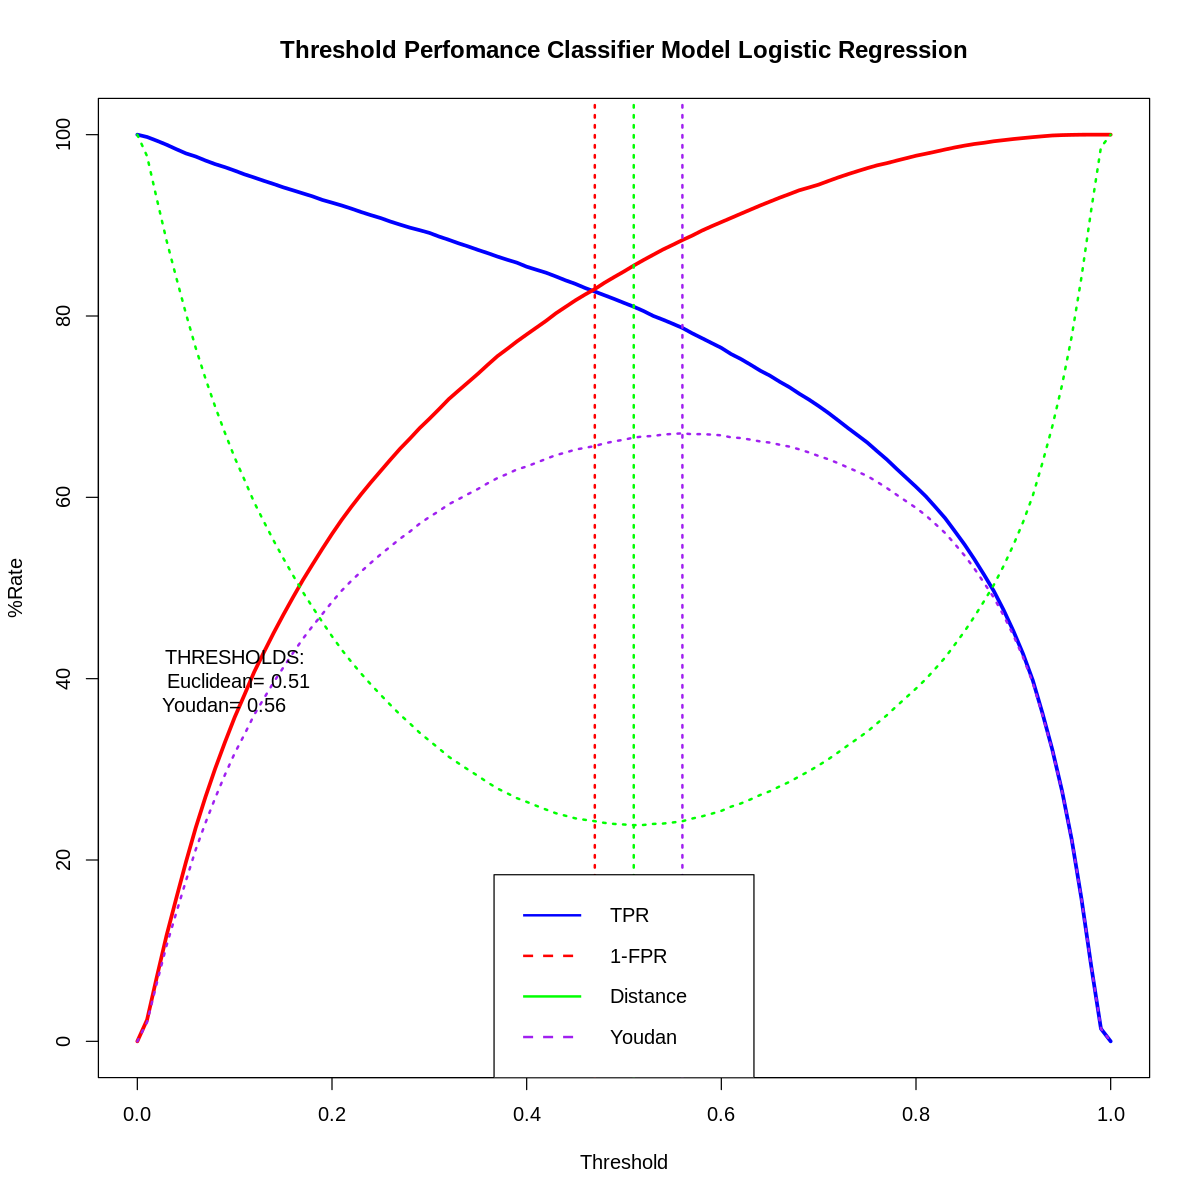

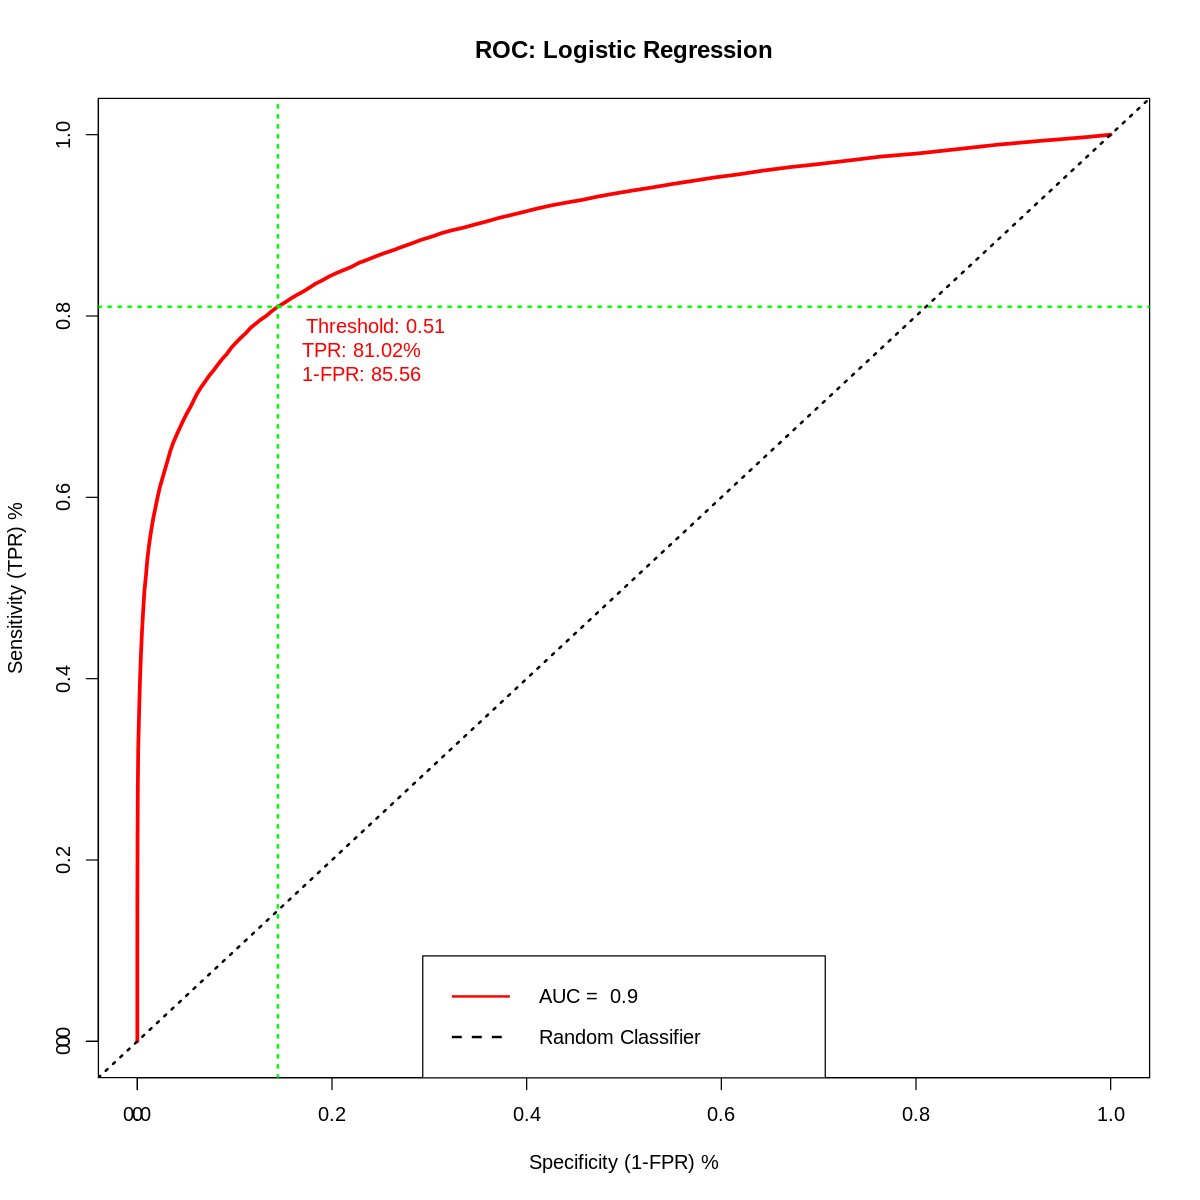

In [64]:
Lgm<-LogisticRegressionModel(training_data,testing_data,plot=TRUE,OUTPUT_FIELD)
result<-Lgm$result

### Visualize Threshold performance plot and ROC curve

#### Threshold performance plot 
The best threshold for a model is detemined from a performance plot to get the maximum of correct prediction after converting a probablitlies to a labels of classes

#### ROC curve
The Roc curve show a performance of a classifer with a area under a curve of value 0.9 on a test dataset


### Logistic Curve 

This show that the suitable threshold is between 0.49-0.51 since the data points represent a satisfied passenger( blue point) seem to be moslty fit on a curve above 0.5 on a Y axis which represent propability. Where on the other hand for neutral or dissatisfied passenger (red point) are more likey to locate below a propabilites of 0.5

[1] "Logistic Plot"


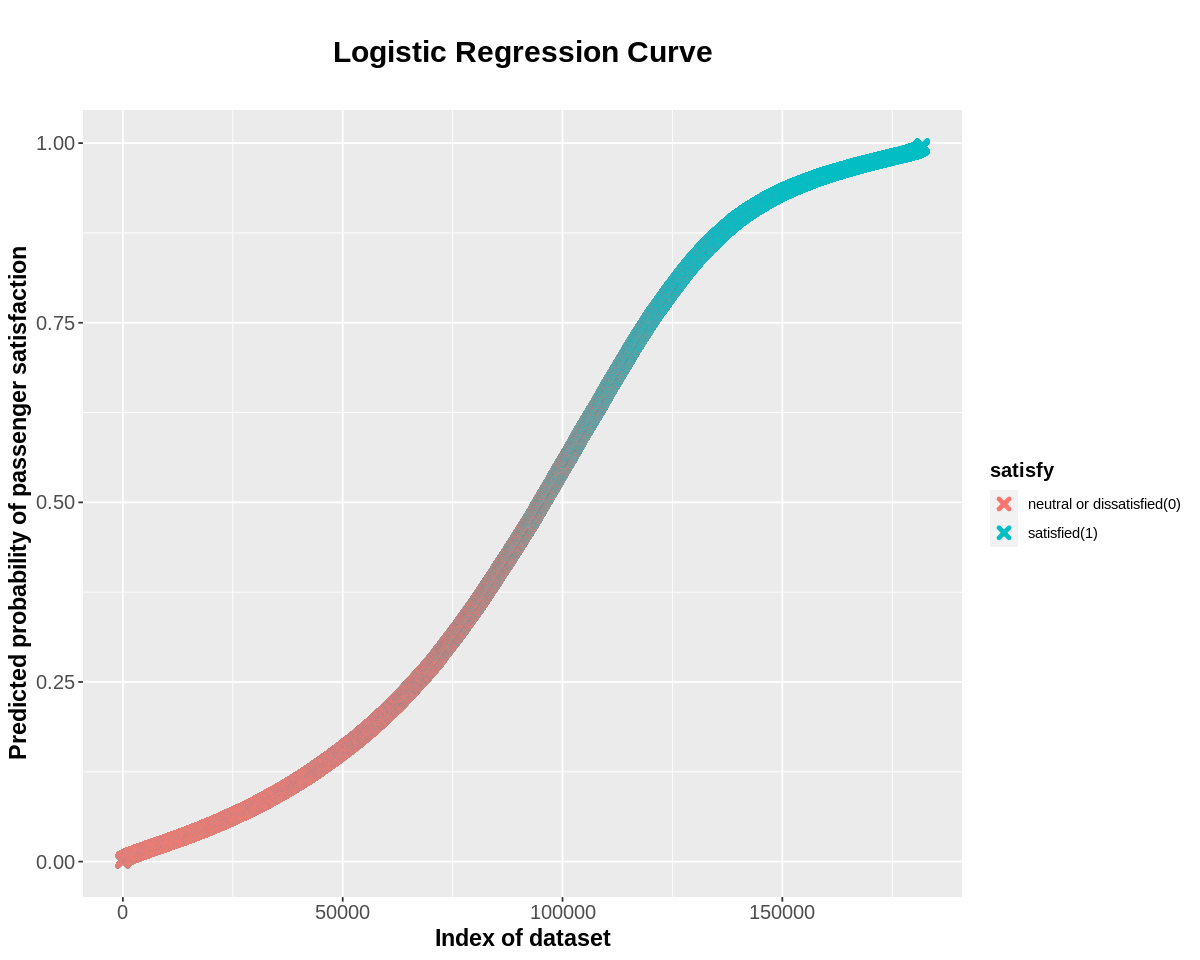

In [65]:
options(repr.plot.width = 10, repr.plot.height = 8)
y_train<-training_data[,OUTPUT_FIELD]
LogisticCurve_plot(Lgm$model,y_train)


In [66]:
df <-unlist(result[-which(names(result) %in%c("pred_labels","gt","proba"))])
#allResults<-
allResults<-data.frame(LogisticRegression=unlist(df))
allResults

,LogisticRegression
,<dbl>
TP,3.097600e+04
FN,7.255000e+03
FP,5.731000e+03
TN,3.396600e+04
F1,8.267101e+01
acc,8.333590e+01
pgood,8.438717e+01
pbad,8.239975e+01
FPR,1.443686e+01


### Confusion matrix 

Confusion shows a number of corret prediction ***(True positive for predicting a passenger who is satisfied correctly and True Negative for predict neutral or dissatisfactied correctly)*** and wrong prediction ***( False Positive for predicting passenger that neutral or dissatisfied to be satisfeid and False negative for predicting neutral or dissatisfied as satisfied)***

[1] "ACCURACY :  83.3358998049482 , PRECISION:  84.3871741084807 , RECALL:  81.0232533807643 , AUC :  0.902973894070318 F1 score: 82.6710080333075 Loss : 0.391884648038423 Threshold : 0.51"


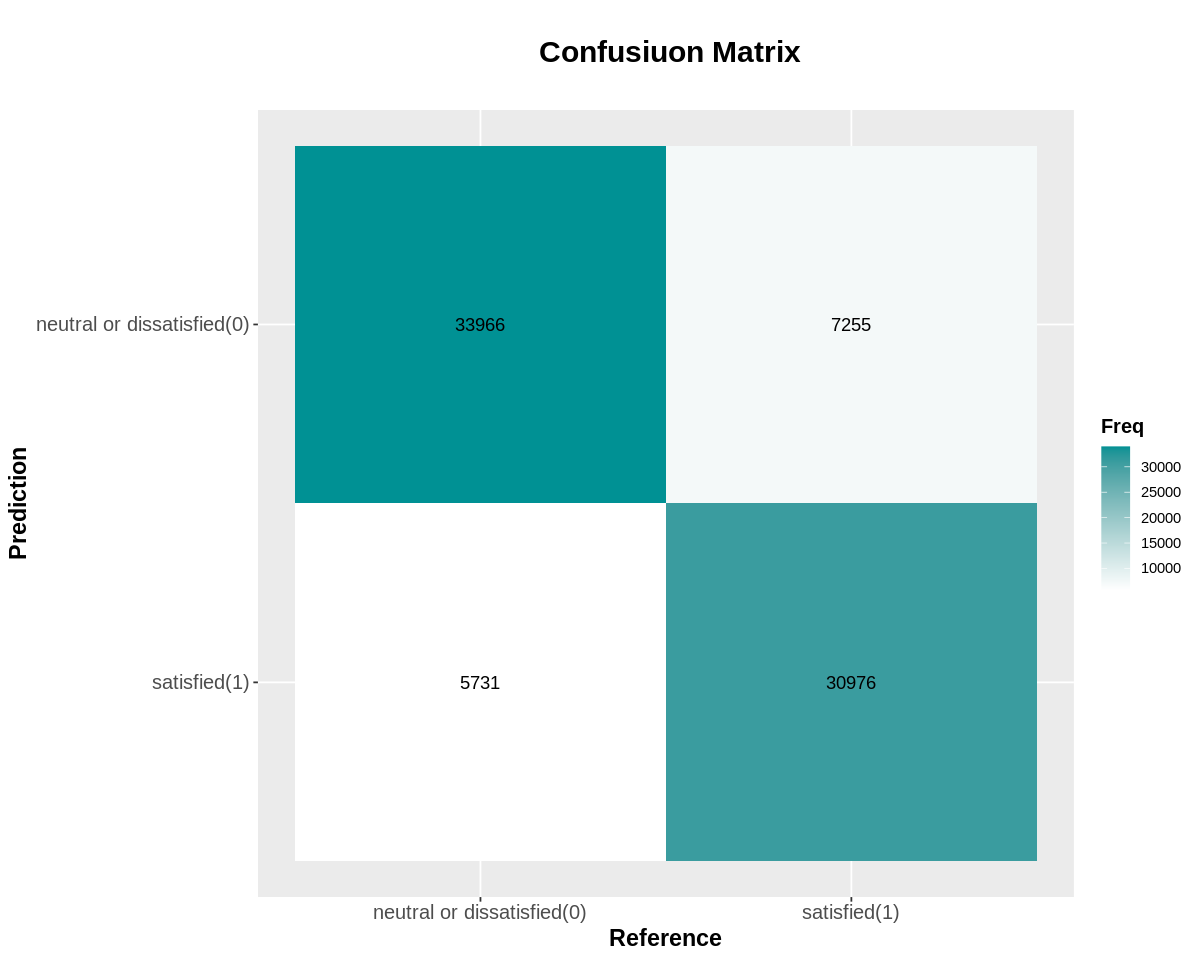

In [67]:
ConfusionMatrix_plot(result$gt,result$pred_labels)
accuracy<-result$acc
precision<-result$pgood
recall<-result$TPR
auc <- result$AUC
f1_score <- F1_score(precision,recall)
loss <- BCE_loss(result$gt,result$proba) 
threshold<- result$threshold
print(paste("ACCURACY : ", accuracy,
            ", PRECISION: ", precision,
            ", RECALL: ", recall, 
            ", AUC : ",auc,
            "F1 score:", f1_score,
            "Loss :", loss,
            "Threshold :", threshold))

The result from Confusion matrix show us that logistic regression show that this model can distinguish between  

### Visualize a coefficient of Logistic Regression

By visualize a value of coefficent or a weight using a bar chart, we can understand which fields of data have an impact on a model for prediciting which passenger is ***satisfied*** and ***neutral or dissatisfied*** 

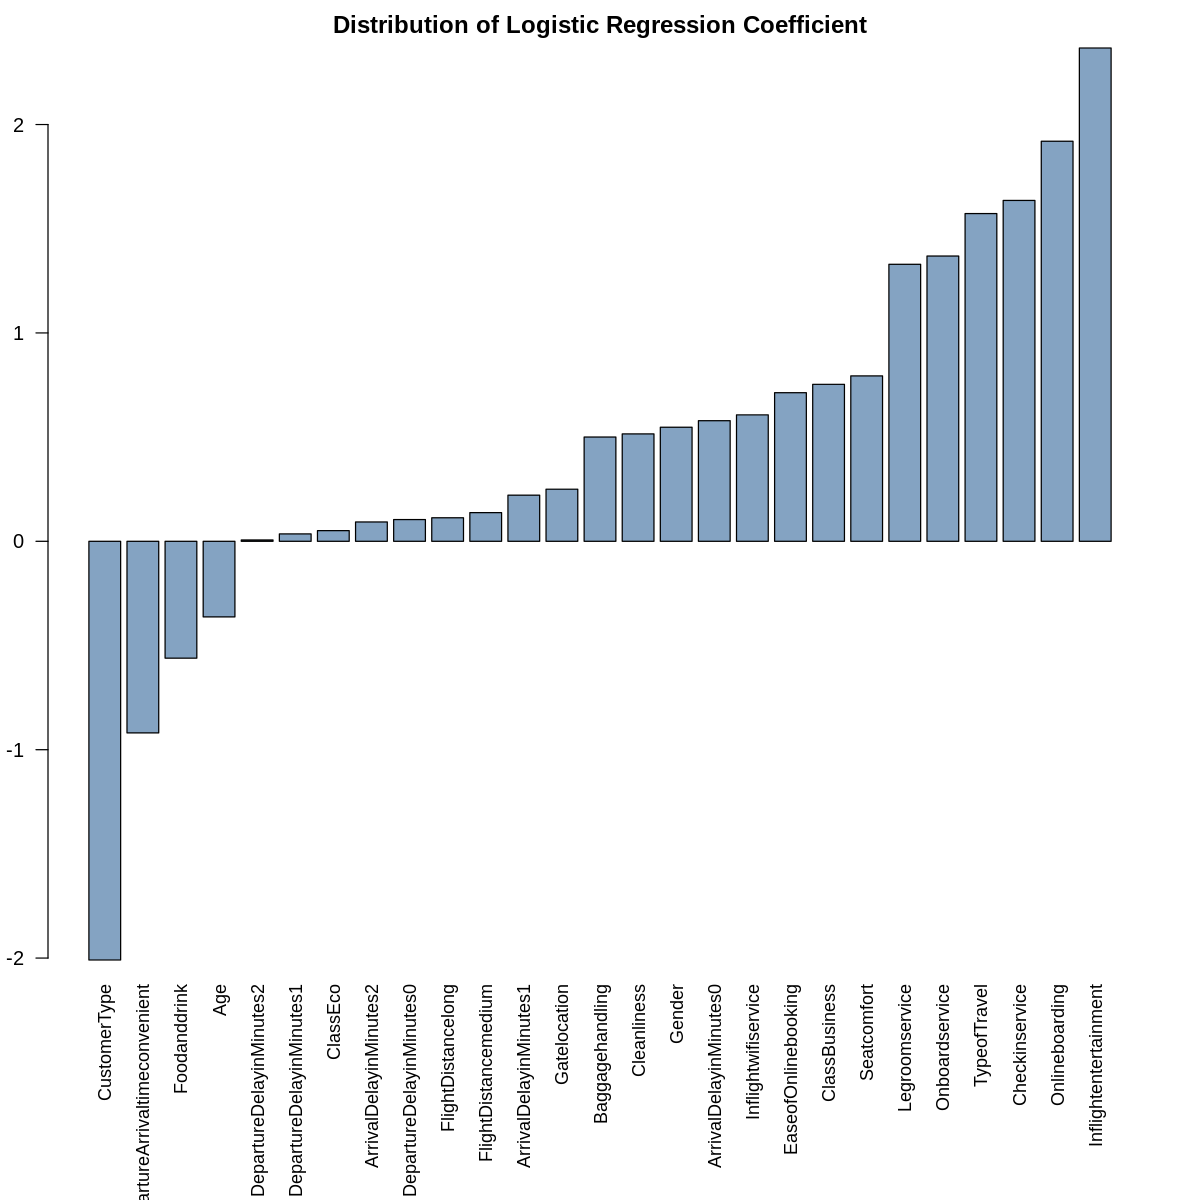

In [68]:
LogisticCoeff_plot(Lgm$model)

The bar chart show that the field with coeffient with neagtive value such as  ***('CustomerType'),('DepatureArrivalTimeconvient'),('Food and Drink') and ('Age')*** have an impact on a model for predicting a customer who is neural or dissatisfied.


And for a field which have clearly an impact on predicting a satisfied passnger are ***('Inflightentertainment'),('Onlineboarding'),('Checkinservice'),('TypeofTravel'),('Onboardservice') and ('legroomservice')*** which have a high value of positive coefficeint. For other fields that have positive value of coefficents such as ("Gatelocation"),("Baggagehandling") and ("Gender") have a very less impact on a model prediction which can be remove to reduce the complexity of a data feeding to a model which is called Dimisionality reduciton.


### K-FOLD Cross validation on Logistic regression

To prevent an overfitting during a training, a team decide to experiment a model training wiht K-fold cross validation to ensure the generalization of a model.

In [69]:
# K-FOLD
KFOLDS          <- 10  # Number of folded experiments
dataset<-stratifiedDataset(processed_data)
measures<-runExperiment(dataset = dataset,FUN = LogisticRegressionModel)

[1] "FOLD : , 1"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] "FOLD : , 2"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] "FOLD : , 3"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] "FOLD : , 4"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] "FOLD : , 5"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] "FOLD : , 6"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] "FOLD : , 7"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] "FOLD : , 8"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] "FOLD : , 9"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


[1] "FOLD : , 10"


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


In [70]:
# Display a result of a model using K-fold crossvalidation
print("Result of each Fold")
data.frame(fold=(t(measures$allresults)))
print("Average result of each Fold")
t(measures$means)

[1] "Result of each Fold"


,fold.1,fold.2,fold.3,fold.4,fold.5,fold.6,fold.7,fold.8,fold.9,fold.10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TP,1.029000e+04,1.029300e+04,1.025200e+04,1.026100e+04,1.039900e+04,1.040800e+04,1.048900e+04,1.031200e+04,1.049200e+04,1.026200e+04
FN,2.462000e+03,2.459000e+03,2.500000e+03,2.491000e+03,2.353000e+03,2.343000e+03,2.262000e+03,2.439000e+03,2.259000e+03,2.489000e+03
FP,1.803000e+03,1.862000e+03,1.815000e+03,1.831000e+03,2.004000e+03,2.001000e+03,2.132000e+03,1.831000e+03,2.152000e+03,1.853000e+03
TN,1.142200e+04,1.136300e+04,1.141000e+04,1.139400e+04,1.122100e+04,1.122300e+04,1.109200e+04,1.139300e+04,1.107200e+04,1.137100e+04
F1,8.283357e+01,8.265146e+01,8.261413e+01,8.260345e+01,8.267939e+01,8.273450e+01,8.268170e+01,8.284727e+01,8.263044e+01,8.253841e+01
acc,8.358163e+01,8.336605e+01,8.338915e+01,8.336221e+01,8.322747e+01,8.327623e+01,8.308373e+01,8.356112e+01,8.301829e+01,8.328393e+01
pgood,8.509055e+01,8.468120e+01,8.495898e+01,8.485776e+01,8.384262e+01,8.387461e+01,8.310752e+01,8.492135e+01,8.298007e+01,8.470491e+01
pbad,8.226736e+01,8.220952e+01,8.202732e+01,8.205978e+01,8.266539e+01,8.272888e+01,8.306126e+01,8.236698e+01,8.305453e+01,8.204185e+01
FPR,1.363327e+01,1.407940e+01,1.372401e+01,1.384499e+01,1.515312e+01,1.513158e+01,1.612220e+01,1.384604e+01,1.627344e+01,1.401240e+01


[1] "Average result of each Fold"


TP,FN,FP,TN,F1,acc,pgood,pbad,FPR,TPR,TNR,MCC,threshold,AUC
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10345,2405,1928,11296,82.68,83.31,84.3,82.45,14.58,81.13,85.42,0.67,0.51,0.9


After the training is done, we can visualize at the result of each fold during training. We can see that after applying ***K-fold cross validation***, The number of ***True positive, False positive, True negative and False Negative*** is small than a number in a result of model without ***K-fold cross validation**. This is because when the K-Fold is apply, it divide a dataset smaller number of group depending on the value of K. Hence the number of testing set use for evaluating a result get split into a smaller number of dataset.

But for other metrics such as ***F1 score, Accuracy and Area Under the curve(AUC)*** is very close to the result from model without ***K-Fold***. As a conclusion applying ***K-fold cross-validation*** to logistic regression on passenger statisfaction dataset doesn not result in huge different but it does ensure that the model that trained does generalized well.


In [71]:
# Create a data frame to compare results from different experiments
allResults<-cbind(allResults,data.frame(Logistic_with_Kfold=unlist(measures$means)))
allResults

,LogisticRegression,Logistic_with_Kfold
,<dbl>,<dbl>
TP,3.097600e+04,10345.00
FN,7.255000e+03,2405.00
FP,5.731000e+03,1928.00
TN,3.396600e+04,11296.00
F1,8.267101e+01,82.68
acc,8.333590e+01,83.31
pgood,8.438717e+01,84.30
pbad,8.239975e+01,82.45
FPR,1.443686e+01,14.58


### Decision Tree

Decsion Tree is a tree based algorithms which doesn't need dataset to be linear seperable. It can handle a data with a missing values and outlier. It can be used in both classification and regression.

It can work well with both linear seperable and non seperable it is suitable for classifying a satifation of customer. Since, passenger dataset contains complex relationshi between each fields such as fields containg rating scale of cutomer in each categories.

In [72]:

# Select field for Decsion Tree
OUTPUT_FIELD = "satisfactionv2"

select_field<-c('satisfactionv2',
               'Gender',
                'CustomerType',
                'TypeofTravel',
                'ClassBusiness',
                'ClassEco',
                'ClassEco.Plus',
#                 'DepartureDelayinMinutes0',
#                 'DepartureDelayinMinutes1',
#                 'DepartureDelayinMinutes2',
#                 'DepartureDelayinMinutes3',
#                 'ArrivalDelayinMinutes0',
#                 'ArrivalDelayinMinutes1',
#                 'ArrivalDelayinMinutes2',
#                 'ArrivalDelayinMinutes3',
                'Age',
                'Seatcomfort',
                'DepartureArrivaltimeconvenient',
                'Foodanddrink',
                'Gatelocation',
                'Inflightwifiservice',
                'Inflightentertainment',
               'EaseofOnlinebooking',
                 'Onboardservice',
                 'Legroomservice',
                 'Baggagehandling',
                 'Checkinservice',
                 'Cleanliness',
               'Onlineboarding'
               )

print("Select Fields")
 print((select_field))


selected_data<-processed_data[,select_field]

selected_data<-selected_data[sample(nrow(selected_data)),]
training_records<-round(nrow(selected_data)*(70/100))
training_data <- selected_data[1:training_records,]
testing_data <- selected_data[-(1:training_records),]

print(paste("Number of Training",nrow(training_data)))
print(paste("Number of Testing",nrow(testing_data)))

DecisionTree<-function(training_data, testing_data,plot=TRUE,output_field="satisfactionv2"){

# Training data
x_train<-training_data[,names(training_data [-which(names(training_data)%in% output_field)])]
y_train<-training_data[,output_field]
# Testing data
x_test<-testing_data[,names(training_data [-which(names(testing_data)%in% output_field)])]
y_test<-testing_data[,output_field]



DTmodel<-C50::C5.0(x=x_train,
                  y=factor(y_train),
                  ,
                  trials=1)
    
#y_pred<-predict()
    
    
class_proba<-predict(DTmodel, newdata=x_test, type="prob")

# Get the column index with the class label
classIndex<-which(as.numeric(colnames(class_proba))==1)

# Get the probabilities for classifying the satisfaction
y_proba<-class_proba[,classIndex]


title<-'Decision Tree'
results<-NdetermineThreshold(test_expected=y_test,
                                test_predicted=y_proba,
                                plot=plot,
                                title=title)


    
return(list("model" = DTmodel, "result" = results))
}

[1] "Select Fields"
 [1] "satisfactionv2"                 "Gender"                        
 [3] "CustomerType"                   "TypeofTravel"                  
 [5] "ClassBusiness"                  "ClassEco"                      
 [7] "ClassEco.Plus"                  "Age"                           
 [9] "Seatcomfort"                    "DepartureArrivaltimeconvenient"
[11] "Foodanddrink"                   "Gatelocation"                  
[13] "Inflightwifiservice"            "Inflightentertainment"         
[15] "EaseofOnlinebooking"            "Onboardservice"                
[17] "Legroomservice"                 "Baggagehandling"               
[19] "Checkinservice"                 "Cleanliness"                   
[21] "Onlineboarding"                
[1] "Number of Training 181832"
[1] "Number of Testing 77928"


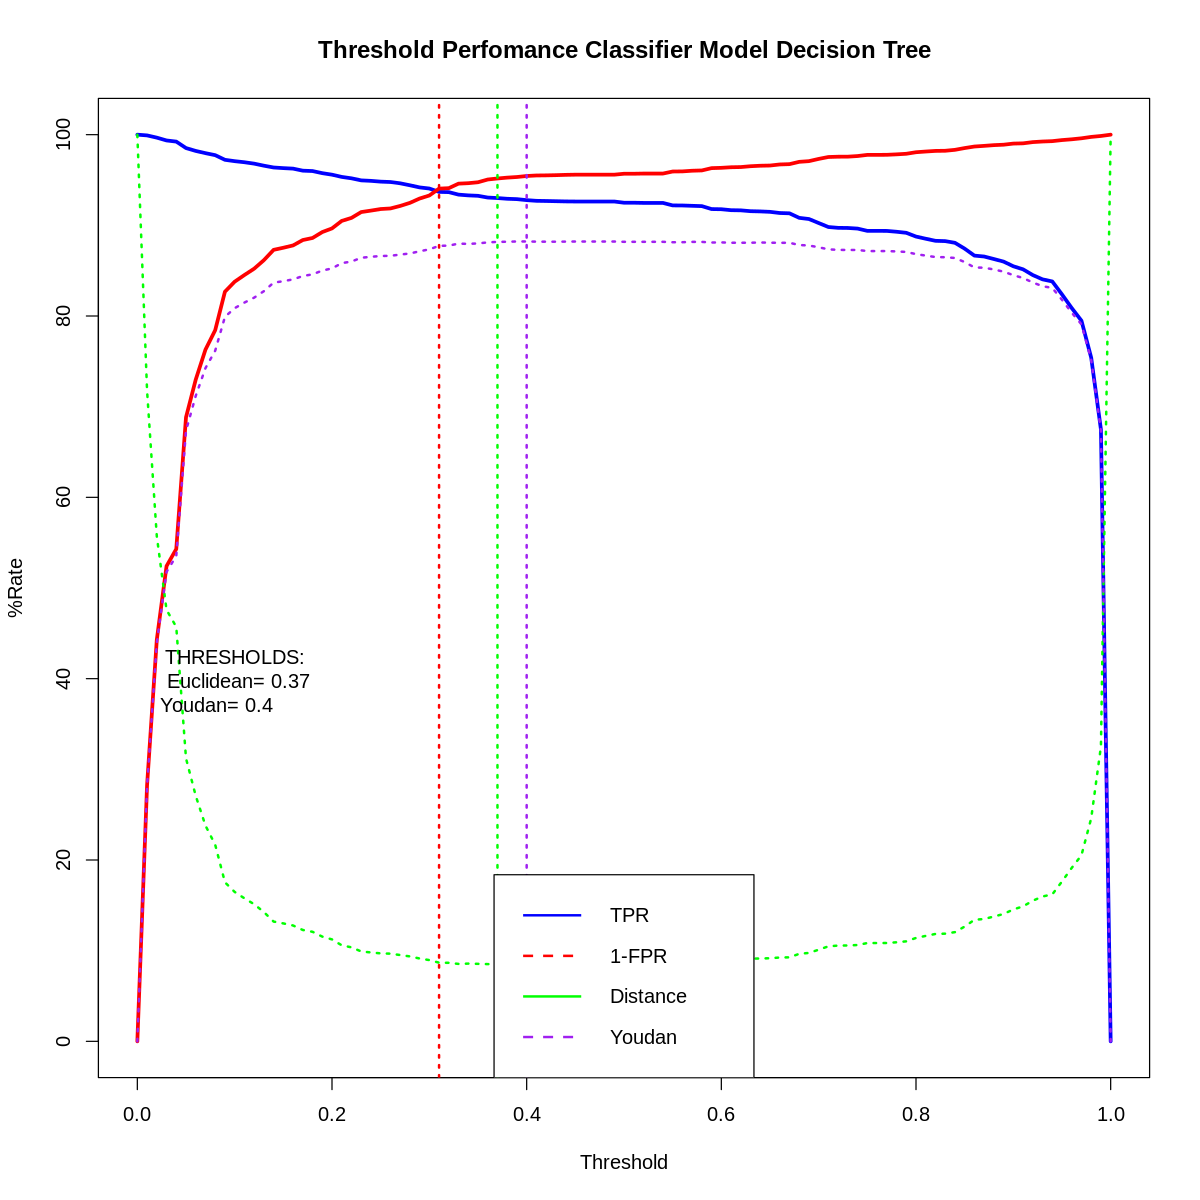

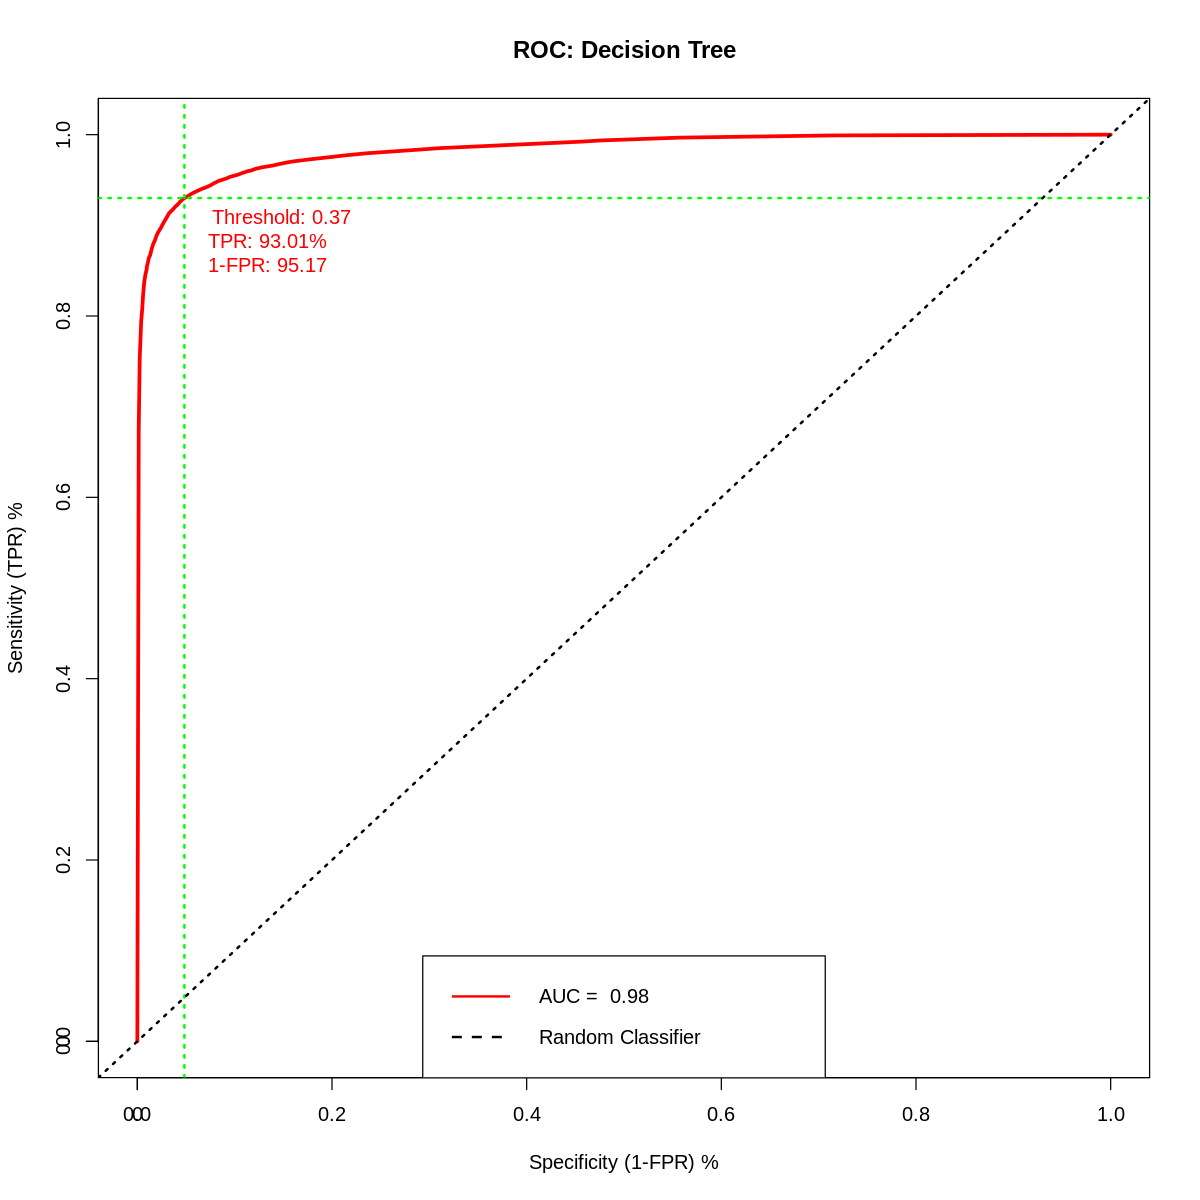

In [73]:
DT<-DecisionTree(training_data,testing_data,plot=TRUE,OUTPUT_FIELD)
result<-DT$result


### Visualize Threshold performance plot and ROC curve

#### Threshold performance plot
The best threshold for a model is detemined from a performance plot to get the maximum of correct prediction after converting a probablitlies to a labels of classes at threshold value of 0.43

#### ROC curve
The Roc curve show a performance of a classifer with a area under a curve of value 0.98 on a test dataset which is much higer compare to the area under curve of logistic regression. Also values of specificty is lower and sensitivity is higher than logistic regression


[1] "ACCURACY :  94.1099476439791 , PRECISION:  94.8681644538242 , RECALL:  93.0096121107357 , AUC :  0.983154403383702 F1 score: 93.9296955590235 Loss : 0.157225110169743 Threshold : 0.37"


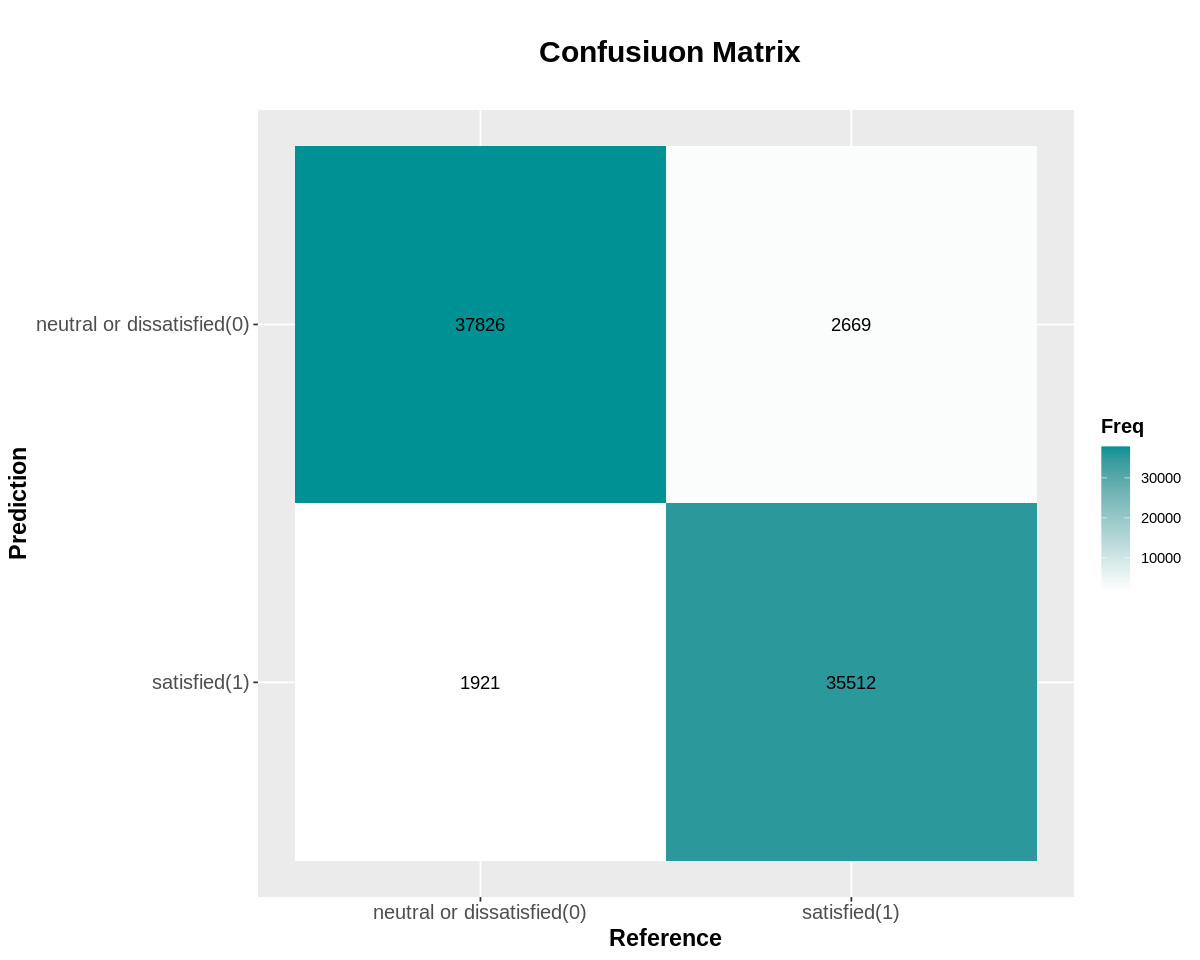

In [74]:
options(repr.plot.width = 10, repr.plot.height = 8)
ConfusionMatrix_plot(result$gt,result$pred_labels)

accuracy<-result$acc
precision<-result$pgood
recall<-result$TPR
auc <- result$AUC
f1_score <- F1_score(precision,recall)
loss <- BCE_loss(result$gt,result$proba)
threshold<- result$threshold
print(paste("ACCURACY : ", accuracy,
            ", PRECISION: ", precision,
            ", RECALL: ", recall, 
            ", AUC : ",auc,
            "F1 score:", f1_score,
            "Loss :", loss,
             "Threshold :", threshold))

The confusion matrix of Decision Tree clearly shown a different of number in of correct and incorrect prediction simialr to logistice regression but with huge different in number of False Negative. 

The Final accuracy for Decison Tree model is 94 % which is very high compare to logistice regression. These proves that passenger dataset contains a complex relationship between each field, the information in dataset tends to non-linear seperable which is the reason why tree based model outperform liner classifier like logistic regression

#### Importance Variable (Fields) in Decison Tree

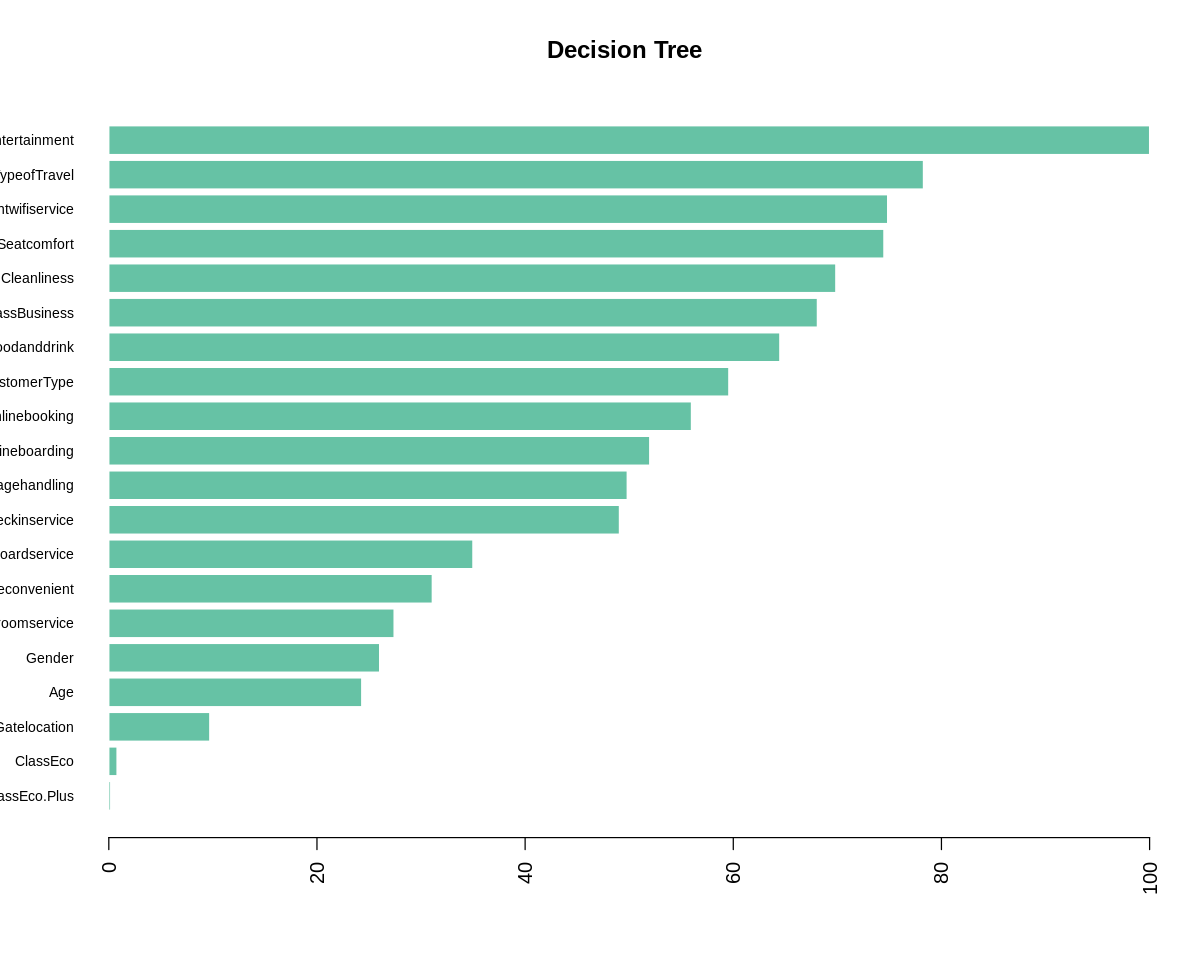

In [75]:
TreeCoeff_plot(DT$model)

In [76]:
df <-unlist(result[-which(names(result) %in%c("pred_labels","gt","proba"))])
#allResults<-
allResults<-cbind(allResults,data.frame(DecisionTree=unlist(df)))
allResults

,LogisticRegression,Logistic_with_Kfold,DecisionTree
,<dbl>,<dbl>,<dbl>
TP,3.097600e+04,10345.00,3.551200e+04
FN,7.255000e+03,2405.00,2.669000e+03
FP,5.731000e+03,1928.00,1.921000e+03
TN,3.396600e+04,11296.00,3.782600e+04
F1,8.267101e+01,82.68,9.392970e+01
acc,8.333590e+01,83.31,9.410995e+01
pgood,8.438717e+01,84.30,9.486816e+01
pbad,8.239975e+01,82.45,9.340906e+01
FPR,1.443686e+01,14.58,4.833069e+00


### Decision Tree with K-Fold Cross Validation

In [77]:
KFOLDS <- 10  # Number of folded experiments
dataset<-stratifiedDataset(processed_data)
measures<-runExperiment(dataset = dataset,FUN = DecisionTree)

[1] "FOLD : , 1"
[1] "FOLD : , 2"
[1] "FOLD : , 3"
[1] "FOLD : , 4"
[1] "FOLD : , 5"
[1] "FOLD : , 6"
[1] "FOLD : , 7"
[1] "FOLD : , 8"
[1] "FOLD : , 9"
[1] "FOLD : , 10"


In [78]:
data.frame(t(measures$allresults))

data.frame(measures$means)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TP,1.197500e+04,1.195500e+04,1.192200e+04,1.192900e+04,1.192500e+04,1.194600e+04,1.198300e+04,1.191700e+04,1.195400e+04,1.191400e+04
FN,7.770000e+02,7.970000e+02,8.300000e+02,8.230000e+02,8.270000e+02,8.050000e+02,7.680000e+02,8.340000e+02,7.970000e+02,8.370000e+02
FP,5.810000e+02,5.530000e+02,5.970000e+02,6.010000e+02,5.760000e+02,6.040000e+02,6.200000e+02,5.350000e+02,6.000000e+02,5.430000e+02
TN,1.264400e+04,1.267200e+04,1.262800e+04,1.262400e+04,1.264900e+04,1.262000e+04,1.260400e+04,1.268900e+04,1.262400e+04,1.268100e+04
F1,9.463411e+01,9.465558e+01,9.435321e+01,9.436753e+01,9.444422e+01,9.443105e+01,9.452552e+01,9.456811e+01,9.447935e+01,9.452555e+01
acc,9.477230e+01,9.480310e+01,9.450668e+01,9.451823e+01,9.459907e+01,9.457555e+01,9.465640e+01,9.472955e+01,9.462175e+01,9.468720e+01
pgood,9.537273e+01,9.557883e+01,9.523125e+01,9.520351e+01,9.539237e+01,9.518725e+01,9.508054e+01,9.570350e+01,9.522065e+01,9.564101e+01
pbad,9.421057e+01,9.408271e+01,9.383266e+01,9.387968e+01,9.386316e+01,9.400372e+01,9.425666e+01,9.383273e+01,9.406155e+01,9.380826e+01
FPR,4.393195e+00,4.181474e+00,4.514178e+00,4.544423e+00,4.355388e+00,4.567453e+00,4.688445e+00,4.045675e+00,4.537205e+00,4.106171e+00


TP,FN,FP,TN,F1,acc,pgood,pbad,FPR,TPR,TNR,MCC,threshold,AUC
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11942,809,581,12643,94.5,94.65,95.36,93.98,4.39,93.65,95.61,0.89,0.38,0.99


In [79]:
# Create a data frame to compare results from different experiments
allResults<-cbind(allResults,data.frame(DecisionTree_with_Kfold=unlist(measures$means)))
allResults


,LogisticRegression,Logistic_with_Kfold,DecisionTree,DecisionTree_with_Kfold
,<dbl>,<dbl>,<dbl>,<dbl>
TP,3.097600e+04,10345.00,3.551200e+04,11942.00
FN,7.255000e+03,2405.00,2.669000e+03,809.00
FP,5.731000e+03,1928.00,1.921000e+03,581.00
TN,3.396600e+04,11296.00,3.782600e+04,12643.00
F1,8.267101e+01,82.68,9.392970e+01,94.50
acc,8.333590e+01,83.31,9.410995e+01,94.65
pgood,8.438717e+01,84.30,9.486816e+01,95.36
pbad,8.239975e+01,82.45,9.340906e+01,93.98
FPR,1.443686e+01,14.58,4.833069e+00,4.39


In [80]:
#Clear cache prevent kernel kill
ls()
rm(list=setdiff(ls(),c("processed_data","DecisionTree","allResults","training_data","testing_data","OUTPUT_FIELD","combined")))
source('utils.R')
ls()

[1] "accuracy"                "allocateFoldID"         
 [3] "allResults"              "auc"                    
 [5] "auroc"                   "BCE_loss"               
 [7] "combined"                "ConfusionMatrix_plot"   
 [9] "dataset"                 "DecisionTree"           
[11] "df"                      "DT"                     
[13] "eval_model"              "f1_score"               
[15] "F1_score"                "ForestCoeff_plot"       
[17] "KFOLDS"                  "Lgm"                    
[19] "LogisticCoeff_plot"      "LogisticCurve_plot"     
[21] "LogisticRegressionModel" "loss"                   
[23] "measures"                "myModelFormula"         
[25] "NConvertClass"           "NdetermineThreshold"    
[27] "OUTPUT_FIELD"            "precision"              
[29] "processed_data"          "recall"                 
[31] "result"                  "roc_plot"               
[33] "runExperiment"           "select_field"           
[35] "selected_data"           "stratifiedDataset"      
[37] "stratifiedSplit"         "testing_data"           
[39] "threshold"               "training_data"          
[41] "training_records"        "TreeCoeff_plot"         
[43] "y_train"

[1] "allocateFoldID"       "allResults"           "auroc"               
 [4] "BCE_loss"             "combined"             "ConfusionMatrix_plot"
 [7] "DecisionTree"         "eval_model"           "F1_score"            
[10] "ForestCoeff_plot"     "LogisticCoeff_plot"   "LogisticCurve_plot"  
[13] "NConvertClass"        "NdetermineThreshold"  "OUTPUT_FIELD"        
[16] "processed_data"       "roc_plot"             "runExperiment"       
[19] "stratifiedDataset"    "stratifiedSplit"      "testing_data"        
[22] "training_data"        "TreeCoeff_plot"

## Decision Tree on unclean dataset

In [81]:
OUTPUT_FIELD = "satisfactionv2"
source('utils.R')
selected_data<-NConvertClass(combined,OUTPUT_FIELD)

selected_data<-selected_data[sample(nrow(selected_data)),]
training_records<-round(nrow(selected_data)*(70/100))
training_data <- selected_data[1:training_records,]
testing_data <- selected_data[-(1:training_records),]

print(paste("Number of Training",nrow(training_data)))
print(paste("Number of Testing",nrow(testing_data)))
head(training_data)

[1] "Number of Training 181832"
[1] "Number of Testing 77928"


,satisfactionv2,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Seatcomfort,DepartureArrivaltimeconvenient,Foodanddrink,⋯,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding,DepartureDelayinMinutes,ArrivalDelayinMinutes,Inflightservice
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
32065,1,Male,Loyal Customer,41,Personal Travel,Eco,1679,4,0,4,⋯,4,3,4,4,5,5,4,0,0,NA
79686,0,Male,Loyal Customer,42,Business travel,Business,1532,4,4,4,⋯,3,3,3,3,4,3,5,0,0,NA
37494,1,Male,Loyal Customer,50,Personal Travel,Eco,2546,4,5,4,⋯,3,5,2,5,3,5,3,3,0,NA
71770,0,Female,Loyal Customer,48,Business travel,Business,1702,5,5,5,⋯,2,2,2,2,5,2,4,36,33,NA
15847,1,Male,Loyal Customer,39,Personal Travel,Eco,2044,2,4,3,⋯,3,4,2,4,5,5,3,45,26,NA
240060,0,Male,Loyal Customer,52,Business travel,Business,3176,5,3,2,⋯,3,5,4,5,5,4,4,6,0,5


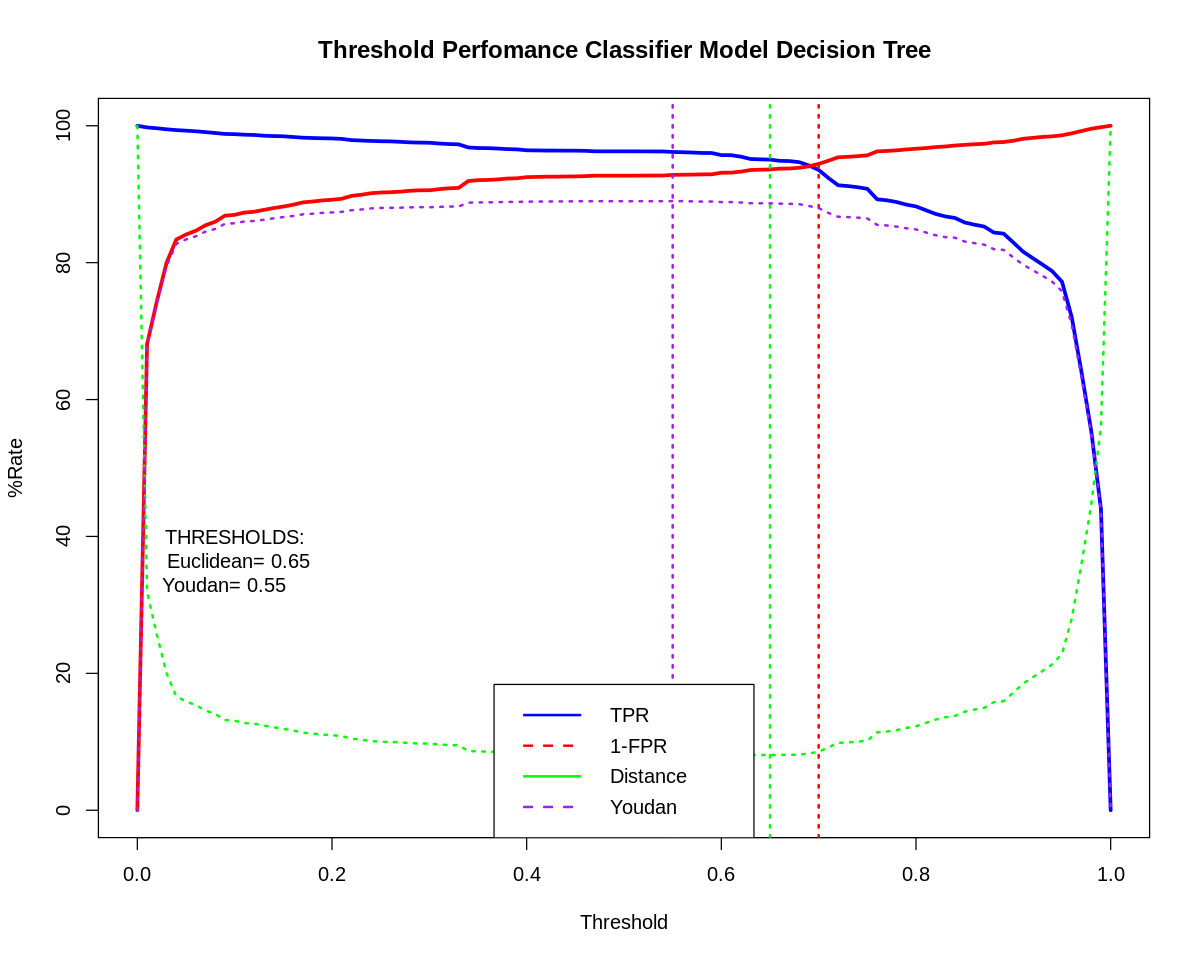

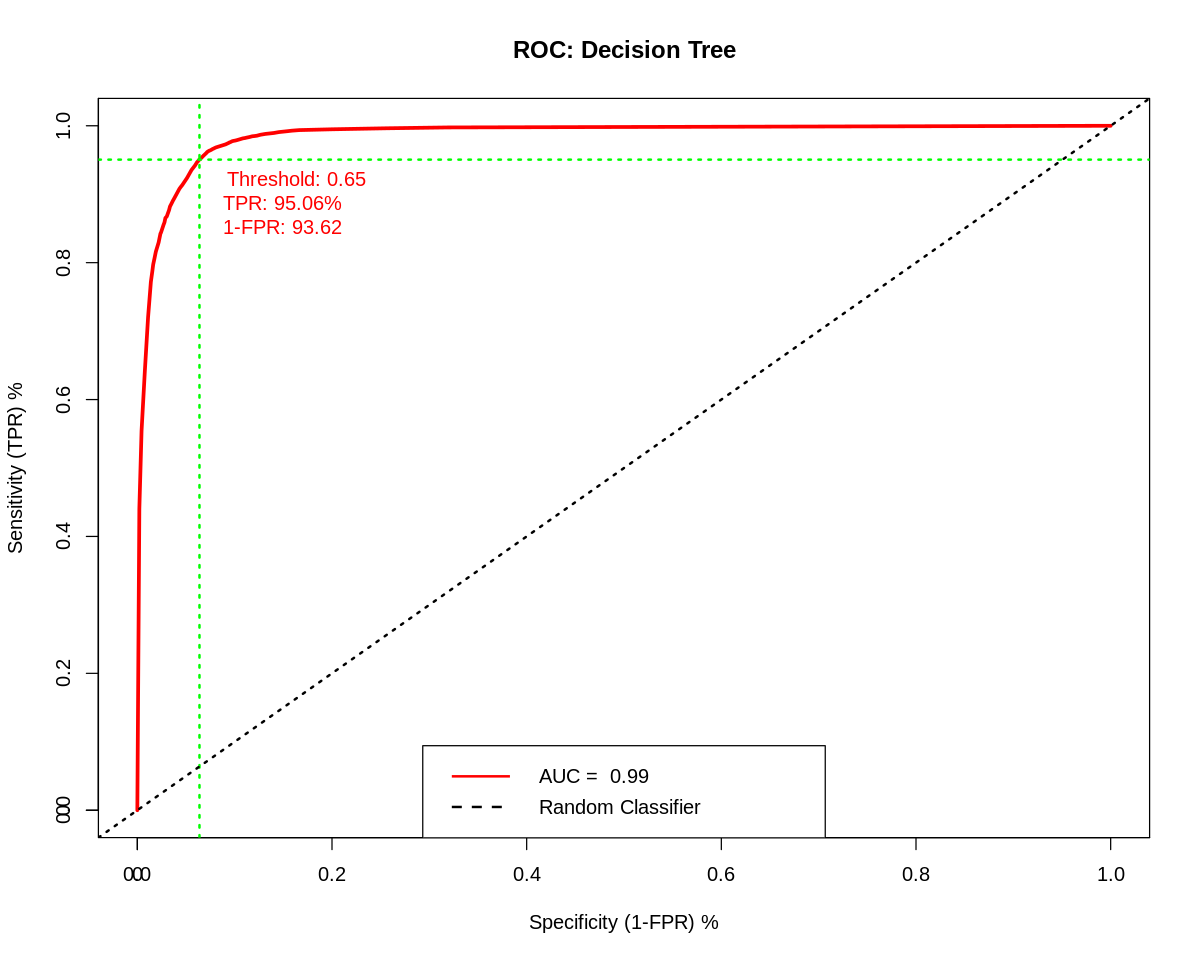

In [82]:
uncleanDT<-DecisionTree(training_data,testing_data,plot=TRUE,OUTPUT_FIELD)

In [83]:
result<-uncleanDT$result


[1] "ACCURACY :  94.3499127399651 , PRECISION:  93.9276292867453 , RECALL:  95.0560382823322 , AUC :  0.985657534035406 F1 score: 94.4884649567514 Loss : 0.148015890622325 Threshold : 0.65"


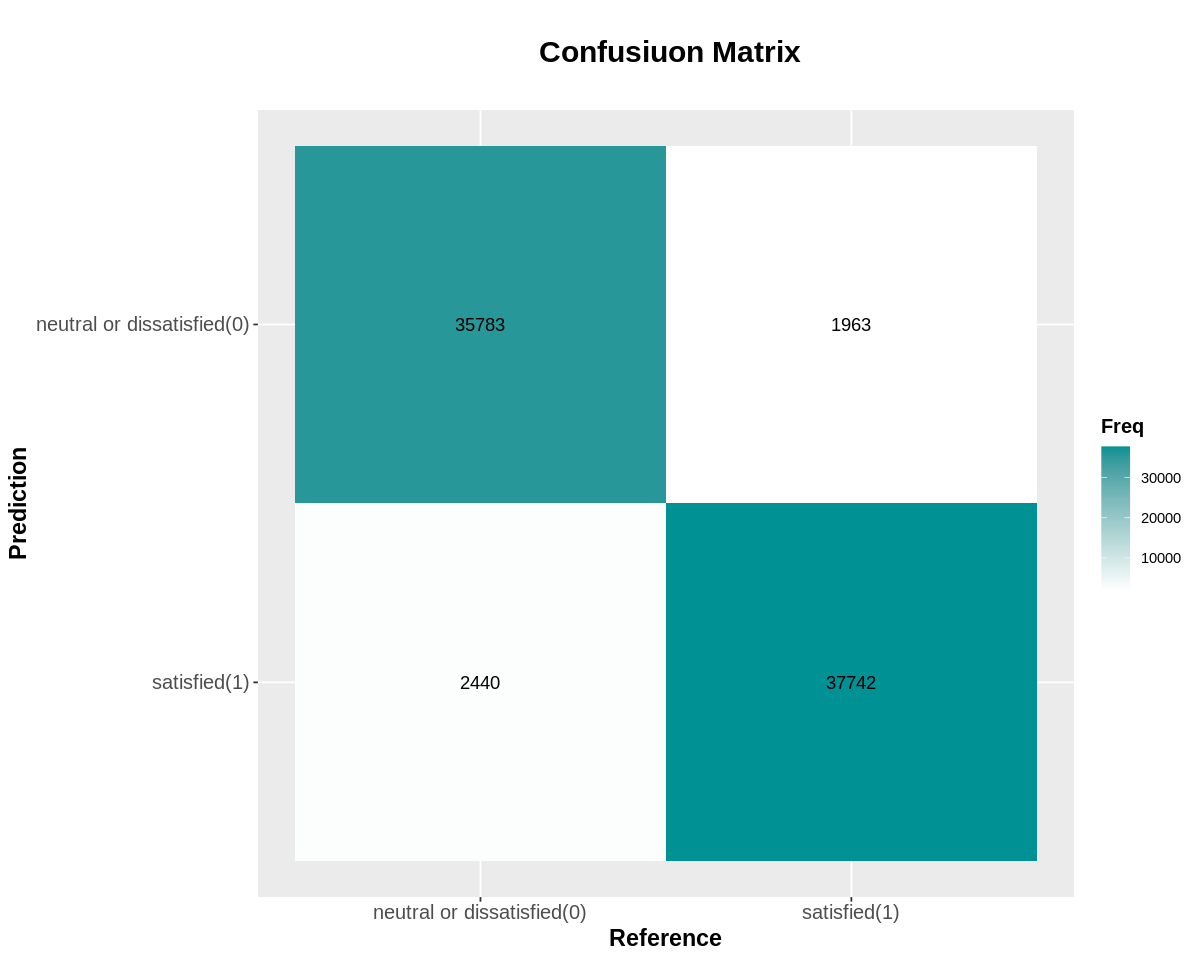

In [84]:
options(repr.plot.width = 10, repr.plot.height = 8)
ConfusionMatrix_plot(result$gt,result$pred_labels)

accuracy<-result$acc
precision<-result$pgood
recall<-result$TPR
auc <- result$AUC
f1_score <- F1_score(precision,recall)
loss <- BCE_loss(as.numeric(result$gt),as.numeric(result$proba))
threshold<- result$threshold
print(paste("ACCURACY : ", accuracy,
            ", PRECISION: ", precision,
            ", RECALL: ", recall, 
            ", AUC : ",auc,
            "F1 score:", f1_score,
            "Loss :", loss,
             "Threshold :", threshold))

In [85]:
df <-unlist(result[-which(names(result) %in%c("pred_labels","gt","proba"))])
#allResults<-
allResults<-cbind(allResults,data.frame(DecisionTree_unclean=unlist(df)))
allResults

,LogisticRegression,Logistic_with_Kfold,DecisionTree,DecisionTree_with_Kfold,DecisionTree_unclean
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TP,3.097600e+04,10345.00,3.551200e+04,11942.00,3.774200e+04
FN,7.255000e+03,2405.00,2.669000e+03,809.00,1.963000e+03
FP,5.731000e+03,1928.00,1.921000e+03,581.00,2.440000e+03
TN,3.396600e+04,11296.00,3.782600e+04,12643.00,3.578300e+04
F1,8.267101e+01,82.68,9.392970e+01,94.50,9.448846e+01
acc,8.333590e+01,83.31,9.410995e+01,94.65,9.434991e+01
pgood,8.438717e+01,84.30,9.486816e+01,95.36,9.392763e+01
pbad,8.239975e+01,82.45,9.340906e+01,93.98,9.479945e+01
FPR,1.443686e+01,14.58,4.833069e+00,4.39,6.383591e+00


## K-fold decision tree with Unclean data


In [86]:
KFOLDS <- 10  # Number of folded experiments
dataset<-stratifiedDataset(selected_data)
measures<-runExperiment(dataset = dataset,FUN = DecisionTree)

[1] "FOLD : , 1"
[1] "FOLD : , 2"
[1] "FOLD : , 3"
[1] "FOLD : , 4"
[1] "FOLD : , 5"
[1] "FOLD : , 6"
[1] "FOLD : , 7"
[1] "FOLD : , 8"
[1] "FOLD : , 9"
[1] "FOLD : , 10"


In [87]:
data.frame(t(measures$allresults))

data.frame(measures$means)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TP,1.271400e+04,1.266100e+04,1.274400e+04,1.266300e+04,1.274000e+04,1.270900e+04,1.266300e+04,1.268600e+04,1.267600e+04,1.270200e+04
FN,5.110000e+02,5.640000e+02,4.810000e+02,5.620000e+02,4.850000e+02,5.150000e+02,5.610000e+02,5.380000e+02,5.480000e+02,5.220000e+02
FP,8.000000e+02,7.680000e+02,8.100000e+02,7.660000e+02,8.250000e+02,7.710000e+02,7.470000e+02,7.670000e+02,8.210000e+02,8.190000e+02
TN,1.195200e+04,1.198400e+04,1.194200e+04,1.198600e+04,1.192700e+04,1.198000e+04,1.200400e+04,1.198400e+04,1.193000e+04,1.193200e+04
F1,9.509705e+01,9.500263e+01,9.517906e+01,9.501763e+01,9.511012e+01,9.518424e+01,9.508898e+01,9.510815e+01,9.487669e+01,9.498598e+01
acc,9.495323e+01,9.487239e+01,9.503022e+01,9.488779e+01,9.495708e+01,9.504909e+01,9.496439e+01,9.497594e+01,9.472955e+01,9.483734e+01
pgood,9.408021e+01,9.428103e+01,9.402390e+01,9.429593e+01,9.391817e+01,9.428042e+01,9.442953e+01,9.429867e+01,9.391717e+01,9.394276e+01
pbad,9.589986e+01,9.550526e+01,9.612815e+01,9.552120e+01,9.609249e+01,9.587835e+01,9.553522e+01,9.570356e+01,9.560827e+01,9.580858e+01
FPR,6.273526e+00,6.022585e+00,6.351945e+00,6.006901e+00,6.469573e+00,6.046585e+00,5.858364e+00,6.015214e+00,6.438711e+00,6.423026e+00


TP,FN,FP,TN,F1,acc,pgood,pbad,FPR,TPR,TNR,MCC,threshold,AUC
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12695,528,789,11962,95.07,94.93,94.15,95.77,6.19,96,93.81,0.9,0.62,0.99


In [88]:
# Create a data frame to compare results from different experiments
allResults<-cbind(allResults,data.frame(DecisionTree_Kfold_Unclean=unlist(measures$means)))
allResults


,LogisticRegression,Logistic_with_Kfold,DecisionTree,DecisionTree_with_Kfold,DecisionTree_unclean,DecisionTree_Kfold_Unclean
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TP,3.097600e+04,10345.00,3.551200e+04,11942.00,3.774200e+04,12695.00
FN,7.255000e+03,2405.00,2.669000e+03,809.00,1.963000e+03,528.00
FP,5.731000e+03,1928.00,1.921000e+03,581.00,2.440000e+03,789.00
TN,3.396600e+04,11296.00,3.782600e+04,12643.00,3.578300e+04,11962.00
F1,8.267101e+01,82.68,9.392970e+01,94.50,9.448846e+01,95.07
acc,8.333590e+01,83.31,9.410995e+01,94.65,9.434991e+01,94.93
pgood,8.438717e+01,84.30,9.486816e+01,95.36,9.392763e+01,94.15
pbad,8.239975e+01,82.45,9.340906e+01,93.98,9.479945e+01,95.77
FPR,1.443686e+01,14.58,4.833069e+00,4.39,6.383591e+00,6.19


### Random Forest Classification

Random Forest is an ensemble learning model in machine learning, It can be use in both regression or classification. It consist of mulitple number of decision tree inside which each tree spit out a prediction of a class and prediction of a class with the most occur or vote from trees become a final result of a model.

Using this model may improve the result from traditional Decision tree but it has longer training time since there are mulitple tree.

#### Random Forest on Clean dataset

In [89]:
# Select field for Decsion Tree
OUTPUT_FIELD = "satisfactionv2"

select_field<-c('satisfactionv2',
               'Gender',
                'CustomerType',
                'TypeofTravel',
                'ClassBusiness',
                'ClassEco',
                'ClassEco.Plus',
#                 'DepartureDelayinMinutes0',
#                 'DepartureDelayinMinutes1',
#                 'DepartureDelayinMinutes2',
#                 'DepartureDelayinMinutes3',
#                 'ArrivalDelayinMinutes0',
#                 'ArrivalDelayinMinutes1',
#                 'ArrivalDelayinMinutes2',
#                 'ArrivalDelayinMinutes3',
                'Age',
                'Seatcomfort',
                'DepartureArrivaltimeconvenient',
                'Foodanddrink',
                'Gatelocation',
                'Inflightwifiservice',
                'Inflightentertainment',
               'EaseofOnlinebooking',
                 'Onboardservice',
                 'Legroomservice',
                 'Baggagehandling',
                 'Checkinservice',
                 'Cleanliness',
               'Onlineboarding'
               )

print("Select Fields")
print((select_field))


selected_data<-processed_data[,select_field]

selected_data<-selected_data[sample(nrow(selected_data)),]
training_records<-round(nrow(selected_data)*(70/100))
training_data <- selected_data[1:training_records,]
testing_data <- selected_data[-(1:training_records),]

print(paste("Number of Training",nrow(training_data)))
print(paste("Number of Testing",nrow(testing_data)))
head(training_data)

[1] "Select Fields"
 [1] "satisfactionv2"                 "Gender"                        
 [3] "CustomerType"                   "TypeofTravel"                  
 [5] "ClassBusiness"                  "ClassEco"                      
 [7] "ClassEco.Plus"                  "Age"                           
 [9] "Seatcomfort"                    "DepartureArrivaltimeconvenient"
[11] "Foodanddrink"                   "Gatelocation"                  
[13] "Inflightwifiservice"            "Inflightentertainment"         
[15] "EaseofOnlinebooking"            "Onboardservice"                
[17] "Legroomservice"                 "Baggagehandling"               
[19] "Checkinservice"                 "Cleanliness"                   
[21] "Onlineboarding"                
[1] "Number of Training 181832"
[1] "Number of Testing 77928"


,satisfactionv2,Gender,CustomerType,TypeofTravel,ClassBusiness,ClassEco,ClassEco.Plus,Age,Seatcomfort,DepartureArrivaltimeconvenient,⋯,Gatelocation,Inflightwifiservice,Inflightentertainment,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
91472,1,0,0,1,1,0,0,0.17808219,0.6,0.6,⋯,0.6,0.8,0.8,0.8,0.8,0.8,0.2,0.6,0.6,0.8
44290,0,1,1,1,0,1,0,0.41095890,0.2,0.8,⋯,0.8,1.0,0.2,1.0,0.8,0.8,0.6,0.8,0.8,1.0
94116,1,0,0,1,1,0,0,0.47945205,1.0,1.0,⋯,1.0,0.6,0.8,0.8,0.8,0.8,0.8,0.8,0.8,1.0
46626,0,0,1,1,0,1,0,0.08219178,0.4,0.4,⋯,0.4,0.6,0.4,0.6,0.8,1.0,0.8,0.8,0.8,0.6
60716,1,0,1,1,1,0,0,0.42465753,0.8,0.8,⋯,1.0,0.4,0.8,0.4,1.0,0.4,0.8,0.6,0.8,0.4
129061,1,0,0,1,0,1,0,0.45205479,1.0,0.2,⋯,0.2,1.0,1.0,1.0,0.2,0.8,0.6,0.6,1.0,1.0


In [90]:
RandomForestClassifier<-function(training_data, testing_data, plot=TRUE, output_field="satisfactionv2"){
    
    
# Training data
x_train<-training_data[,names(training_data [-which(names(training_data)%in% output_field)])]
y_train<-training_data[,output_field]
# Testing data
x_test<-testing_data[,names(training_data [-which(names(testing_data)%in% output_field)])]
y_test<-testing_data[,output_field]



RandForestModel<-randomForest::randomForest(x_train,
                               factor(y_train),
                               ntree=50 ,
                               importance=TRUE,
                               mtry=sqrt(ncol(x_train)),
                               na.action=randomForest::na.roughfix)
    
#y_pred<-predict()
    
    
class_proba<-predict(RandForestModel, newdata=x_test, type="prob")

# Get the column index with the class label
classIndex<-which(as.numeric(colnames(class_proba))==1)

# Get the probabilities for classifying the good loans
y_proba<-class_proba[,classIndex]


title<-'Random Forest'
results<-NdetermineThreshold(test_expected=y_test,
                                test_predicted=y_proba,
                                plot=plot,
                                title=title)

accuracy<-results$acc
precision<-results$pgood
recall<-results$TPR
auc<-results$AUC

    
return(list("model"=RandForestModel,"result"=results))
}



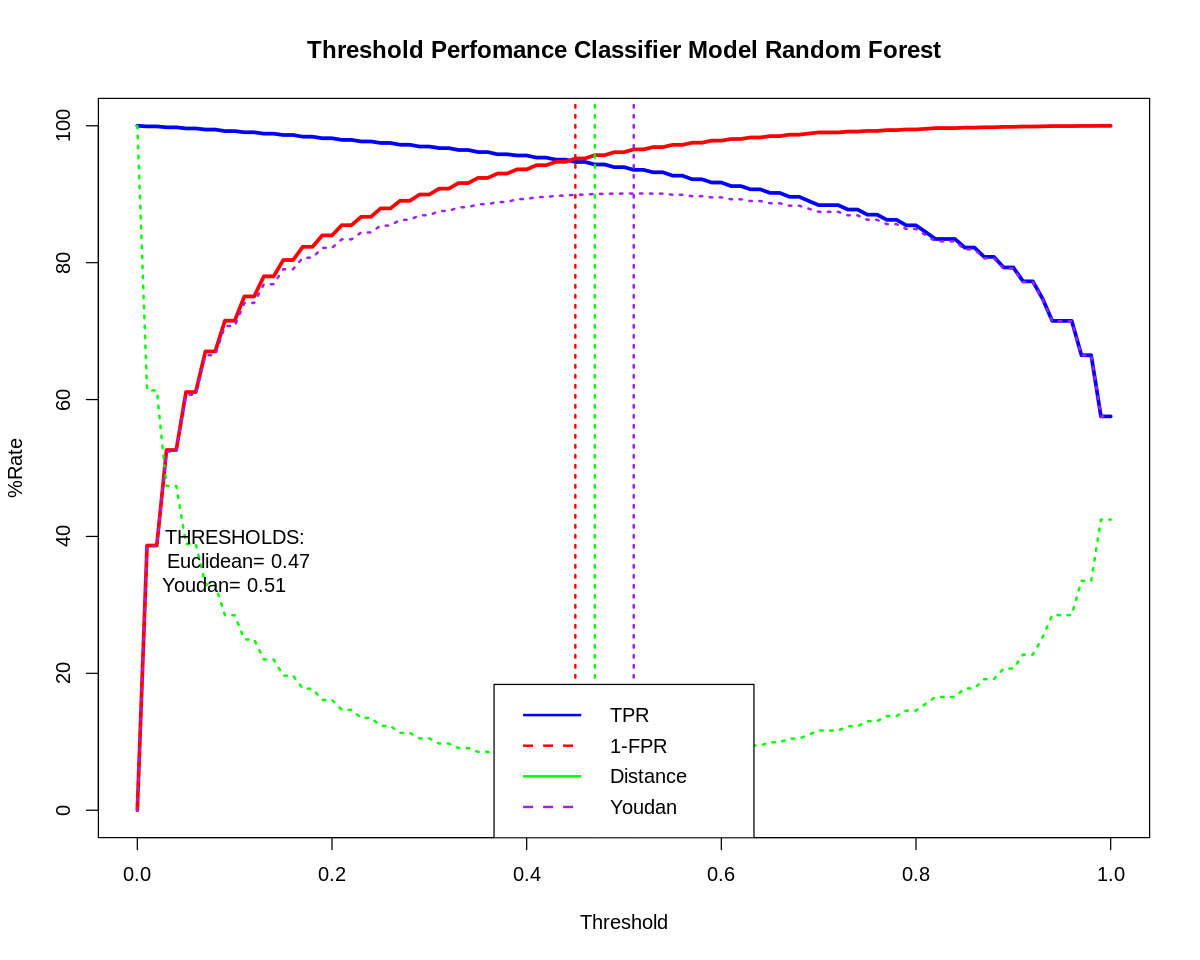

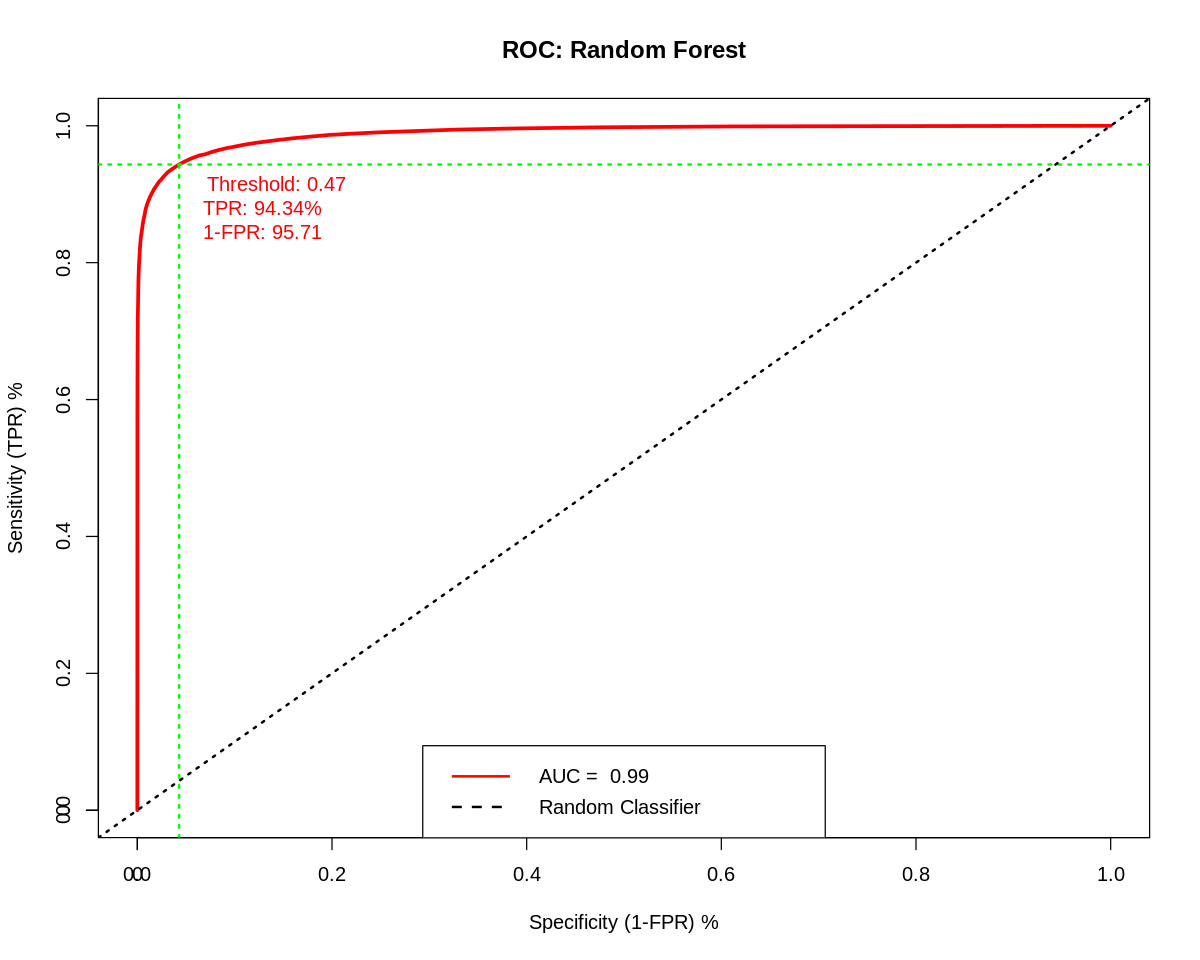

In [91]:
RFmodel<-RandomForestClassifier(training_data,testing_data,plot=TRUE,OUTPUT_FIELD)
result<-RFmodel$result

#### Confusion Matrix

[1] "ACCURACY :  95.0390103685453 , PRECISION:  95.4776799915173 , RECALL:  94.3422913719943 , AUC :  0.9892376003698 F1 score: 94.9065900766778 Loss : 0.13923753405334 Threshold : 0.47"


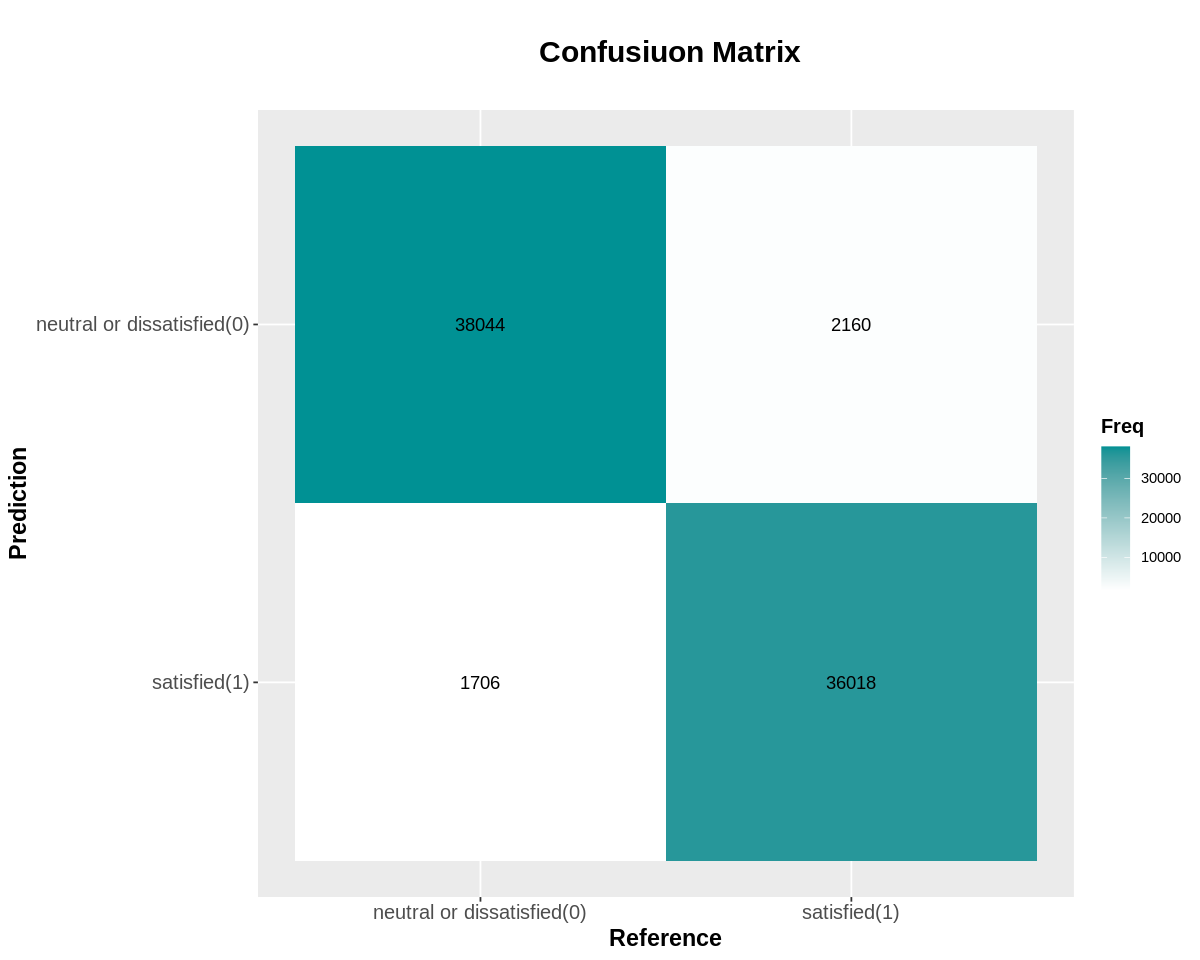

In [92]:
options(repr.plot.width = 10, repr.plot.height =8)
ConfusionMatrix_plot(result$gt,result$pred_labels)

accuracy<-result$acc
precision<-result$pgood
recall<-result$TPR
auc <- result$AUC
f1_score <- F1_score(precision,recall)
loss <- BCE_loss(result$gt,result$proba)
threshold<- result$threshold
print(paste("ACCURACY : ", accuracy,
            ", PRECISION: ", precision,
            ", RECALL: ", recall, 
            ", AUC : ",auc,
            "F1 score:", f1_score,
            "Loss :", loss,
            "Threshold :", threshold))

#### Impotance Variable(fields) on Random Forest Classifer

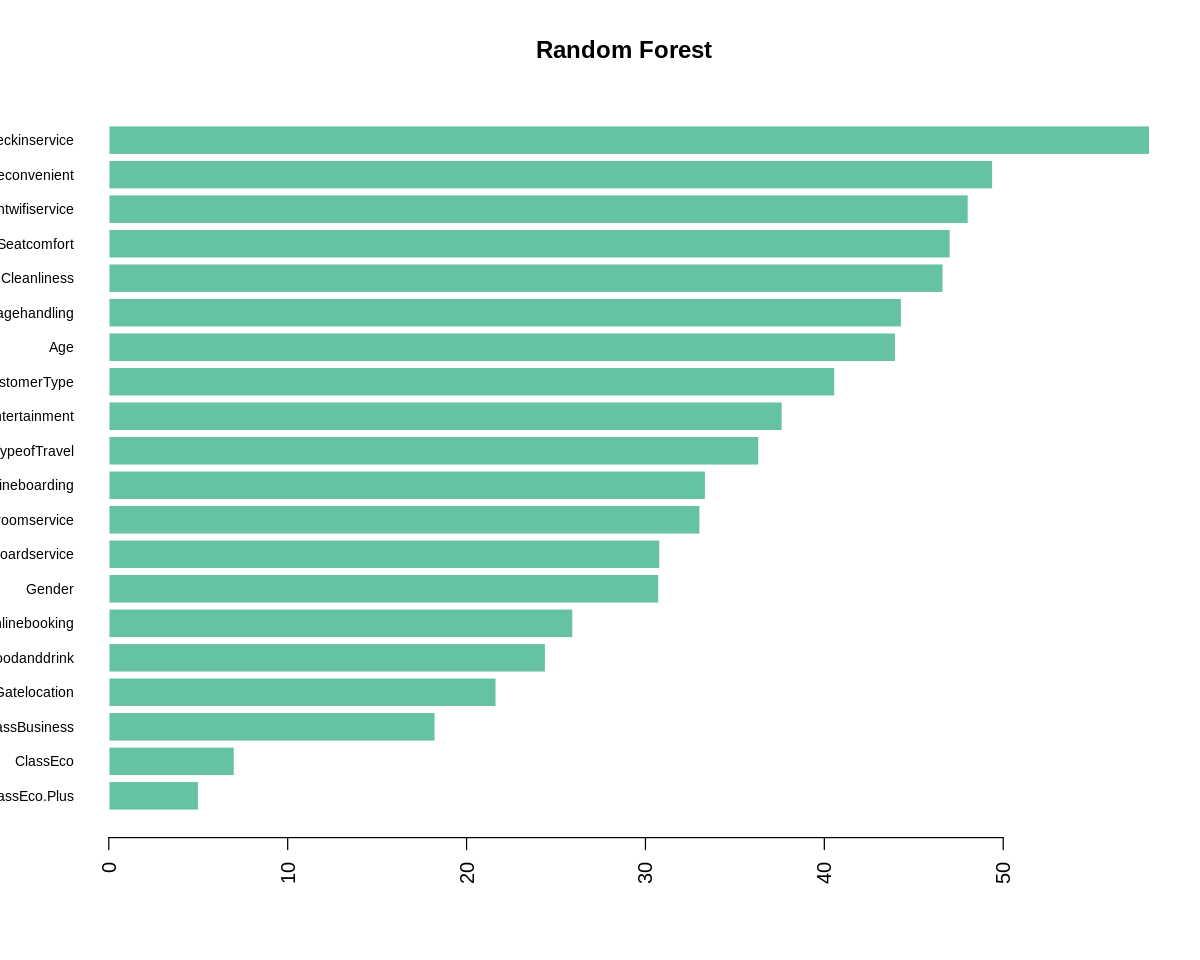

In [93]:
ForestCoeff_plot(RFmodel$model)

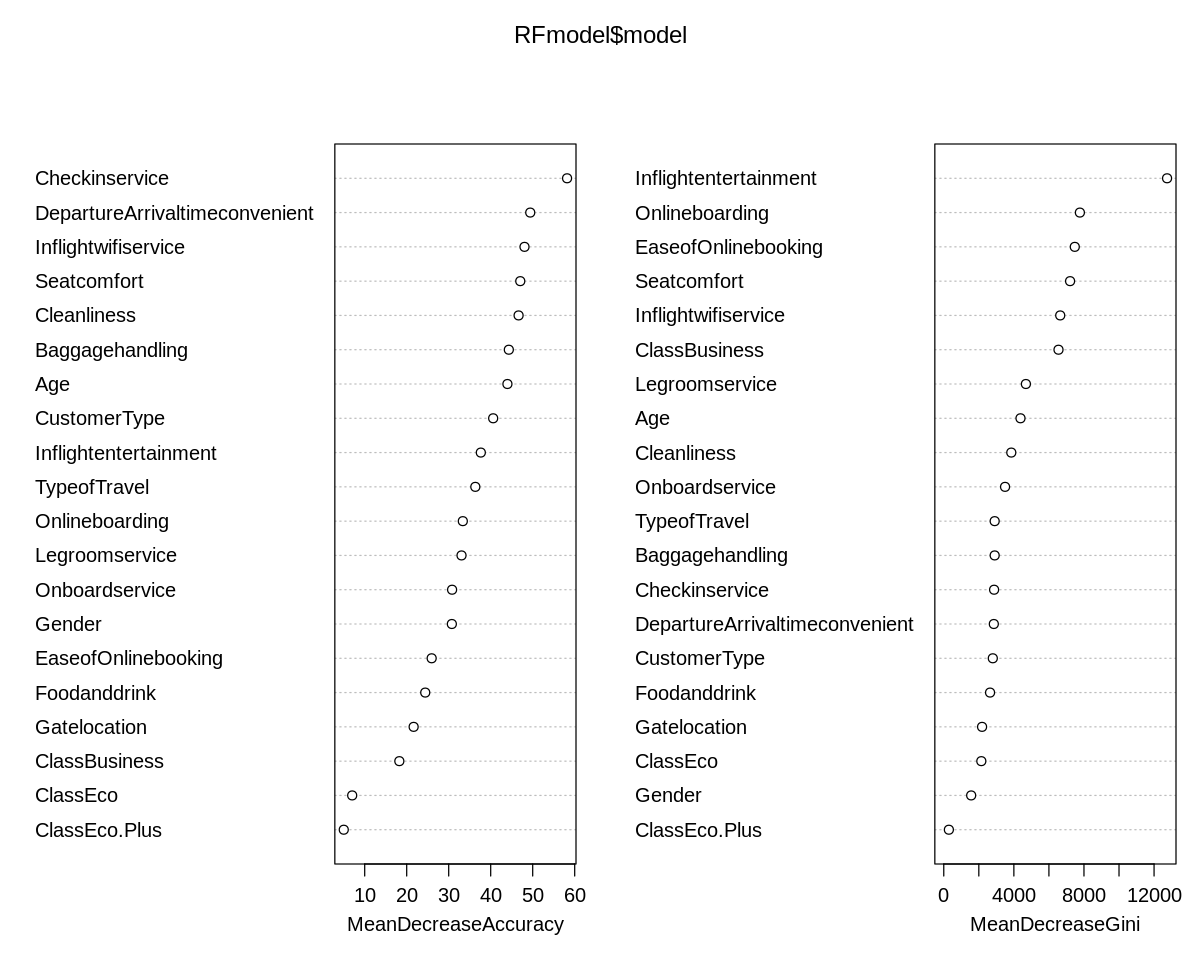

In [94]:
options(repr.plot.width = 10, repr.plot.height = 8)
# Variable importance plot
randomForest::varImpPlot(RFmodel$model)


In [95]:
df <-unlist(result[-which(names(result) %in%c("pred_labels","gt","proba"))])
#allResults<-
allResults<-cbind(allResults,data.frame(RandomForest=unlist(df)))
allResults

,LogisticRegression,Logistic_with_Kfold,DecisionTree,DecisionTree_with_Kfold,DecisionTree_unclean,DecisionTree_Kfold_Unclean,RandomForest
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TP,3.097600e+04,10345.00,3.551200e+04,11942.00,3.774200e+04,12695.00,3.601800e+04
FN,7.255000e+03,2405.00,2.669000e+03,809.00,1.963000e+03,528.00,2.160000e+03
FP,5.731000e+03,1928.00,1.921000e+03,581.00,2.440000e+03,789.00,1.706000e+03
TN,3.396600e+04,11296.00,3.782600e+04,12643.00,3.578300e+04,11962.00,3.804400e+04
F1,8.267101e+01,82.68,9.392970e+01,94.50,9.448846e+01,95.07,9.490659e+01
acc,8.333590e+01,83.31,9.410995e+01,94.65,9.434991e+01,94.93,9.503901e+01
pgood,8.438717e+01,84.30,9.486816e+01,95.36,9.392763e+01,94.15,9.547768e+01
pbad,8.239975e+01,82.45,9.340906e+01,93.98,9.479945e+01,95.77,9.462740e+01
FPR,1.443686e+01,14.58,4.833069e+00,4.39,6.383591e+00,6.19,4.291824e+00


### K-FOLD Cross Validation on Random Forest on clean dataset

In [96]:
KFOLDS          <- 6                 # Number of folded experiments
dataset<-stratifiedDataset(processed_data)
measures<-runExperiment(dataset = dataset,FUN = RandomForestClass

ERROR: Error in parse(text = x, srcfile = src): <text>:4:0: unexpected end of input
2: dataset<-stratifiedDataset(processed_data)
3: measures<-runExperiment(dataset = dataset,FUN = RandomForestClass
  ^


In [ ]:
data.frame(measures$allresults)

In [ ]:
# Create a data frame to compare results from different experiments
allResults<-cbind(allResults,data.frame(RandomForestKfold=unlist(measures$means)))
allResults

### Random Forest on Unclean dataset

In [ ]:
OUTPUT_FIELD = "satisfactionv2"
source('utils.R')
selected_data<-NConvertClass(combined,OUTPUT_FIELD)

# Fill up missing values (Immputation)
missing_field<-c('Inflightservice','Onlinesupport','ArrivalDelayinMinutes')
selected_data[,missing_field]<-(randomForest::na.roughfix(selected_data[,missing_field]))

selected_data<-selected_data[sample(nrow(selected_data)),]
training_records<-round(nrow(selected_data)*(70/100))
training_data <- selected_data[1:training_records,]
testing_data <- selected_data[-(1:training_records),]

print(paste("Number of Training",nrow(training_data)))
print(paste("Number of Testing",nrow(testing_data)))
head(training_data)

In [ ]:
RFmodel_unclean<-RandomForestClassifier(training_data,testing_data,plot=TRUE,OUTPUT_FIELD)
result<-RFmodel_unclean$result

In [ ]:
options(repr.plot.width = 10, repr.plot.height =8)
ConfusionMatrix_plot(result$gt,result$pred_labels)
accuracy<-result$acc
precision<-result$pgood
recall<-result$TPR
auc <- result$AUC
f1_score <- F1_score(precision,recall)
loss <- #BCE_loss(result$gt,result$proba)
threshold<- result$threshold
print(paste("ACCURACY : ", accuracy,
            ", PRECISION: ", precision,
            ", RECALL: ", recall, 
            ", AUC : ",auc,
            "F1 score:", f1_score,
            "Loss :", loss,
            "Threshold :", threshold))

In [ ]:
df <-unlist(result[-which(names(result) %in%c("pred_labels","gt","proba"))])
#allResults<-
allResults<-cbind(allResults,data.frame(RandomForest_unclean=unlist(df)))
allResults

### K-FOLD Cross validation with unclen dataset on Randomforest

In [ ]:
KFOLDS          <- 6                 # Number of folded experiments
dataset<-stratifiedDataset(processed_data)
measures<-runExperiment(dataset = dataset,FUN = RandomForestClassifier)

In [ ]:

data.frame(measures$allresults)

data.frame(measures$means)




In [ ]:

allResults<-cbind(allResults,data.frame(RandomForest_Kfold_unclean=unlist(measures$means)))
allResults

In [ ]:

t(allResults)

### K-nearest Neighbour

In [ ]:
# Select field for Decsion Tree
OUTPUT_FIELD = "satisfactionv2"

select_field<-c('satisfactionv2',
               'Gender',
                'CustomerType',
                'TypeofTravel',
                'ClassBusiness',
                'ClassEco',
                'ClassEco.Plus',
#                 'DepartureDelayinMinutes0',
#                 'DepartureDelayinMinutes1',
#                 'DepartureDelayinMinutes2',
#                 'DepartureDelayinMinutes3',
#                 'ArrivalDelayinMinutes0',
#                 'ArrivalDelayinMinutes1',
#                 'ArrivalDelayinMinutes2',
#                 'ArrivalDelayinMinutes3',
                'Age',
                'Seatcomfort',
                'DepartureArrivaltimeconvenient',
                'Foodanddrink',
                'Gatelocation',
                'Inflightwifiservice',
                'Inflightentertainment',
               'EaseofOnlinebooking',
                 'Onboardservice',
                 'Legroomservice',
                 'Baggagehandling',
                 'Checkinservice',
                 'Cleanliness',
               'Onlineboarding'
               )

print("Select Fields")
print((select_field))


selected_data<-processed_data[,select_field]

selected_data<-selected_data[sample(nrow(selected_data)),]
training_records<-round(nrow(selected_data)*(70/100))
training_data <- selected_data[1:training_records,]
testing_data <- selected_data[-(1:training_records),]

print(paste("Number of Training",nrow(training_data)))
print(paste("Number of Testing",nrow(testing_data)))
head(training_data)

In [ ]:
library(KODAMA)

KNN_model<-function(training_data,testing_data,plot=TRUE, output_field="satisfactionv2"){
    
    
    x_train <- subset(training_data, select= output_field)
    y_train <- training_data[,output_field]
    
    x_test <- subset(testing_data, select= output_field)
    y_train <- testing_data[,output_field]
    
    Knn_model<- knn.kodama(x_train, y_train, x_test, k=3)
    
    ConfusionMatrix_plot(y_train,Knn_model$Ypred[,1])
    
    
    
    
    return()
}




In [ ]:
KNN_model(training_data,testing_data)

## Visualize a performance of each model

The performance metrics use in evaluating between multiple model are

- Accuracy
- Area Under the Curve 
- F1 Score

In [ ]:
# select only the required metrics
rplot<-allResults[c("acc","F1","AUC"),]
# normalize accuracy and f1 by 100 (so that they is in same scale as AUC for easier visualization)
rplot[c("acc","F1"),]<-rplot[c("acc","F1"),]/100
rplot

In [ ]:
# stack a dataframe and combine with the fields of metrics name for each rows
rplot<-cbind(stack(rplot),data.frame(metrics=row.names(rplot)))
head(rplot)

In [ ]:
options(repr.plot.width = 20, repr.plot.height =5)
# Grouped
ggplot(rplot, aes(fill=metrics, y=values, x=ind)) + 
geom_bar(position="dodge", stat="identity",colour="black")+
scale_fill_discrete(labels=c("Accuracy","AUC","F1 Score"))+
labs(x= "Models", title="Results of each model on Airline Passenger Dataset")  +
theme(plot.title = element_text(face="bold",hjust=0.5, size =16),
      axis.title.x = element_text(face="bold", color="black", size=12),
      axis.title.y = element_text(face="bold", color="black", size=12),
      legend.title = element_text(face="bold", color="black", size=12),
      legend.text = element_text(size = 10),
      legend.key.size= unit(1.0,"cm"),
      legend.key.width = unit(1,"cm"),
      legend.box.spacing = unit(0.4,"cm")
      )

### Support Vector Machine

In [ ]:
# library(e1071)


# SVM_model<-function(training_data,testing_data){
   
#     svm_training = training_data
#     y_svm_test = testing_data[,1]
#     x_svm_test = testing_data[,-1]



 
#     svm_classifier = svm(formula = satisfactionv2 ~ .,
#                      data = svm_training,
#                      type = 'C-classification',
#                      kernel = 'radial')
#     y_pred <- predict(svm_classifier, newdata= x_svm_test, type='response')

# print(table(y_svm_test,y_pred))

    
#  return(list("model"=svm_classifier)) 
# }


# a<-SVM_model(training_data,testing_data)

In [ ]:
for(i in names(svm_training[-1])){
    for(j in names(svm_training[-1])){
        if(i==j){
            
        }else{
        print(as.formula(paste(paste(j,'~'),i)))
        plot(classifier,svm_training,as.formula(paste(paste(j,'~'),i)))
        }
    }
    
}
# plot(classifier, dummy, Gender~Age) #Ok
# plot(classifier, dummy, CustomerType~DepartureArrivaltimeconvenient) #Ok

### Kmeans Clustering

### Naive Bayes Classifier

In [ ]:
#

In [ ]:
library(naivebayes)
NaiveBayes_Classifier<-function(training_data,testing_data,output_field="satisfactionv2",plot=TRUE){
    formular<-myModelFormula(training_data,output_field)
    print(formular)

    nb_cl<- naive_bayes(formular, data = ,usekernel = T)
    y_proba <- predict(nb_cl, newdata = testing_data, type="response")
    print(y_proba)
    
       

#     title<-'Naive Bayes Classifier'
#     results<-NdetermineThreshold(test_expected=y_test,
#                                     test_predicted=y_proba,
#                                     plot=plot,
#                                     title=title)

#     reuturn(list("model"= nb_cl,
#                  "result"=results))
}



In [ ]:
# NaiveBayes_Classifier(training_data,testing_data)


In [ ]:
# Confusion Matrix
cm <- table(y_test, y_pred)
cm
 
# Model Evaluation
confusionMatrix(cm)

In [ ]:
length(y_pred)

In [6]:
length(y_test)

ERROR: Error in eval(expr, envir, enclos): object 'y_test' not found


In [ ]:
model

In [ ]:
randomForest::rfImpute()

In [ ]:
# NOT RUN {
data(iris)
iris.na <- iris
set.seed(111)
## artificially drop some data values.
for (i in 1:4) iris.na[sample(150, sample(20, 1)), i] <- NA
iris.roughfix <- randomForest::na.roughfix(iris.na)
iris.na
iris.roughfix
iris.narf <- randomForest::randomForest(Species ~ ., iris.na, na.action=randomForest::na.roughfix)
print(iris.narf)
# }